<a href="https://colab.research.google.com/github/Priyadevpura/Python/blob/main/Quantitative_analysis_and_player_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing dataset

import pandas as pd

file_path = 'player_stats.csv'


try:
    player_stats = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:

    player_stats = pd.read_csv(file_path, encoding='latin1')

print(player_stats)




                        player   country  height  weight  age  \
0     Cristian Castro Devenish  Colombia     192      84   22   
1             Silaldo Taffarel    Brazil     181      80   31   
2                Thomas DÃ¤hne   Germany     193      84   29   
3            Michael Sollbauer   Austria     187      86   33   
4                Diego Segovia   Uruguay     191      80   23   
...                        ...       ...     ...     ...  ...   
5677             Mohamed Salah     Egypt     175      71   31   
5678                Sadio Mané   Senegal     174      69   31   
5679                 Neymar Jr    Brazil     175      68   31   
5680         Cristiano Ronaldo  Portugal     187      83   38   
5681        Zlatan Ibrahimovi?    Sweden     195     102   41   

                   club  ball_control  dribbling marking  slide_tackle  ...  \
0        Atl. Nacional             55         43     NaN            68  ...   
1          Corinthians             69         70     NaN     

In [ ]:
print(player_stats.head())

                     player   country  height  weight  age            club  \
0  Cristian Castro Devenish  Colombia     192      84   22  Atl. Nacional    
1          Silaldo Taffarel    Brazil     181      80   31    Corinthians    
2             Thomas DÃ¤hne   Germany     193      84   29  Holstein Kiel    
3         Michael Sollbauer   Austria     187      86   33  SK Rapid Wien    
4             Diego Segovia   Uruguay     191      80   23  Independiente    

   ball_control  dribbling marking  slide_tackle  ...  curve  fk_acc  \
0            55         43     NaN            68  ...     32      34   
1            69         70     NaN            56  ...     65      62   
2            25         12     NaN            13  ...     20      15   
3            46         48     NaN            66  ...     25      13   
4            14          8     NaN            14  ...      9      10   

   penalties  volleys  gk_positioning  gk_diving  gk_handling  gk_kicking  \
0         41       33

In [ ]:
missing_values = player_stats.isna()

# displaying the missing value in each column
print("Missing values in each column:")
print(missing_values.sum())

Missing values in each column:
player              0
country             0
height              0
weight              0
age                 0
club                0
ball_control        0
dribbling           0
marking           158
slide_tackle        0
stand_tackle        0
aggression          0
reactions           0
att_position        0
interceptions       0
vision              0
composure           0
crossing            0
short_pass          0
long_pass           0
acceleration        0
stamina             0
strength            0
balance             0
sprint_speed        0
agility             0
jumping             0
heading             0
shot_power          0
finishing           0
long_shots          0
curve               0
fk_acc              0
penalties           0
volleys             0
gk_positioning      0
gk_diving           0
gk_handling         0
gk_kicking          0
gk_reflexes         0
value               0
dtype: int64


In [ ]:
column_name = 'marking'

if column_name in player_stats.columns and player_stats[column_name].dtype == 'object' and player_stats[column_name].isna().any():

    player_stats[column_name] = player_stats[column_name].fillna('None')

print(player_stats)

                        player   country  height  weight  age  \
0     Cristian Castro Devenish  Colombia     192      84   22   
1             Silaldo Taffarel    Brazil     181      80   31   
2                Thomas DÃ¤hne   Germany     193      84   29   
3            Michael Sollbauer   Austria     187      86   33   
4                Diego Segovia   Uruguay     191      80   23   
...                        ...       ...     ...     ...  ...   
5677             Mohamed Salah     Egypt     175      71   31   
5678                Sadio Mané   Senegal     174      69   31   
5679                 Neymar Jr    Brazil     175      68   31   
5680         Cristiano Ronaldo  Portugal     187      83   38   
5681        Zlatan Ibrahimovi?    Sweden     195     102   41   

                   club  ball_control  dribbling marking  slide_tackle  ...  \
0        Atl. Nacional             55         43    None            68  ...   
1          Corinthians             69         70    None     

In [ ]:
# Removing number of duplicate values
print("Number of rows before removing duplicates:", len(player_stats))

player_stats_no_duplicates = player_stats.drop_duplicates(subset=['player'])

print("Number of rows after removing duplicates:", len(player_stats_no_duplicates))

print(player_stats_no_duplicates)

Number of rows before removing duplicates: 5682
Number of rows after removing duplicates: 5657
                        player   country  height  weight  age  \
0     Cristian Castro Devenish  Colombia     192      84   22   
1             Silaldo Taffarel    Brazil     181      80   31   
2                Thomas DÃ¤hne   Germany     193      84   29   
3            Michael Sollbauer   Austria     187      86   33   
4                Diego Segovia   Uruguay     191      80   23   
...                        ...       ...     ...     ...  ...   
5677             Mohamed Salah     Egypt     175      71   31   
5678                Sadio Mané   Senegal     174      69   31   
5679                 Neymar Jr    Brazil     175      68   31   
5680         Cristiano Ronaldo  Portugal     187      83   38   
5681        Zlatan Ibrahimovi?    Sweden     195     102   41   

                   club  ball_control  dribbling marking  slide_tackle  ...  \
0        Atl. Nacional             55        

In [ ]:
print(player_stats.dtypes)

player            object
country           object
height             int64
weight             int64
age                int64
club              object
ball_control       int64
dribbling          int64
marking           object
slide_tackle       int64
stand_tackle       int64
aggression         int64
reactions          int64
att_position       int64
interceptions      int64
vision             int64
composure          int64
crossing           int64
short_pass         int64
long_pass          int64
acceleration       int64
stamina            int64
strength           int64
balance            int64
sprint_speed       int64
agility            int64
jumping            int64
heading            int64
shot_power         int64
finishing          int64
long_shots         int64
curve              int64
fk_acc             int64
penalties          int64
volleys            int64
gk_positioning     int64
gk_diving          int64
gk_handling        int64
gk_kicking         int64
gk_reflexes        int64


In [ ]:
print("Number of missing values in 'marking' column:", player_stats['marking'].isna().sum())

player_stats['marking'] = pd.to_numeric(player_stats['marking'], errors='coerce')

print("Number of missing values in 'marking' column after conversion:", player_stats['marking'].isna().sum())

print(player_stats.dtypes)

Number of missing values in 'marking' column: 0
Number of missing values in 'marking' column after conversion: 5682
player             object
country            object
height              int64
weight              int64
age                 int64
club               object
ball_control        int64
dribbling           int64
marking           float64
slide_tackle        int64
stand_tackle        int64
aggression          int64
reactions           int64
att_position        int64
interceptions       int64
vision              int64
composure           int64
crossing            int64
short_pass          int64
long_pass           int64
acceleration        int64
stamina             int64
strength            int64
balance             int64
sprint_speed        int64
agility             int64
jumping             int64
heading             int64
shot_power          int64
finishing           int64
long_shots          int64
curve               int64
fk_acc              int64
penalties           int64


In [ ]:
player_stats['marking'] = player_stats['marking'].fillna("NONE")


In [ ]:
player_stats = player_stats.dropna(subset=['marking'])


In [ ]:
print(player_stats.dtypes)

player            object
country           object
height             int64
weight             int64
age                int64
club              object
ball_control       int64
dribbling          int64
marking           object
slide_tackle       int64
stand_tackle       int64
aggression         int64
reactions          int64
att_position       int64
interceptions      int64
vision             int64
composure          int64
crossing           int64
short_pass         int64
long_pass          int64
acceleration       int64
stamina            int64
strength           int64
balance            int64
sprint_speed       int64
agility            int64
jumping            int64
heading            int64
shot_power         int64
finishing          int64
long_shots         int64
curve              int64
fk_acc             int64
penalties          int64
volleys            int64
gk_positioning     int64
gk_diving          int64
gk_handling        int64
gk_kicking         int64
gk_reflexes        int64


In [ ]:
print(player_stats['marking'].unique())


['NONE']


In [ ]:
player_stats['marking'] = player_stats['marking'].replace('NONE', pd.NA)

player_stats['marking'] = pd.to_numeric(player_stats['marking'], errors='coerce')


In [ ]:
print(player_stats.dtypes)


player             object
country            object
height              int64
weight              int64
age                 int64
club               object
ball_control        int64
dribbling           int64
marking           float64
slide_tackle        int64
stand_tackle        int64
aggression          int64
reactions           int64
att_position        int64
interceptions       int64
vision              int64
composure           int64
crossing            int64
short_pass          int64
long_pass           int64
acceleration        int64
stamina             int64
strength            int64
balance             int64
sprint_speed        int64
agility             int64
jumping             int64
heading             int64
shot_power          int64
finishing           int64
long_shots          int64
curve               int64
fk_acc              int64
penalties           int64
volleys             int64
gk_positioning      int64
gk_diving           int64
gk_handling         int64
gk_kicking  

In [ ]:
# basic statistics of all the columns
statistics = player_stats.describe()

print("Basic Statistics:")
print(statistics)


Basic Statistics:
            height       weight          age  ball_control    dribbling  \
count  5682.000000  5682.000000  5682.000000   5682.000000  5682.000000   
mean    181.670539    75.282295    26.316262     58.912179    56.128476   
std       6.829238     6.998971     4.729967     16.567068    18.772075   
min     156.000000    54.000000    17.000000      8.000000     5.000000   
25%     177.000000    70.000000    23.000000     55.000000    51.000000   
50%     182.000000    75.000000    26.000000     63.000000    62.000000   
75%     186.000000    80.000000    30.000000     69.000000    68.000000   
max     204.000000   102.000000    41.000000     94.000000    95.000000   

       marking  slide_tackle  stand_tackle   aggression    reactions  ...  \
count      0.0   5682.000000   5682.000000  5682.000000  5682.000000  ...   
mean       NaN     46.728441     48.820838    56.324006    61.959345  ...   
std        NaN     20.519430     20.975966    16.846410     8.893309  ...  

In [ ]:
#Calculating basic statistics 'height', 'weight', 'age'
selected_columns = ['height', 'weight', 'age']

statistics_selected = player_stats[selected_columns].describe()

medians = player_stats[selected_columns].median()

std_devs = player_stats[selected_columns].std()

print("Basic Statistics for 'height', 'weight', and 'age':")
print(statistics_selected)

print("\nMedians:")
print(medians)

print("\nStandard Deviations:")
print(std_devs)

Basic Statistics for 'height', 'weight', and 'age':
            height       weight          age
count  5682.000000  5682.000000  5682.000000
mean    181.670539    75.282295    26.316262
std       6.829238     6.998971     4.729967
min     156.000000    54.000000    17.000000
25%     177.000000    70.000000    23.000000
50%     182.000000    75.000000    26.000000
75%     186.000000    80.000000    30.000000
max     204.000000   102.000000    41.000000

Medians:
height    182.0
weight     75.0
age        26.0
dtype: float64

Standard Deviations:
height    6.829238
weight    6.998971
age       4.729967
dtype: float64


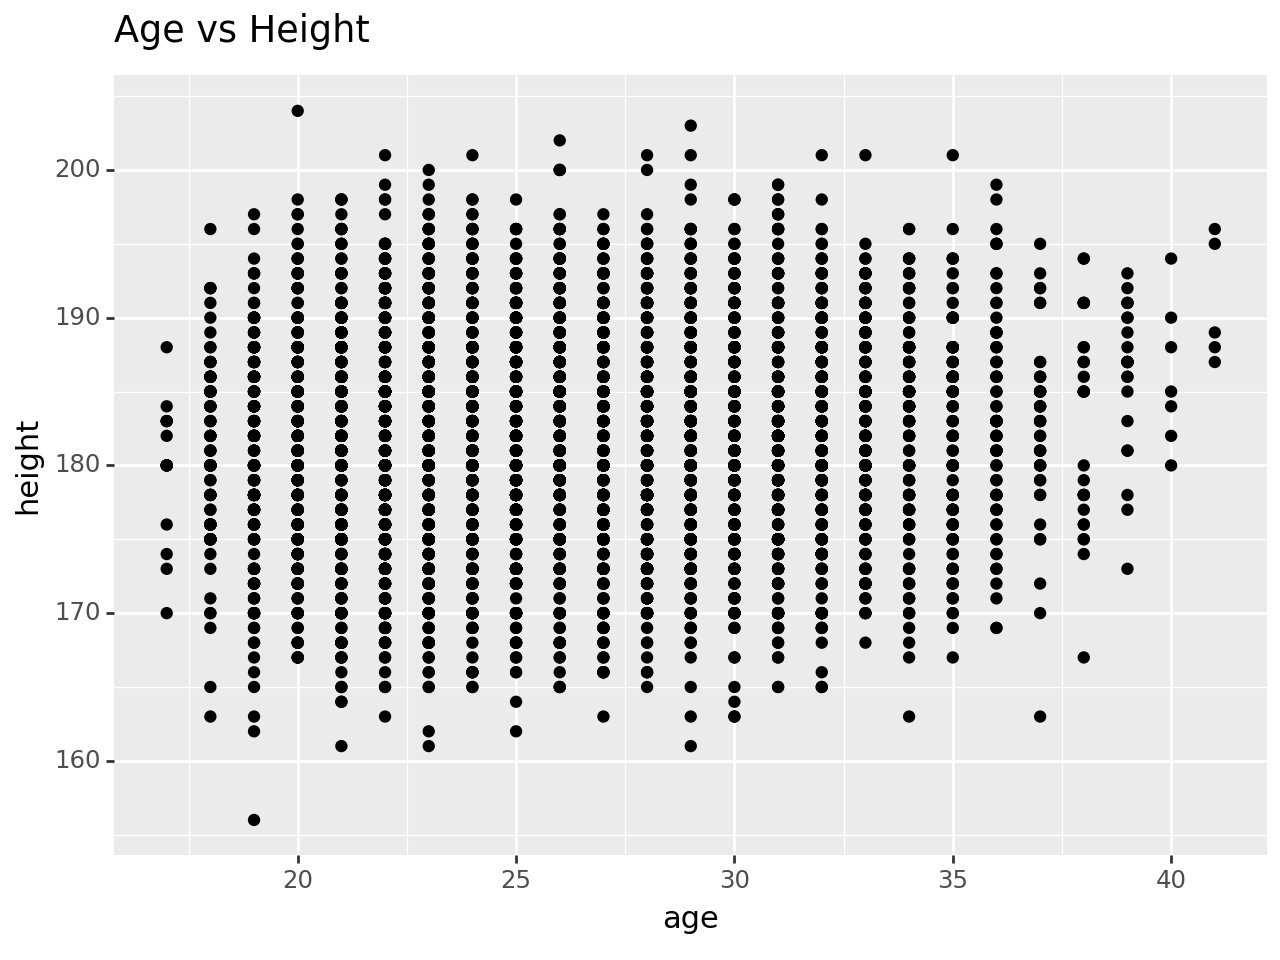

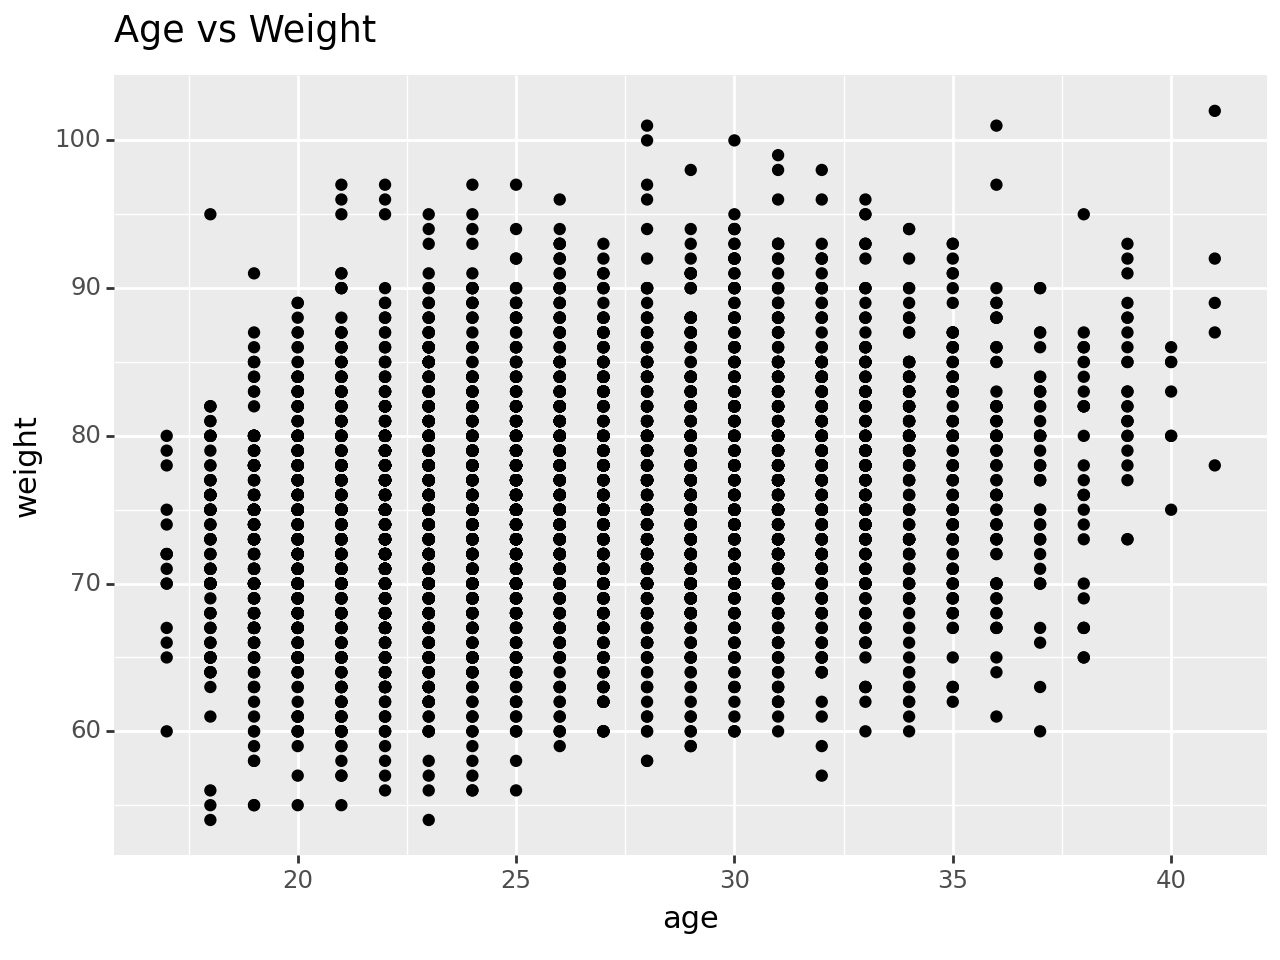

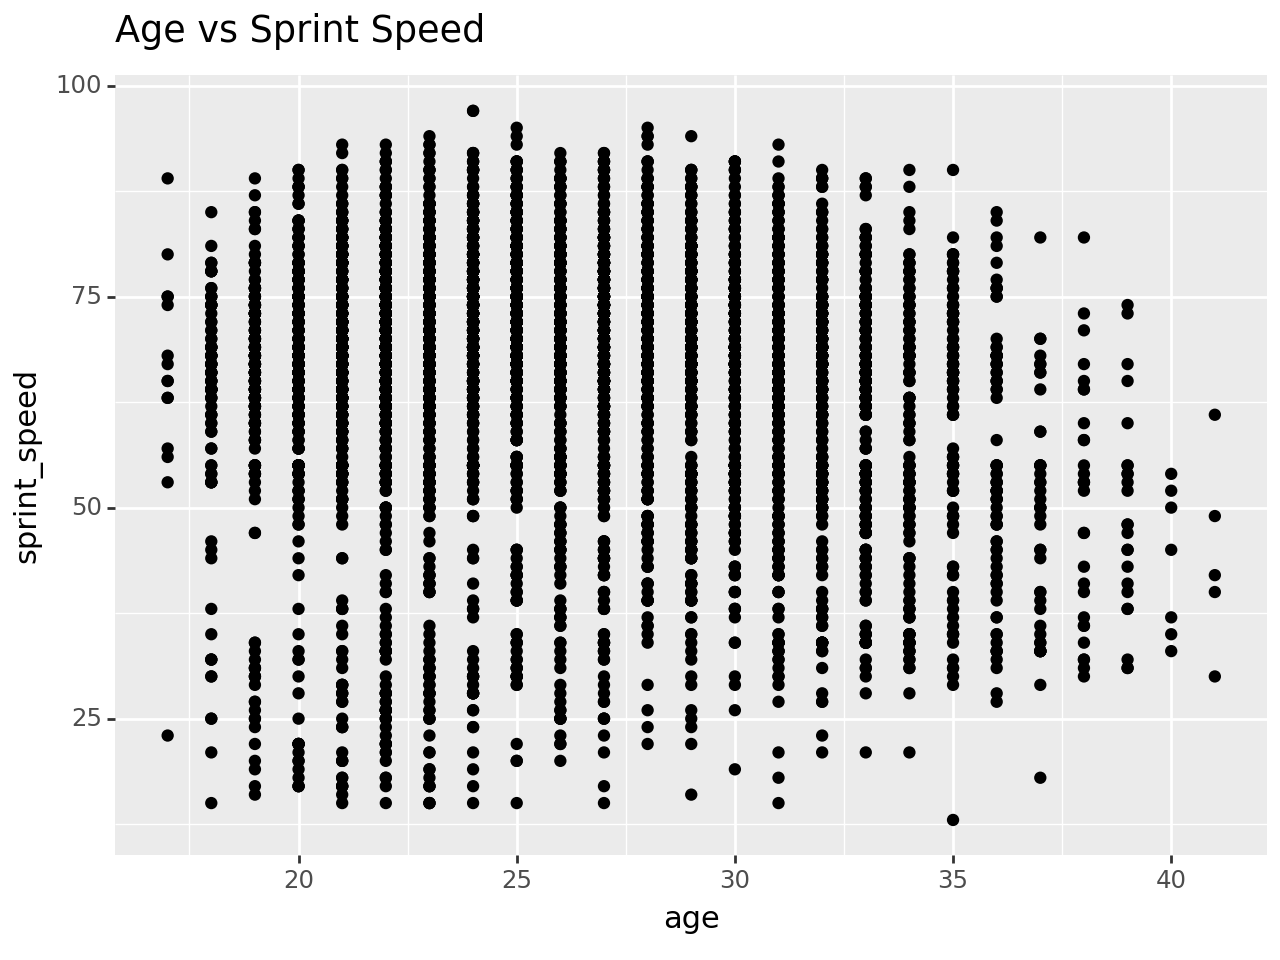

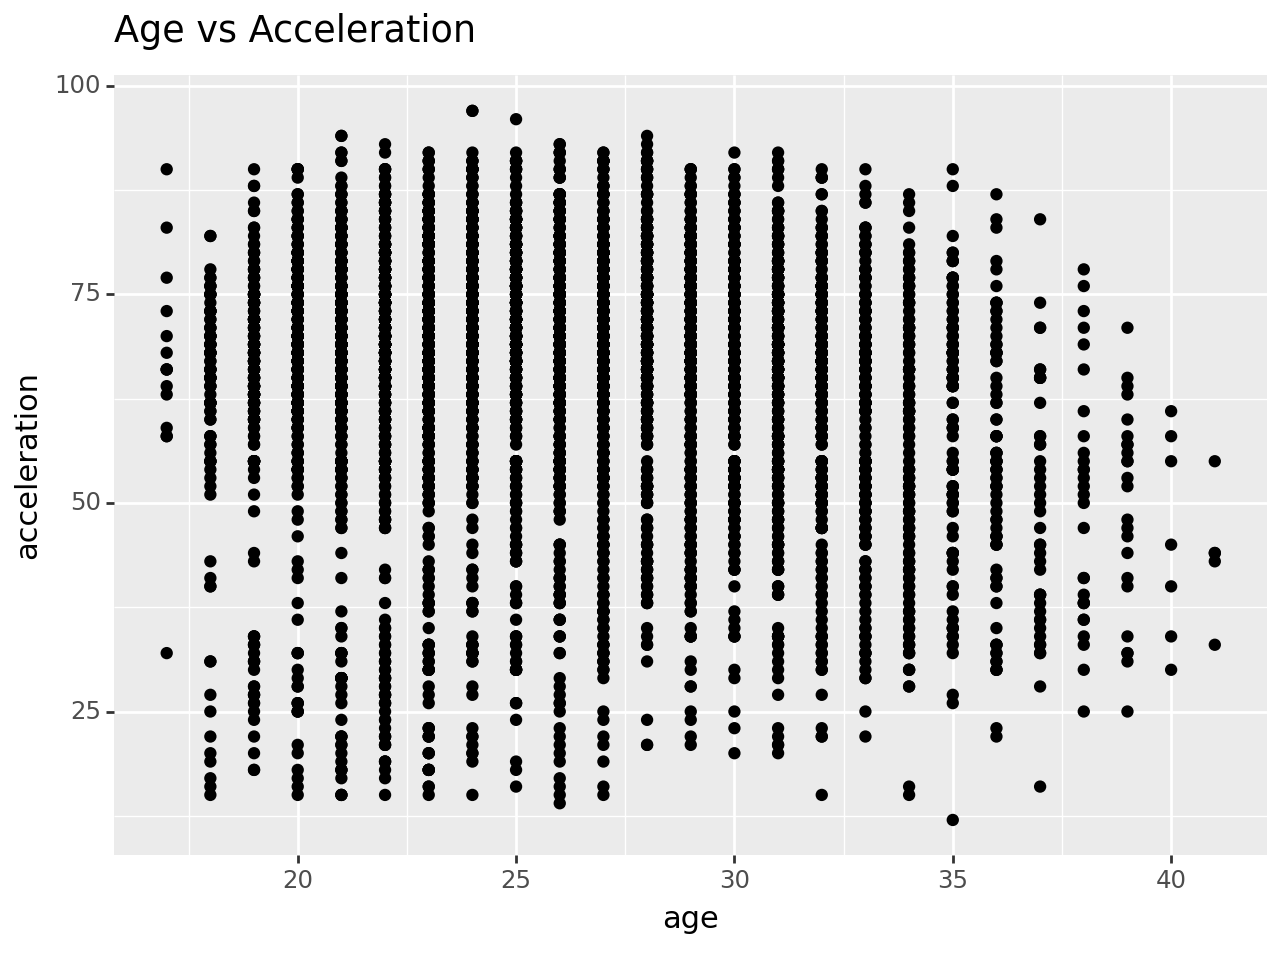

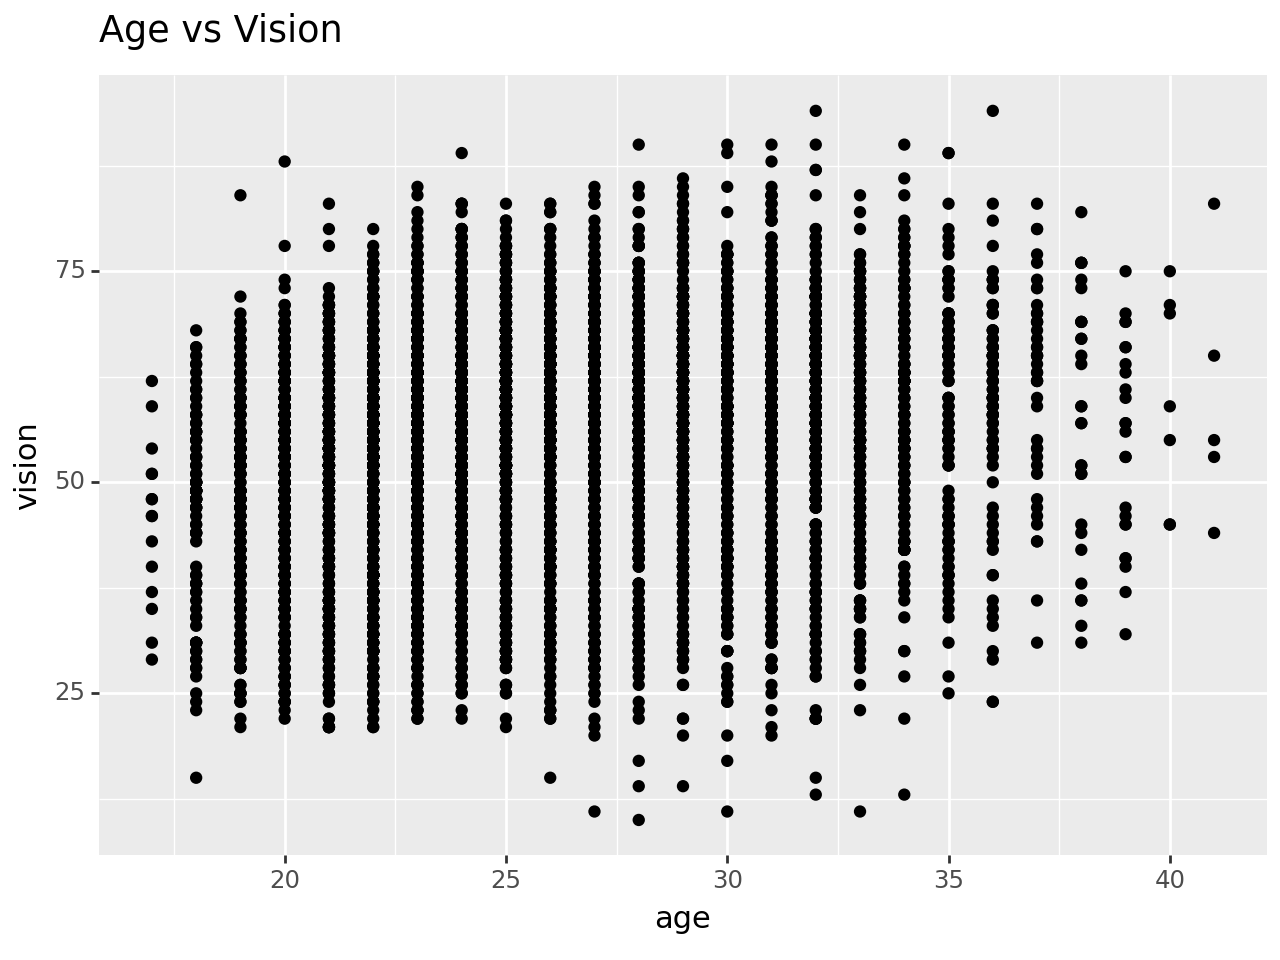

In [ ]:
from plotnine import (
    ggplot,
    aes,
    geom_histogram,
    geom_rug,
    geom_bar,
    coord_flip,
    after_stat,
    geom_boxplot,
    geom_violin,
    geom_point,
    geom_line,
    geom_tile,
    facet_wrap,
    theme,
    element_text,labs
)
plot_height = (ggplot(player_stats, aes(x='age', y='height')) +
               geom_point() +
               labs(title="Age vs Height"))


plot_weight = (ggplot(player_stats, aes(x='age', y='weight')) +
               geom_point() +
               labs(title="Age vs Weight"))


plot_sprint_speed = (ggplot(player_stats, aes(x='age', y='sprint_speed')) +
                     geom_point() +
                     labs(title="Age vs Sprint Speed"))

plot_acceleration = (ggplot(player_stats, aes(x='age', y='acceleration')) +
                      geom_point() +
                      labs(title="Age vs Acceleration"))


plot_vision = (ggplot(player_stats, aes(x='age', y='vision')) +
               geom_point() +
               labs(title="Age vs Vision"))


print(plot_height)
print(plot_weight)
print(plot_sprint_speed)
print(plot_acceleration)
print(plot_vision)



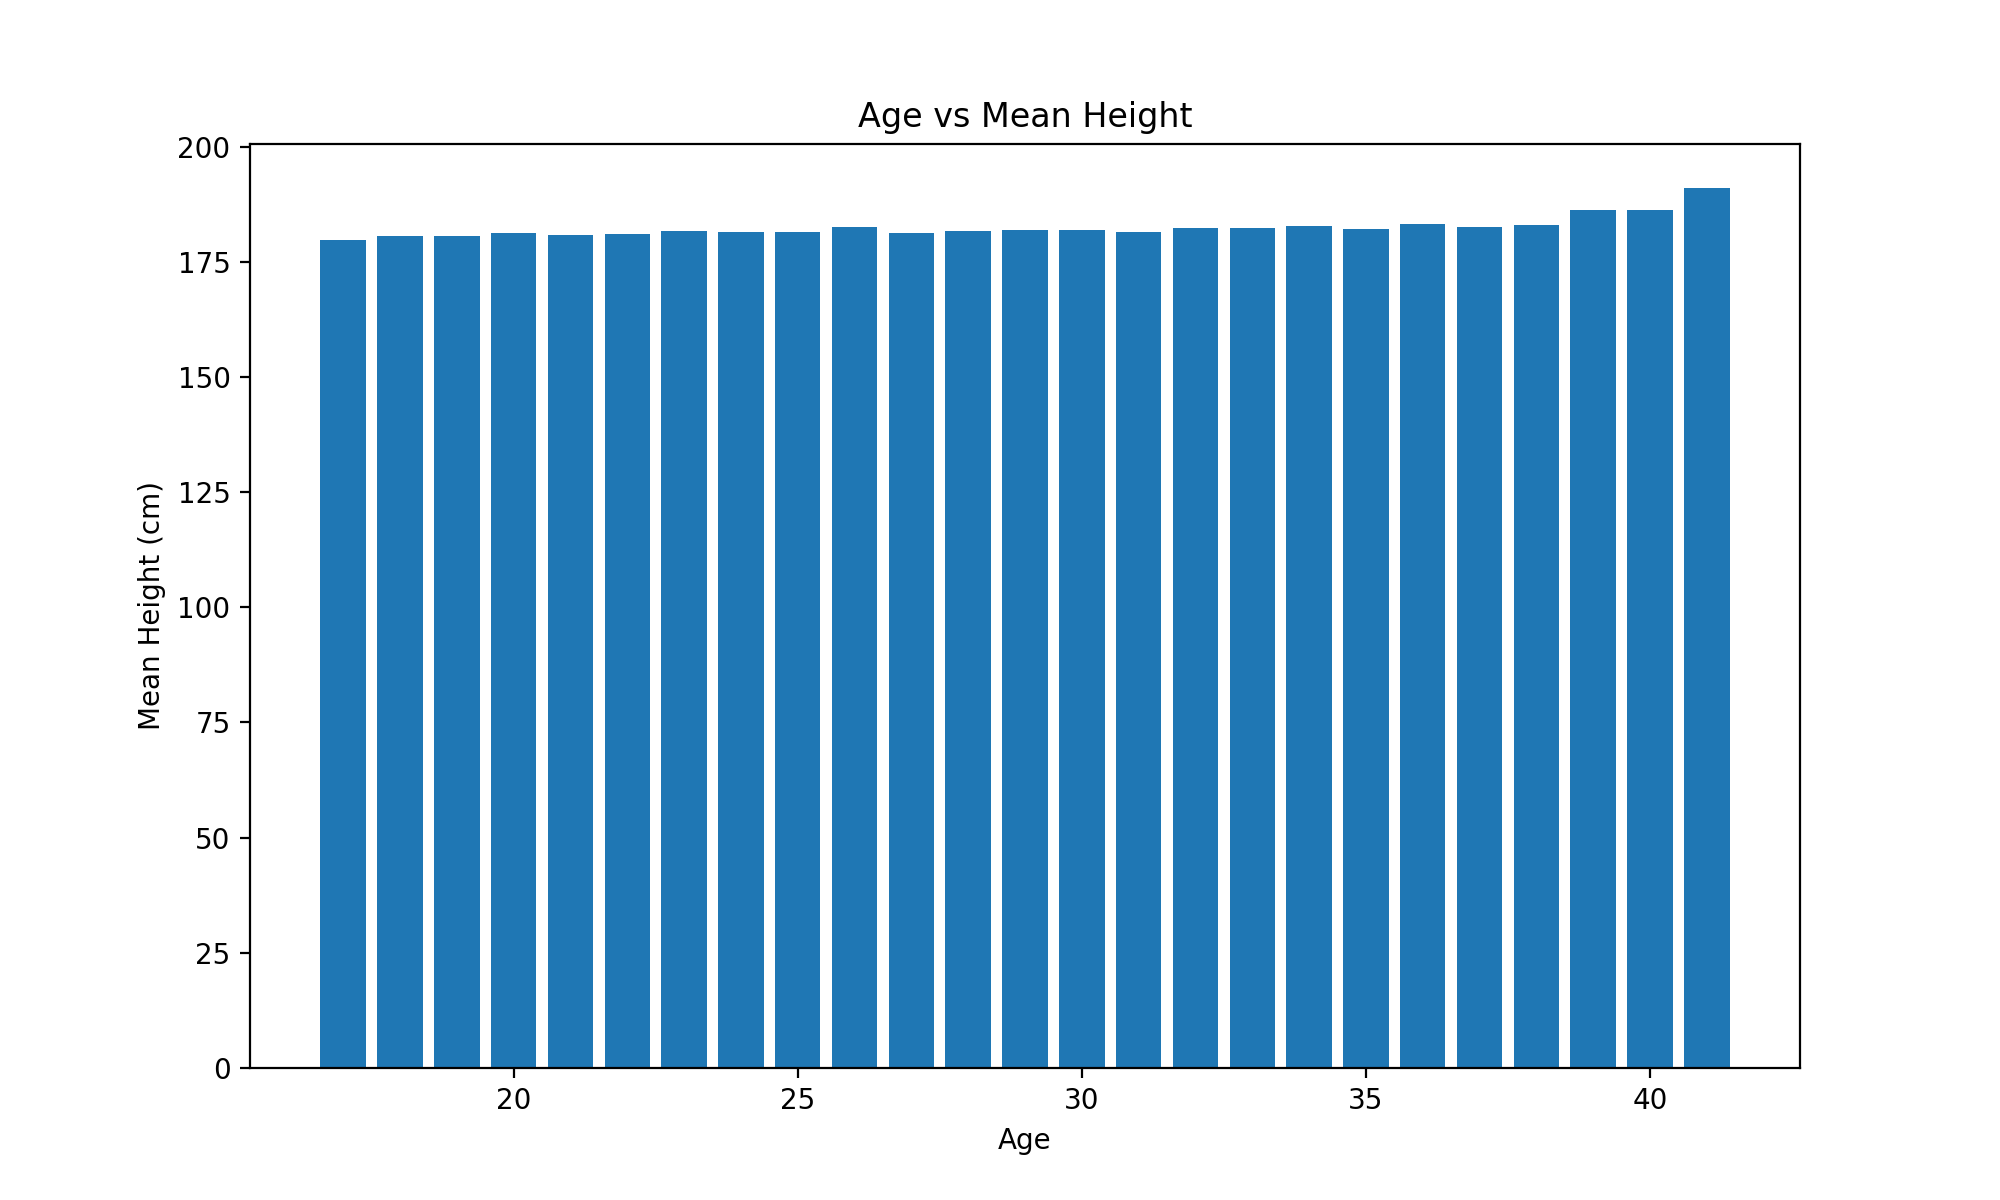

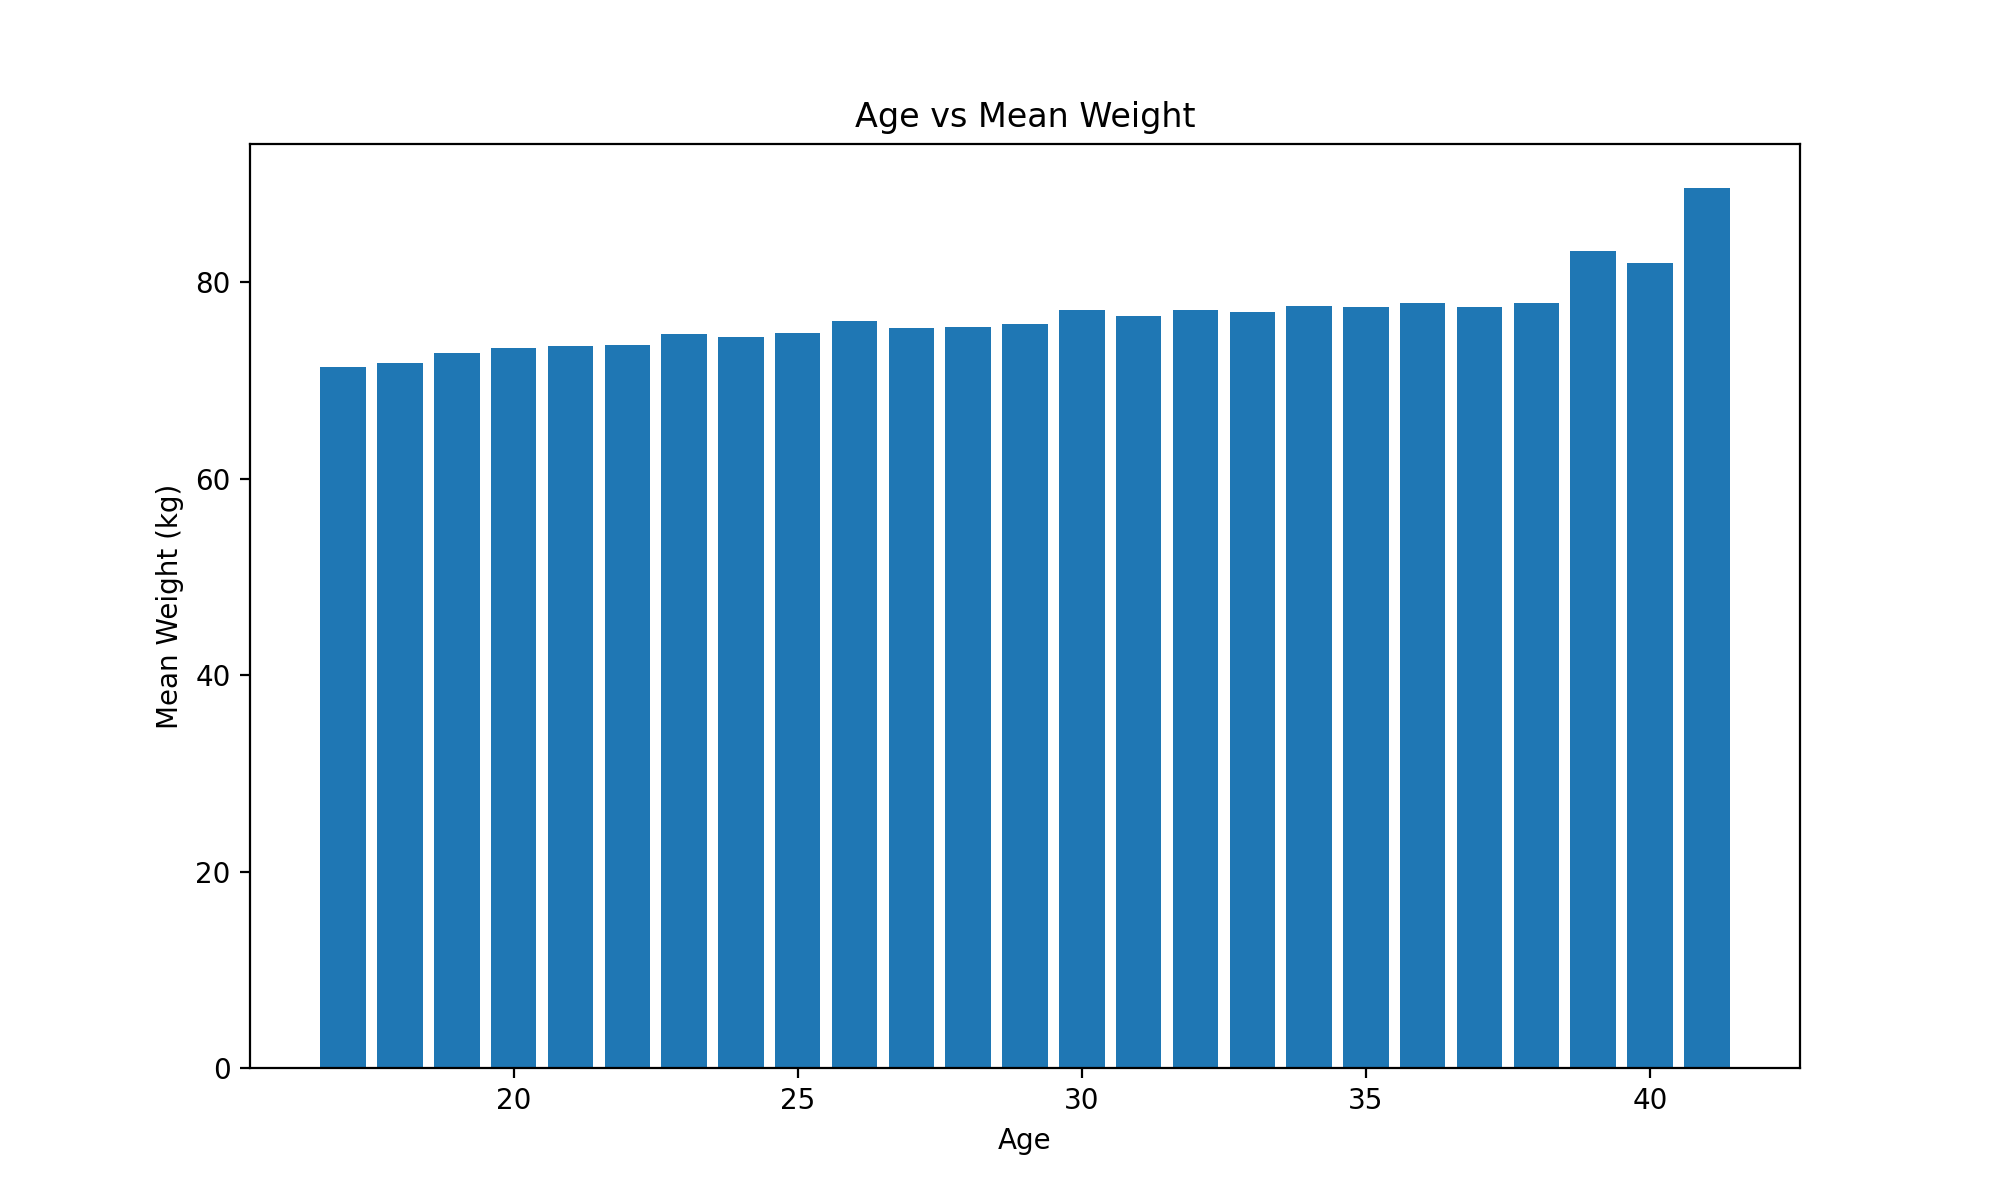

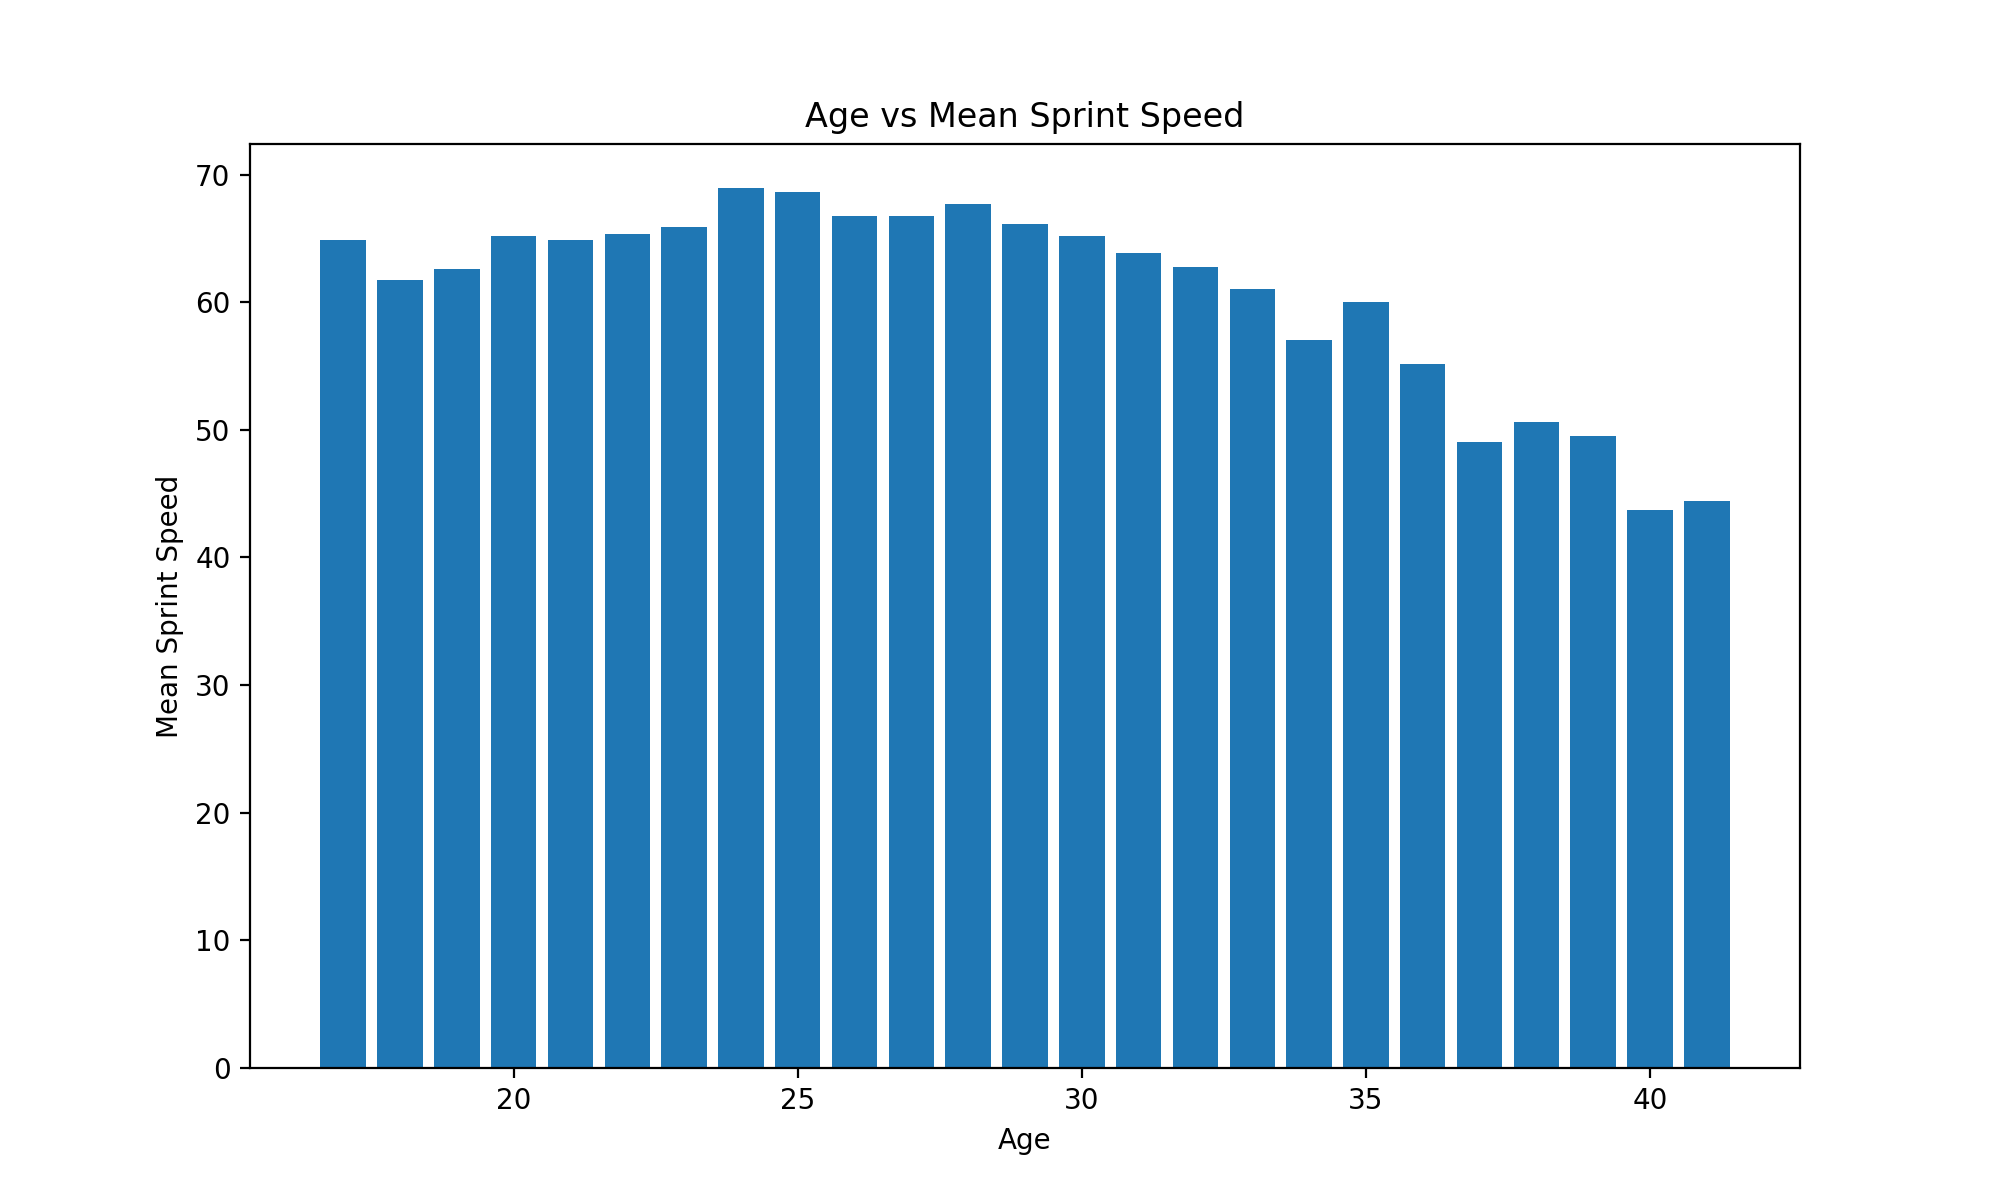

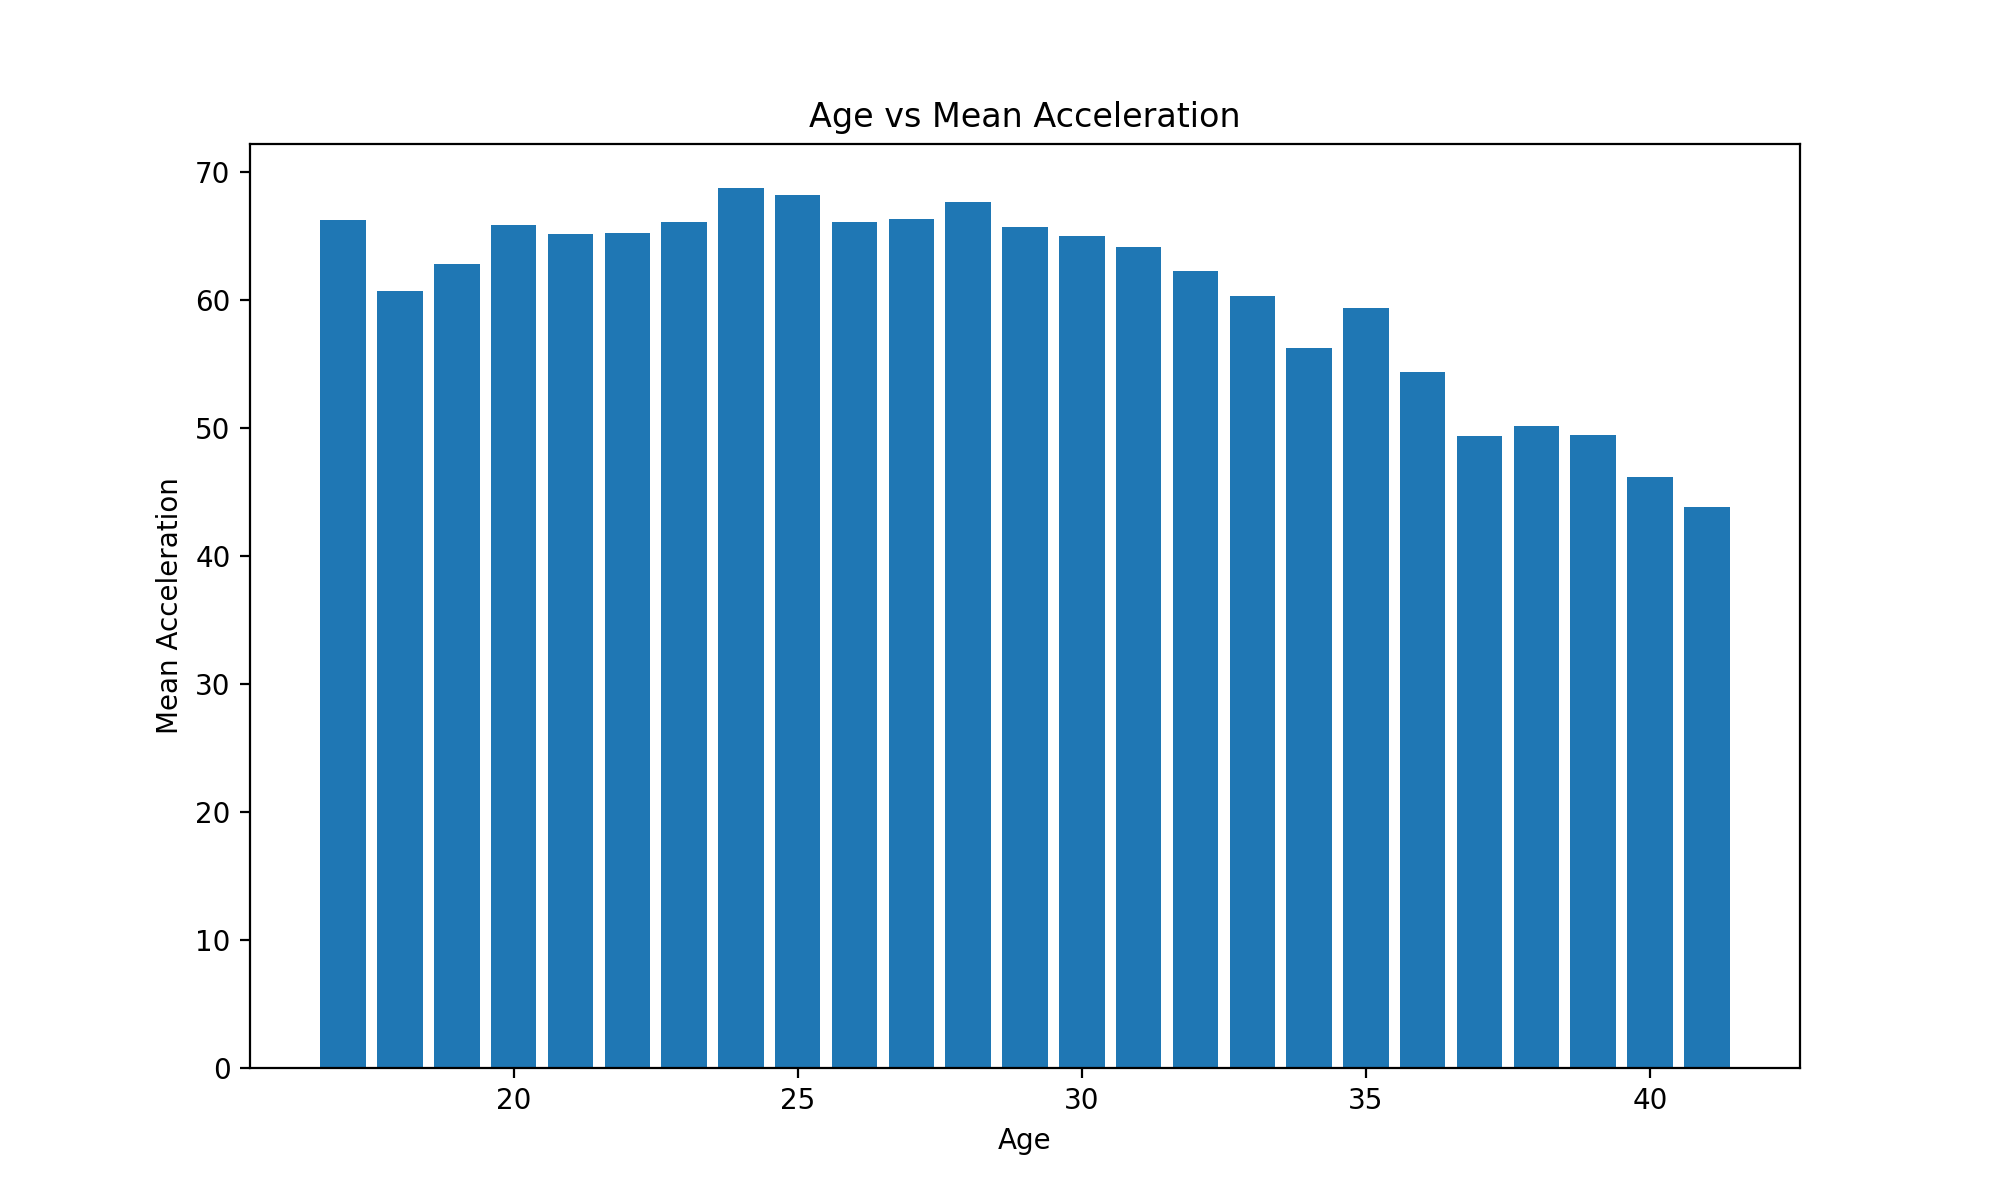

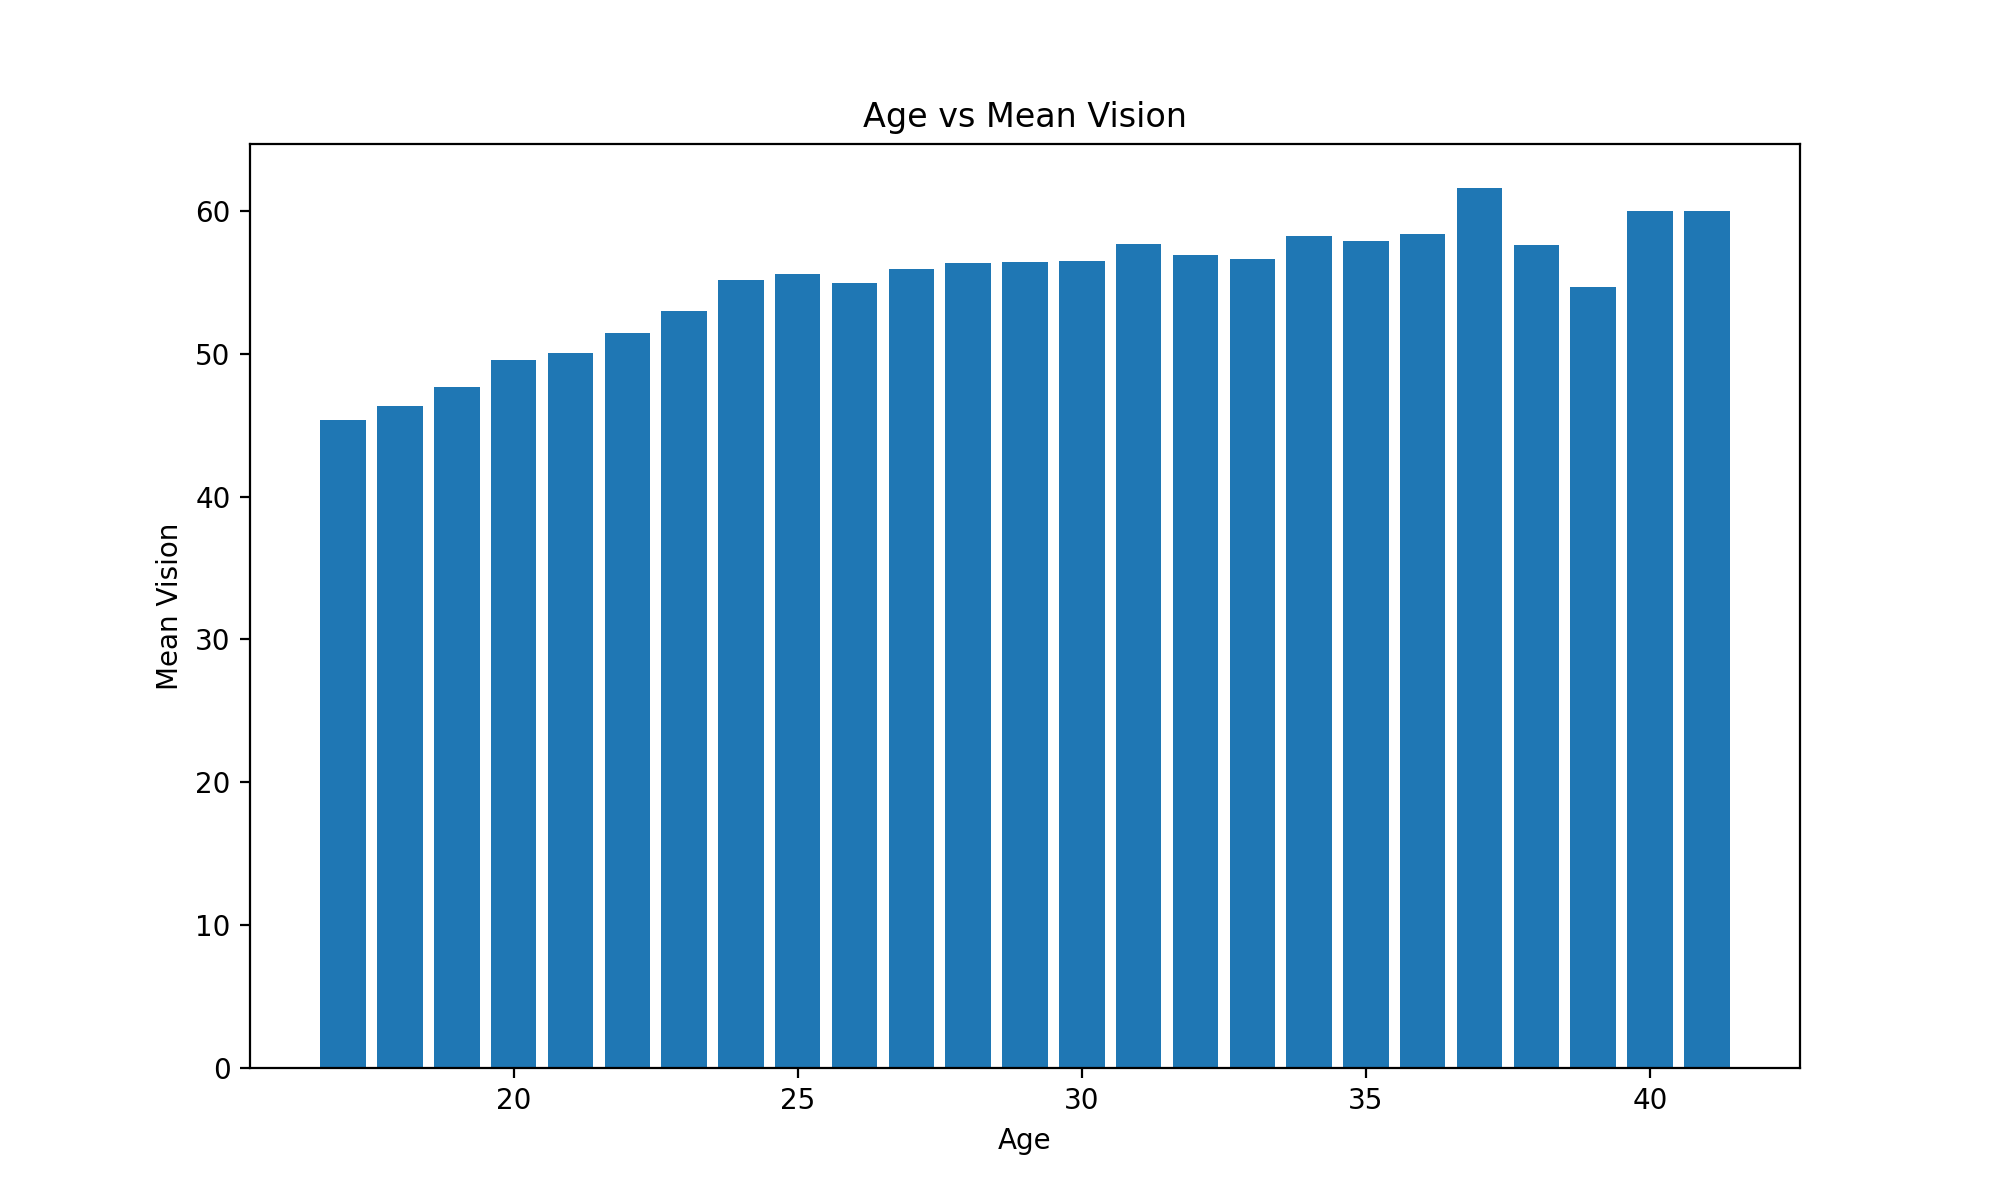

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'age' and calculate mean
mean_stats_by_age = player_stats.groupby('age')[['height', 'weight', 'sprint_speed', 'acceleration', 'vision']].mean()

# Function to plot histogram
def plot_histogram(data, title, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.bar(data.index, data)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Plot histograms for each attribute
plot_histogram(mean_stats_by_age['height'], 'Age vs Mean Height', 'Age', 'Mean Height (cm)')
plot_histogram(mean_stats_by_age['weight'], 'Age vs Mean Weight', 'Age', 'Mean Weight (kg)')
plot_histogram(mean_stats_by_age['sprint_speed'], 'Age vs Mean Sprint Speed', 'Age', 'Mean Sprint Speed')
plot_histogram(mean_stats_by_age['acceleration'], 'Age vs Mean Acceleration', 'Age', 'Mean Acceleration')
plot_histogram(mean_stats_by_age['vision'], 'Age vs Mean Vision', 'Age', 'Mean Vision')

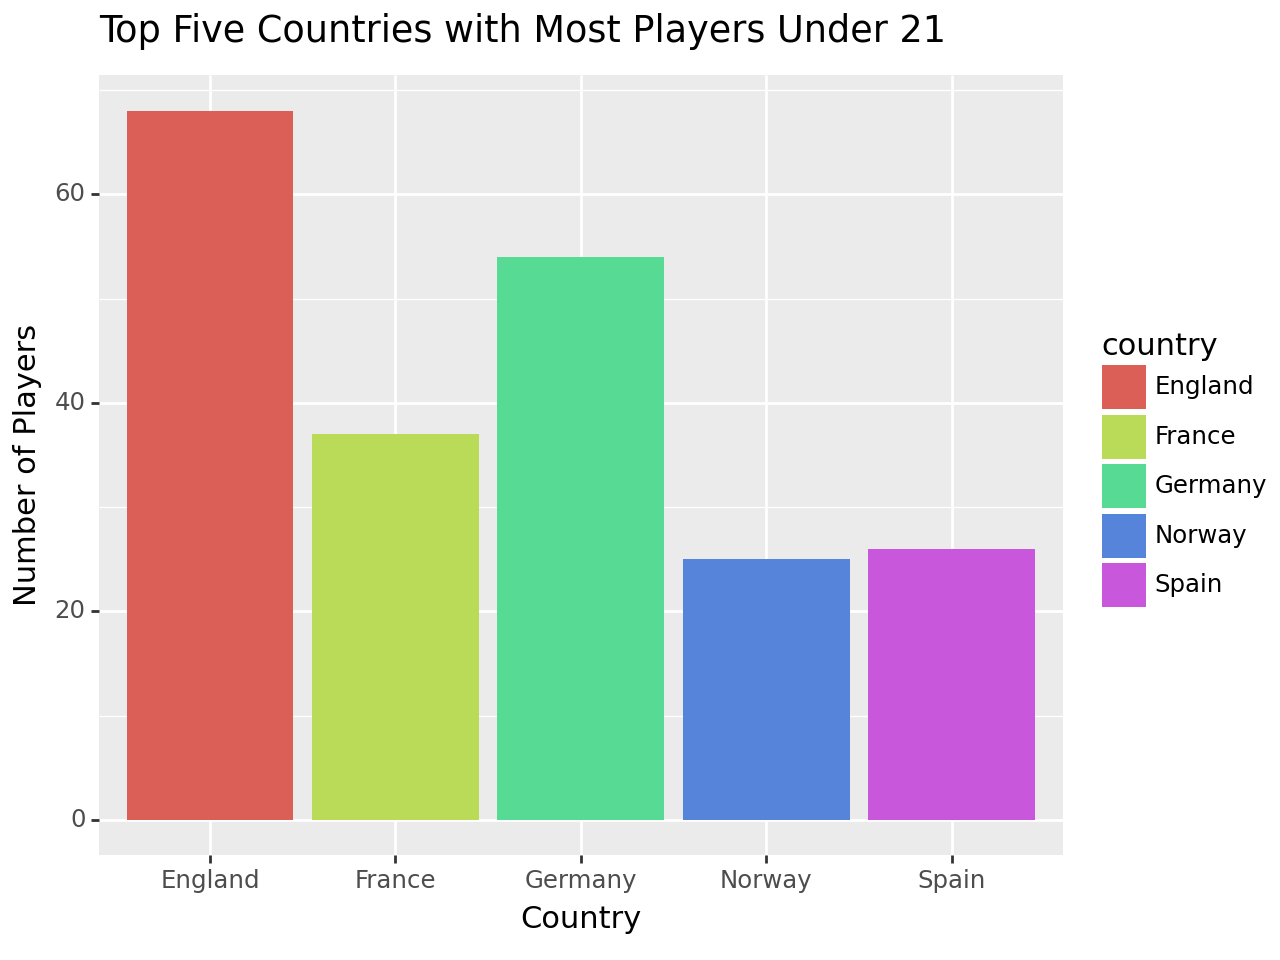

In [ ]:
players_under_21 = player_stats[player_stats['age'] < 21]

country_counts = players_under_21['country'].value_counts().reset_index()
country_counts.columns = ['country', 'player_count']


top_five_countries = country_counts.head(5)


plot = (ggplot(top_five_countries, aes(x='country', y='player_count', fill='country')) +
        geom_bar(stat='identity') +
        labs(title='Top Five Countries with Most Players Under 21',
             x='Country',
             y='Number of Players'))


print(plot)

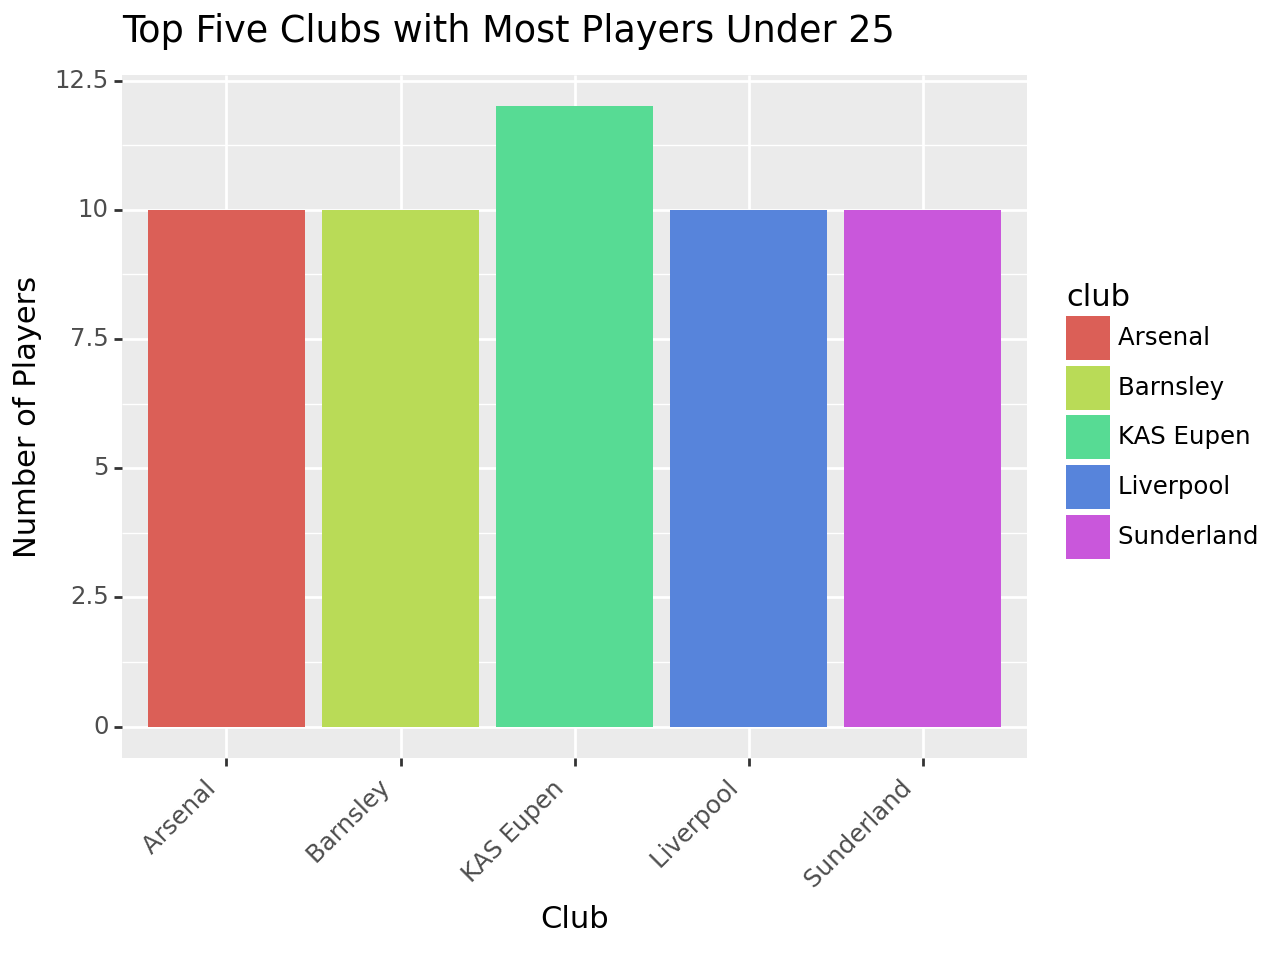

In [ ]:
players_under_25 = player_stats[player_stats['age'] < 25]

club_counts = players_under_25['club'].value_counts().reset_index()
club_counts.columns = ['club', 'player_count']

top_five_clubs = club_counts.head(5)

plot = (ggplot(top_five_clubs, aes(x='club', y='player_count', fill='club')) +
        geom_bar(stat='identity') +
        labs(title='Top Five Clubs with Most Players Under 25',
             x='Club',
             y='Number of Players') +
        theme(axis_text_x=element_text(angle=45, hjust=1)))  # Rotate x-axis labels for better readability

print(plot)

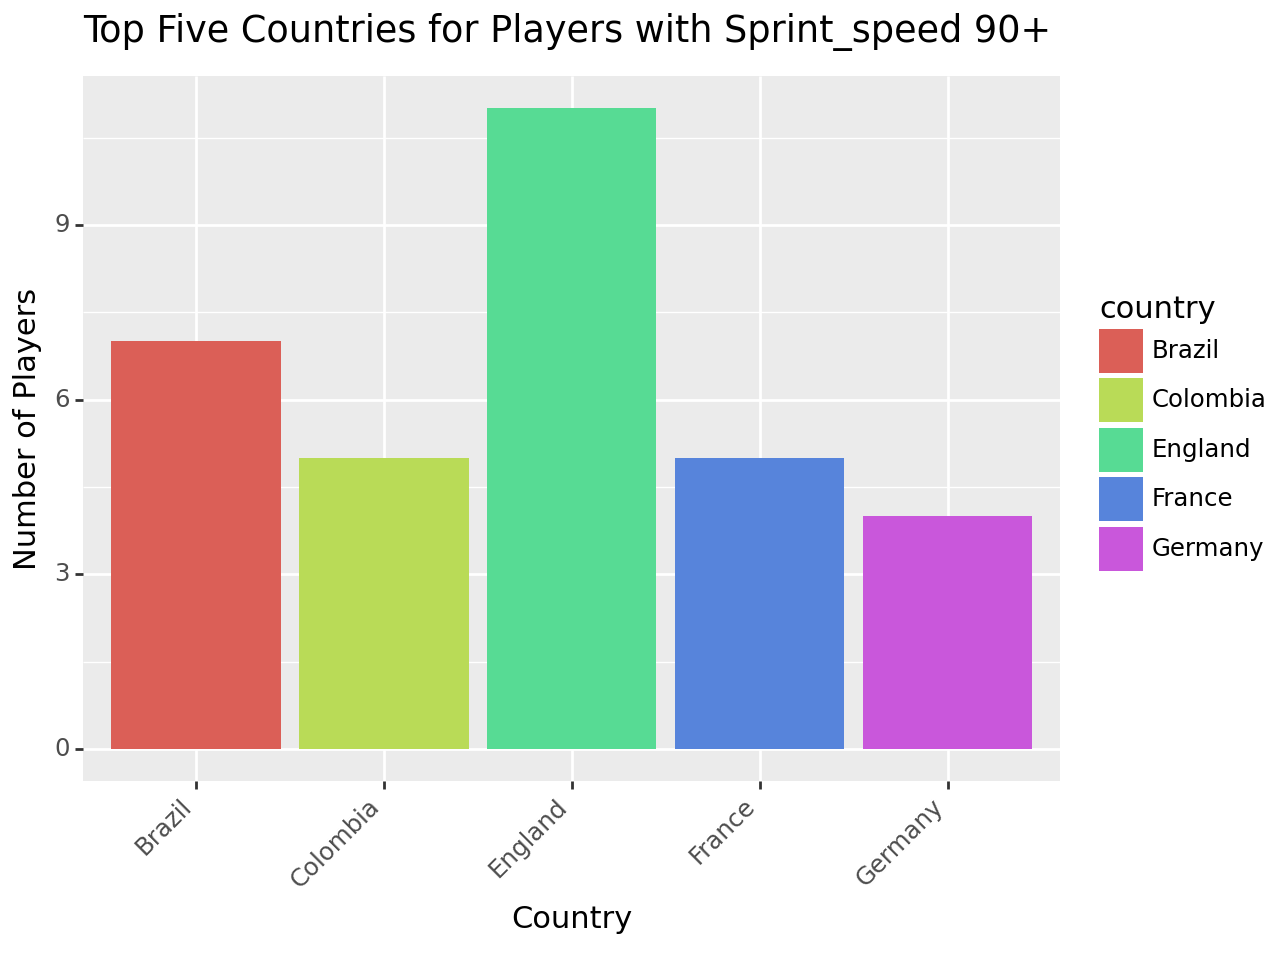

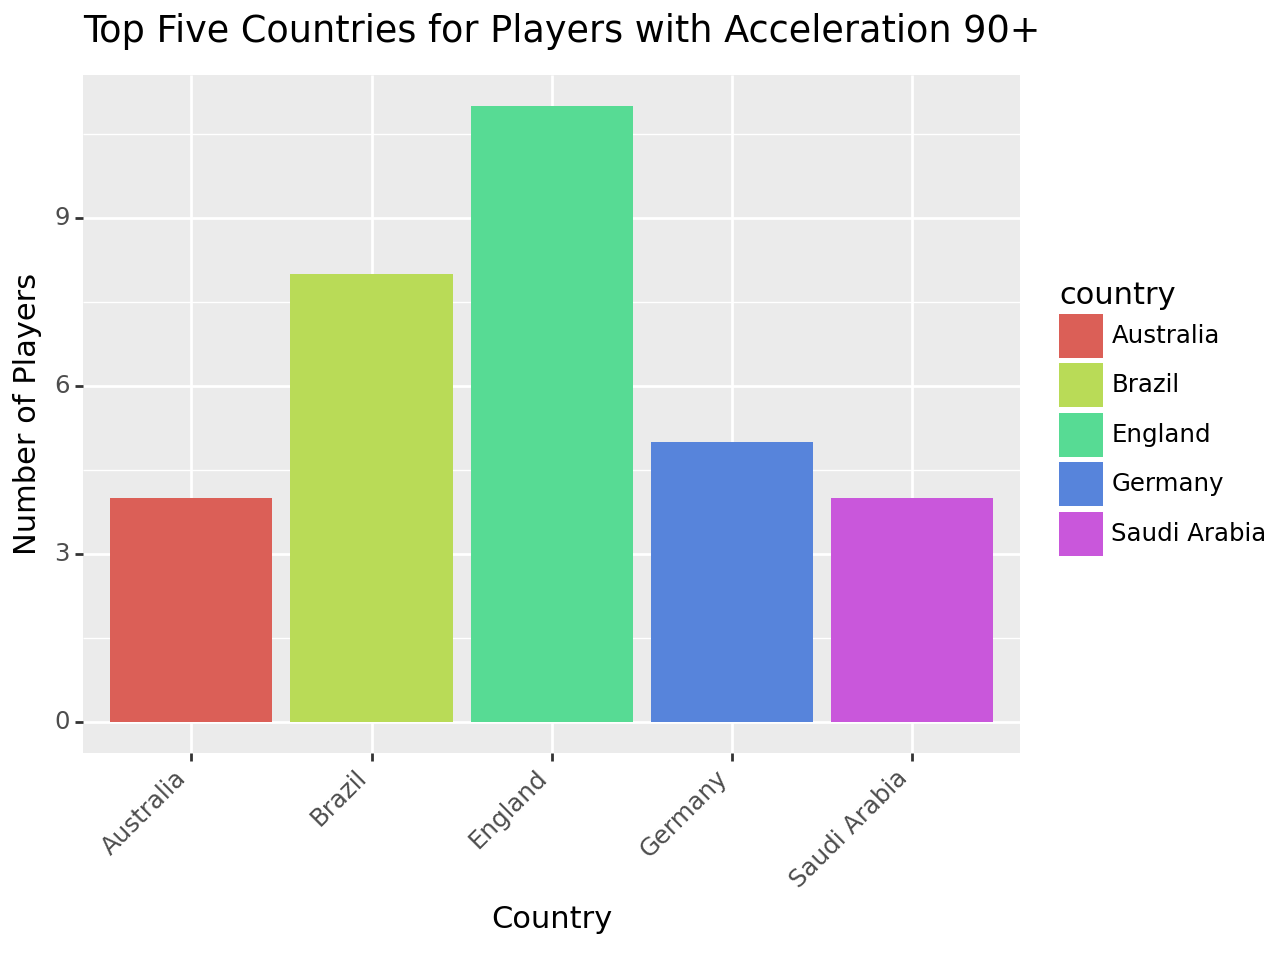

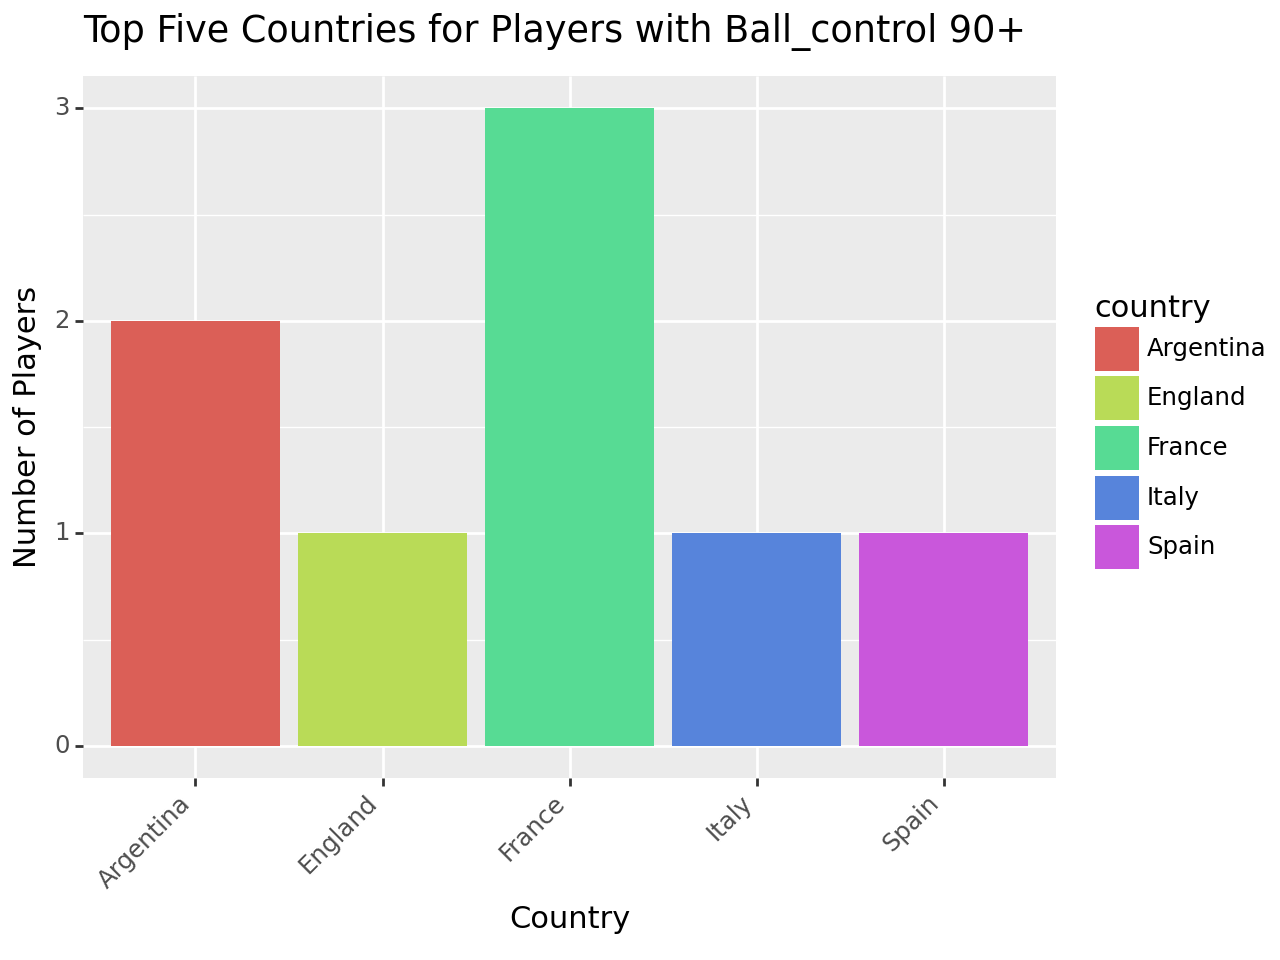

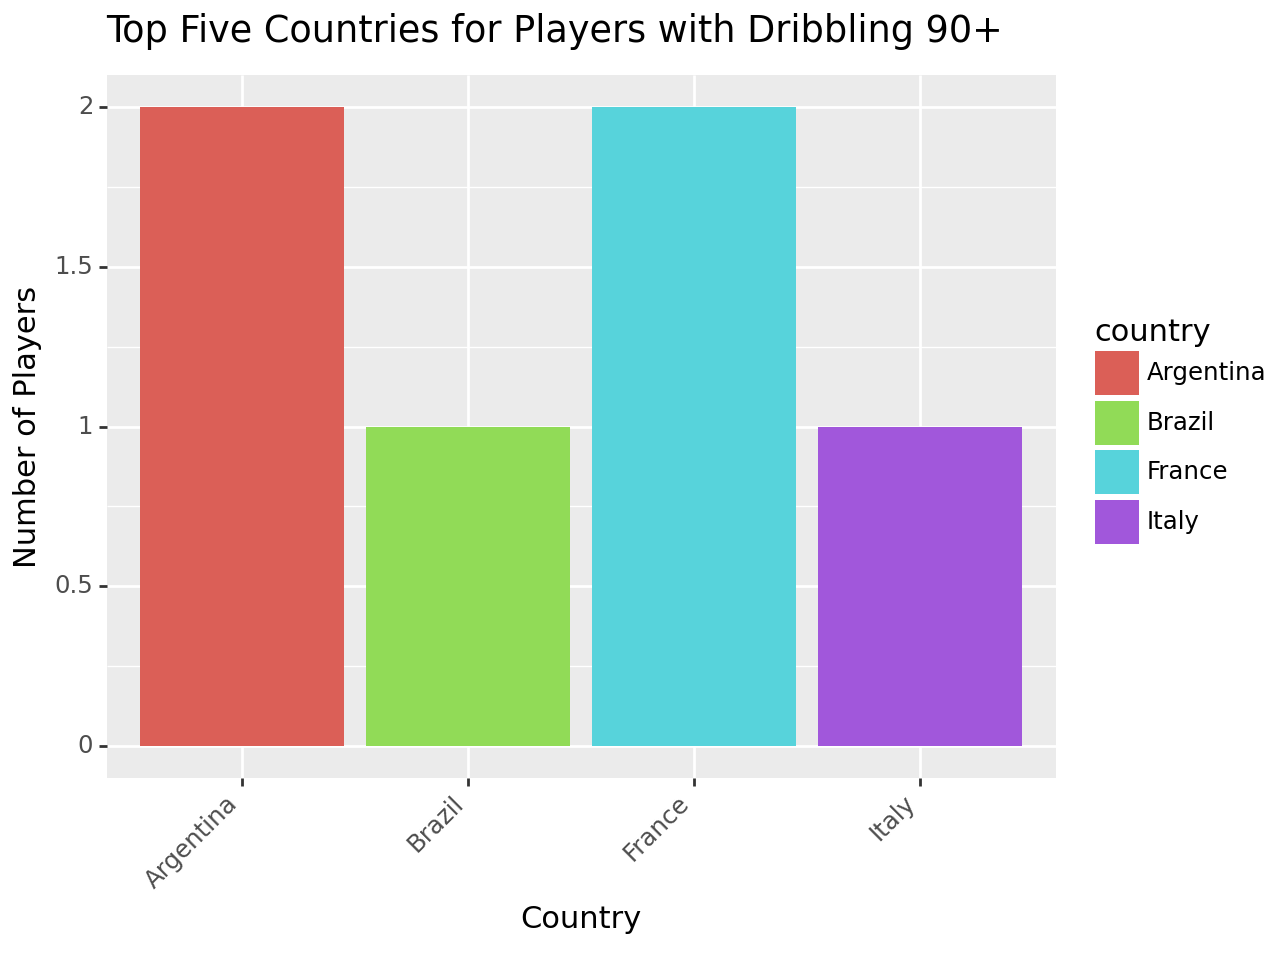

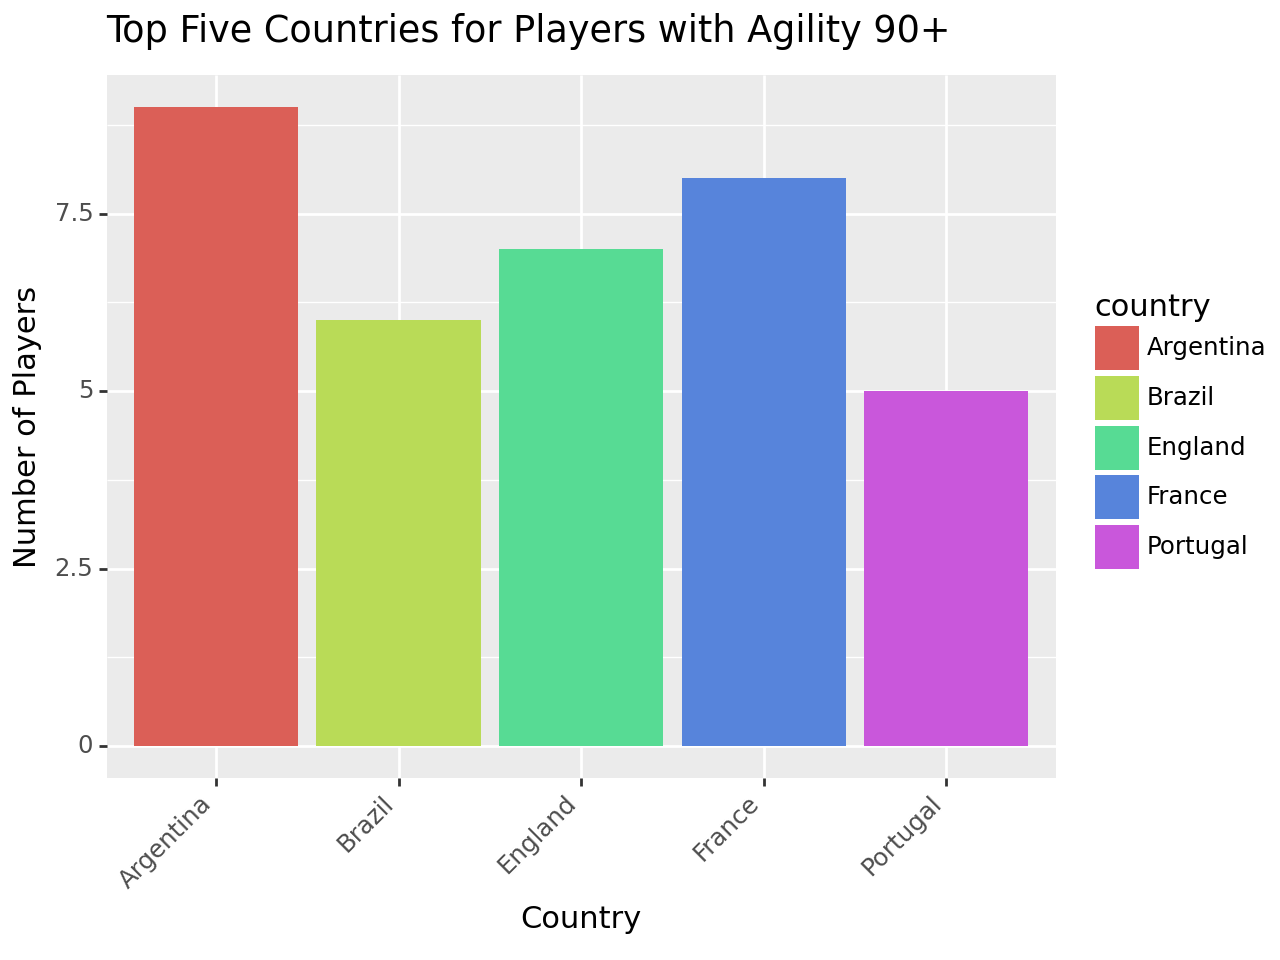

In [ ]:


def create_plot_for_attribute(attribute):

    high_attribute_players = player_stats[player_stats[attribute] >= 90]
    country_counts = high_attribute_players['country'].value_counts().reset_index()
    country_counts.columns = ['country', 'player_count']

    top_five_countries = country_counts.head(5)


    plot = (ggplot(top_five_countries, aes(x='country', y='player_count', fill='country')) +
            geom_bar(stat='identity') +
            labs(title=f'Top Five Countries for Players with {attribute.capitalize()} 90+',
                 x='Country',
                 y='Number of Players') +
            theme(axis_text_x=element_text(angle=45, hjust=1)))  # Rotate x-axis labels for readability

    return plot

attributes = ['sprint_speed', 'acceleration', 'ball_control', 'dribbling', 'agility']
for attribute in attributes:
    plot = create_plot_for_attribute(attribute)
    print(plot)



In [ ]:
pip install pycountry_convert


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 27.7 MB/s eta 0:00:00


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return 'Unknown'

player_stats['continent'] = player_stats['country'].apply(country_to_continent)

player_stats['continent_code'] = player_stats['continent'].astype('category').cat.codes

kmeans = KMeans(n_clusters=5)
kmeans.fit(player_stats[['continent_code']])
labels = kmeans.labels_

player_stats['cluster'] = labels

player_stats.to_csv('path_to_output_csv_file.csv', index=False)


player_stats.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


player   country  height  weight  age            club  \
0  Cristian Castro Devenish  Colombia     192      84   22  Atl. Nacional    
1          Silaldo Taffarel    Brazil     181      80   31    Corinthians    
2             Thomas DÃ¤hne   Germany     193      84   29  Holstein Kiel    
3         Michael Sollbauer   Austria     187      86   33  SK Rapid Wien    
4             Diego Segovia   Uruguay     191      80   23  Independiente    

   ball_control  dribbling  marking  slide_tackle  ...  volleys  \
0            55         43      NaN            68  ...       33   
1            69         70      NaN            56  ...       46   
2            25         12      NaN            13  ...       16   
3            46         48      NaN            66  ...       19   
4            14          8      NaN            14  ...        5   

   gk_positioning  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0              10         11            6           7            9   
1              12         15           14           8           14   
2              64         74           65          68           74   
3              10         10            8          14            9   
4              61         59           62          64           64   

        value      continent  continent_code  cluster  
0  $1.400.000  South America               5        4  
1    $975.00   South America               5        4  
2  $1.100.000         Europe               2        1  
3    $650.00          Europe               2        1  
4    $300.00   South America               5        4  

[5 rows x 44 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
<ipython-input-36-32450bc67844>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-36-32450bc67844>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


         age      height
0  24.096639  185.689076
1  30.065637  174.756757
2  22.650909  174.345455
3  33.251256  185.050251


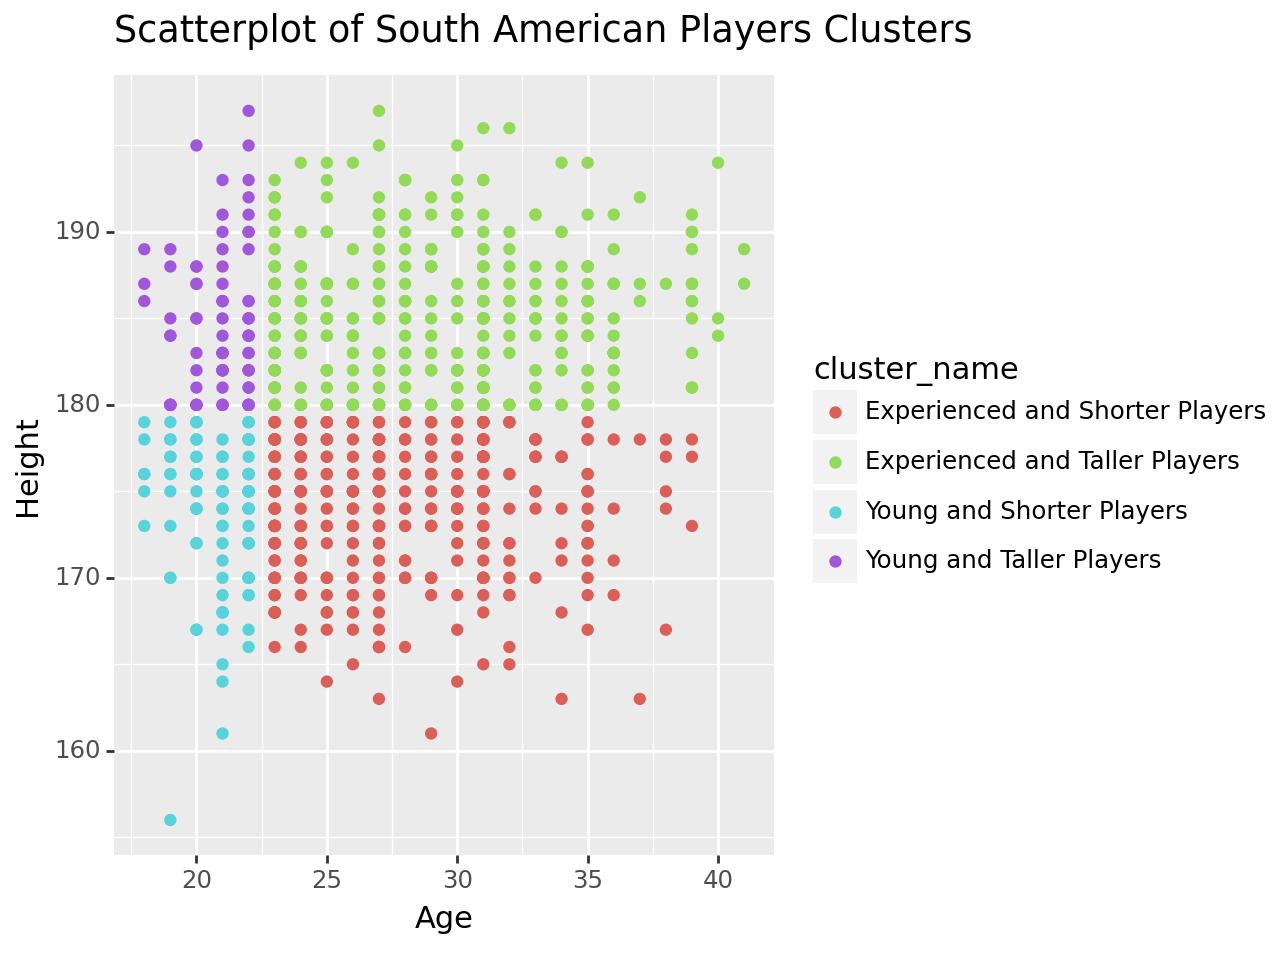

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from plotnine import ggplot, aes, geom_point, labs


european_players = player_stats[player_stats['continent'] == 'South America']

features = ['age', 'height']

scaler = StandardScaler()
european_players_scaled = scaler.fit_transform(european_players[features])

kmeans = KMeans(n_clusters=4)
kmeans.fit(european_players_scaled)
european_players['cluster'] = kmeans.labels_

cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print(cluster_centers)

def assign_cluster_name(row):
    age, height = row['age'], row['height']
    if age < 23 and height < 180:
        return 'Young and Shorter Players'
    elif age < 23 and height >= 180:
        return 'Young and Taller Players'
    elif age >= 23 and height < 180:
        return 'Experienced and Shorter Players'
    else:
        return 'Experienced and Taller Players'

european_players['cluster_name'] = european_players.apply(assign_cluster_name, axis=1)

plot = (ggplot(european_players, aes(x='age', y='height', color='cluster_name')) +
        geom_point() +
        labs(title='Scatterplot of South American Players Clusters',
             x='Age',
             y='Height'))

print(plot)

         age      height
0  29.639731  177.777778
1  21.949287  176.500792
2  31.551020  187.742115
3  23.165714  187.764571


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
<ipython-input-37-0187b41b0c76>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-37-0187b41b0c76>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


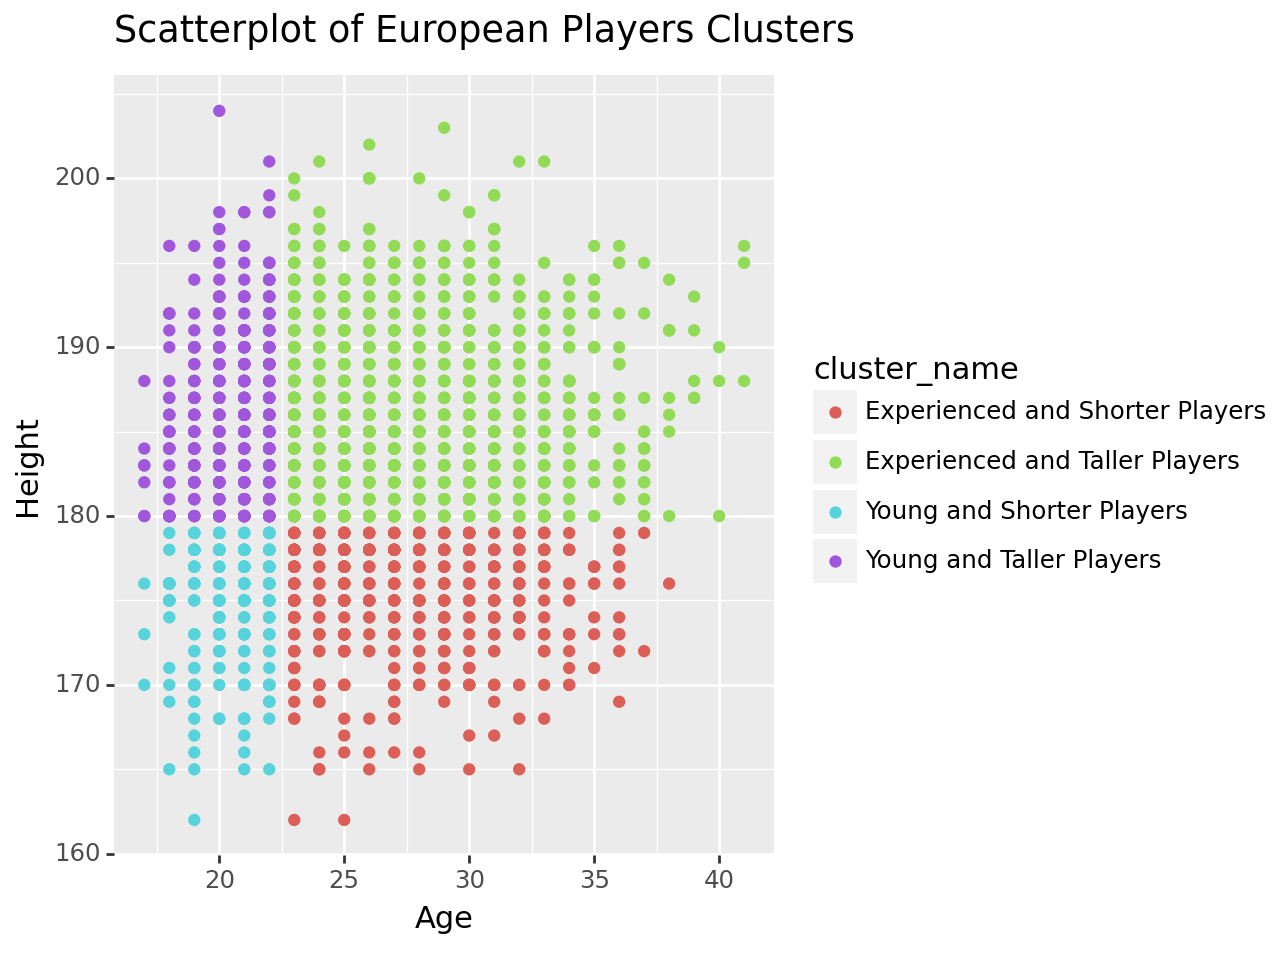

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from plotnine import ggplot, aes, geom_point, labs


european_players = player_stats[player_stats['continent'] == 'Europe']

features = ['age', 'height']

scaler = StandardScaler()
european_players_scaled = scaler.fit_transform(european_players[features])

kmeans = KMeans(n_clusters=4)
kmeans.fit(european_players_scaled)
european_players['cluster'] = kmeans.labels_

cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print(cluster_centers)

def assign_cluster_name(row):
    age, height = row['age'], row['height']
    if age < 23 and height < 180:
        return 'Young and Shorter Players'
    elif age < 23 and height >= 180:
        return 'Young and Taller Players'
    elif age >= 23 and height < 180:
        return 'Experienced and Shorter Players'
    else:
        return 'Experienced and Taller Players'

european_players['cluster_name'] = european_players.apply(assign_cluster_name, axis=1)

plot = (ggplot(european_players, aes(x='age', y='height', color='cluster_name')) +
        geom_point() +
        labs(title='Scatterplot of European Players Clusters',
             x='Age',
             y='Height'))

print(plot)


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

columns_for_clustering = ['age', 'height', 'sprint_speed', 'stamina']

player_stats_cleaned = player_stats.dropna(subset=columns_for_clustering)

kmeans = KMeans(n_clusters=4)
kmeans.fit(player_stats_cleaned[columns_for_clustering])
labels = kmeans.labels_

player_stats_cleaned['cluster'] = labels

cluster_summary = player_stats_cleaned.groupby('cluster').agg(
    mean_age=('age', 'mean'),
    mean_height=('height', 'mean'),
    mean_weight=('stamina', 'mean'),
    mean_ball_control=('sprint_speed', 'mean')
)


print(cluster_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


          mean_age  mean_height  mean_weight  mean_ball_control
cluster                                                        
0        23.841396   179.319657    57.432945          69.759951
1        28.100796   185.170645    67.450044          54.338638
2        26.875168   179.460850    75.827740          75.446980
3        27.449488   188.726208    30.103953          36.746706


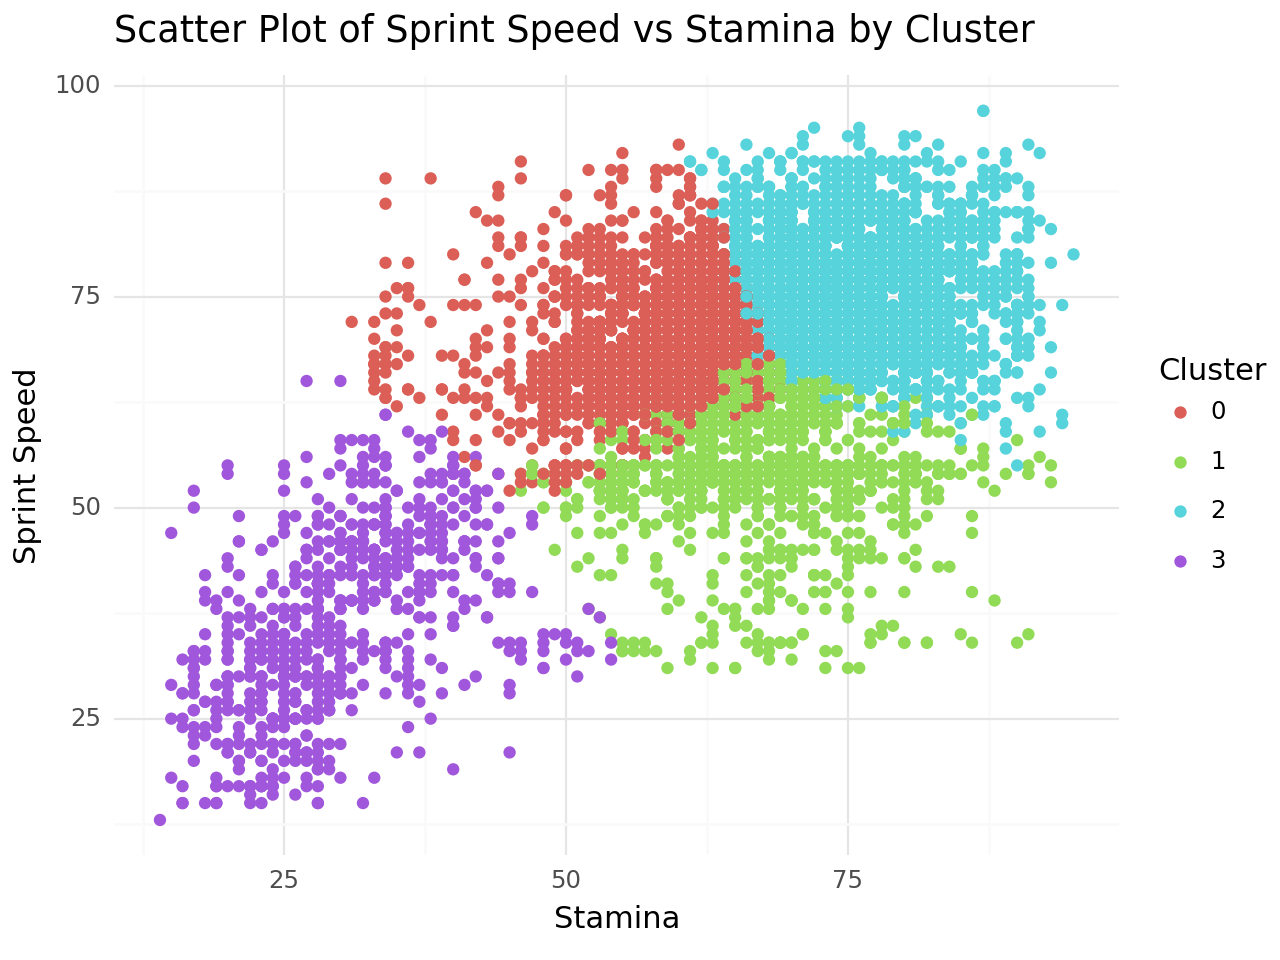

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import ggplot, aes, geom_point, labs, theme_minimal

(ggplot(player_stats_cleaned, aes(x='stamina', y='sprint_speed', color='factor(cluster)'))
 + geom_point()
 + labs(title='Scatter Plot of Sprint Speed vs Stamina by Cluster', x='Stamina', y='Sprint Speed', color='Cluster')
 + theme_minimal())

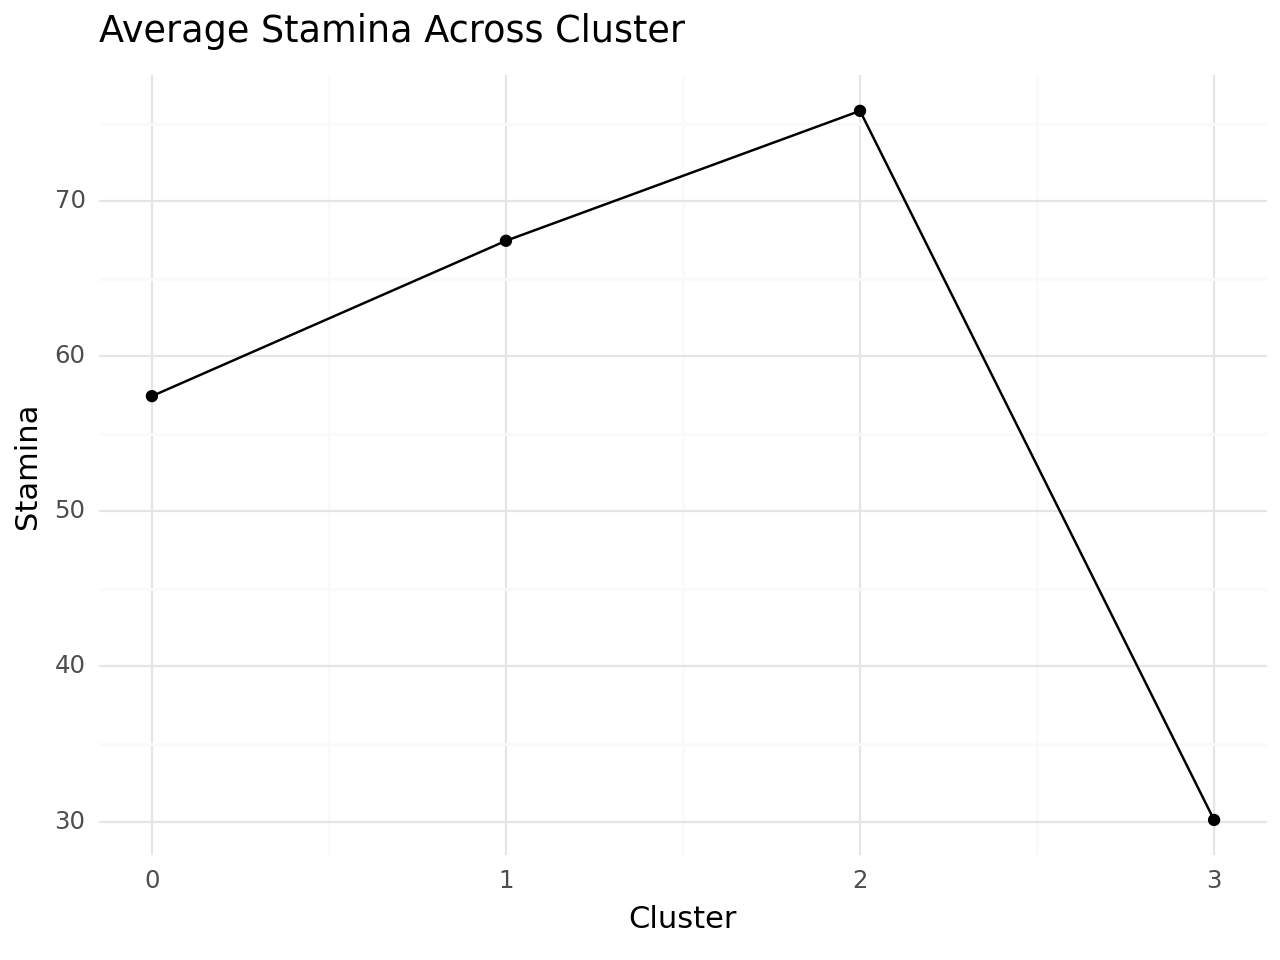

<Figure Size: (640 x 480)>

In [ ]:
mean_ball_control_df = player_stats_cleaned.groupby('cluster')['stamina'].mean().reset_index()

from plotnine import geom_line

(ggplot(mean_ball_control_df, aes(x='cluster', y='stamina', group=1))
 + geom_line()
 + geom_point()
 + labs(title='Average Stamina Across Cluster', x='Cluster', y='Stamina')
 + theme_minimal())

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(player_stats_cleaned[columns_for_clustering], labels)

print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.30276667444660466


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = scaler.fit_transform(player_stats_cleaned[columns_for_clustering])

In [ ]:
from sklearn.metrics import silhouette_score

K = range(2, 8)
fits = []
scores = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(data_standardized)
    fits.append(model)
    scores.append(silhouette_score(data_standardized, model.labels_, metric='euclidean'))

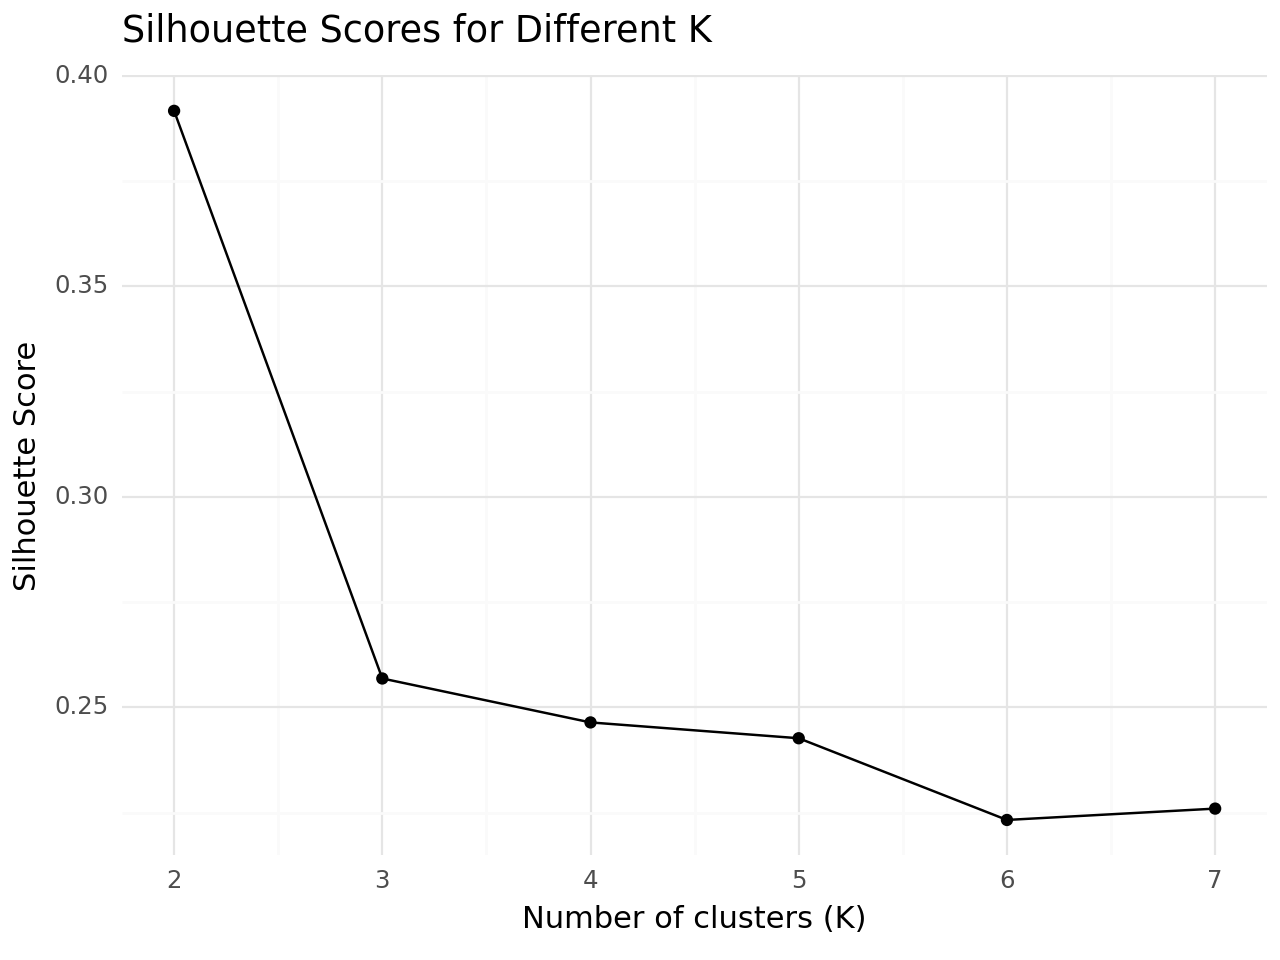

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal

silhouette_df = pd.DataFrame({'K': list(K), 'Silhouette Score': scores})

(ggplot(silhouette_df, aes(x='K', y='Silhouette Score'))
 + geom_line()
 + geom_point()
 + labs(title='Silhouette Scores for Different K', x='Number of clusters (K)', y='Silhouette Score')
 + theme_minimal())

In [ ]:
import scipy.stats as stats

In [ ]:
datfot = (player_stats)

# **Players from these Latin American countries (Argentina, Brazil, Chile) have statistically higher agility and sprint speed than players from other countries.**

Players from Europe ha higher 'att position', 'finishing', and 'shot power' are more likely to score goals, than Brazilian latin players.
* H0: There is no significant difference in 'att position', 'finishing', and
'shot power' between players from Europe and Brazilian Latin players, and these attributes do not differ significantly in predicting the likelihood of scoring goals.
* 	H1: Players from Europe have significantly higher 'att position', 'finishing', and 'shot power' compared to Brazilian Latin players, and these attributes are more predictive of the likelihood of scoring goals for European players.

In [ ]:
latin_american_countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia']

In [ ]:
latin_players = datfot[datfot['country'].isin(latin_american_countries)]
other_players = datfot[~datfot['country'].isin(latin_american_countries)]

In [ ]:
f_statistic_agility, p_value_agility = stats.f_oneway(latin_players['agility'], other_players['agility'])

print("ANOVA test for Agility")
print("F-Statistic:", f_statistic_agility, "P-value:", p_value_agility)

ANOVA test for Agility
F-Statistic: 19.443239100798724 P-value: 1.0554576680756663e-05



ANOVA test for Sprint Speed
F-Statistic: 16.842144766730748 P-value: 4.119014662716646e-05


In [ ]:
alpha = 0.05

if p_value_agility < alpha:
    print("\nReject the null hypothesis for Agility: Latin American players have statistically higher agility.")
else:
    print("\nFail to reject the null hypothesis for Agility: No significant difference in agility.")

if p_value_speed < alpha:
    print("\nReject the null hypothesis for Sprint Speed: Latin American players have statistically higher sprint speed.")
else:
    print("\nFail to reject the null hypothesis for Sprint Speed: No significant difference in sprint speed.")


Reject the null hypothesis for Agility: Latin American players have statistically higher agility.

Reject the null hypothesis for Sprint Speed: Latin American players have statistically higher sprint speed.


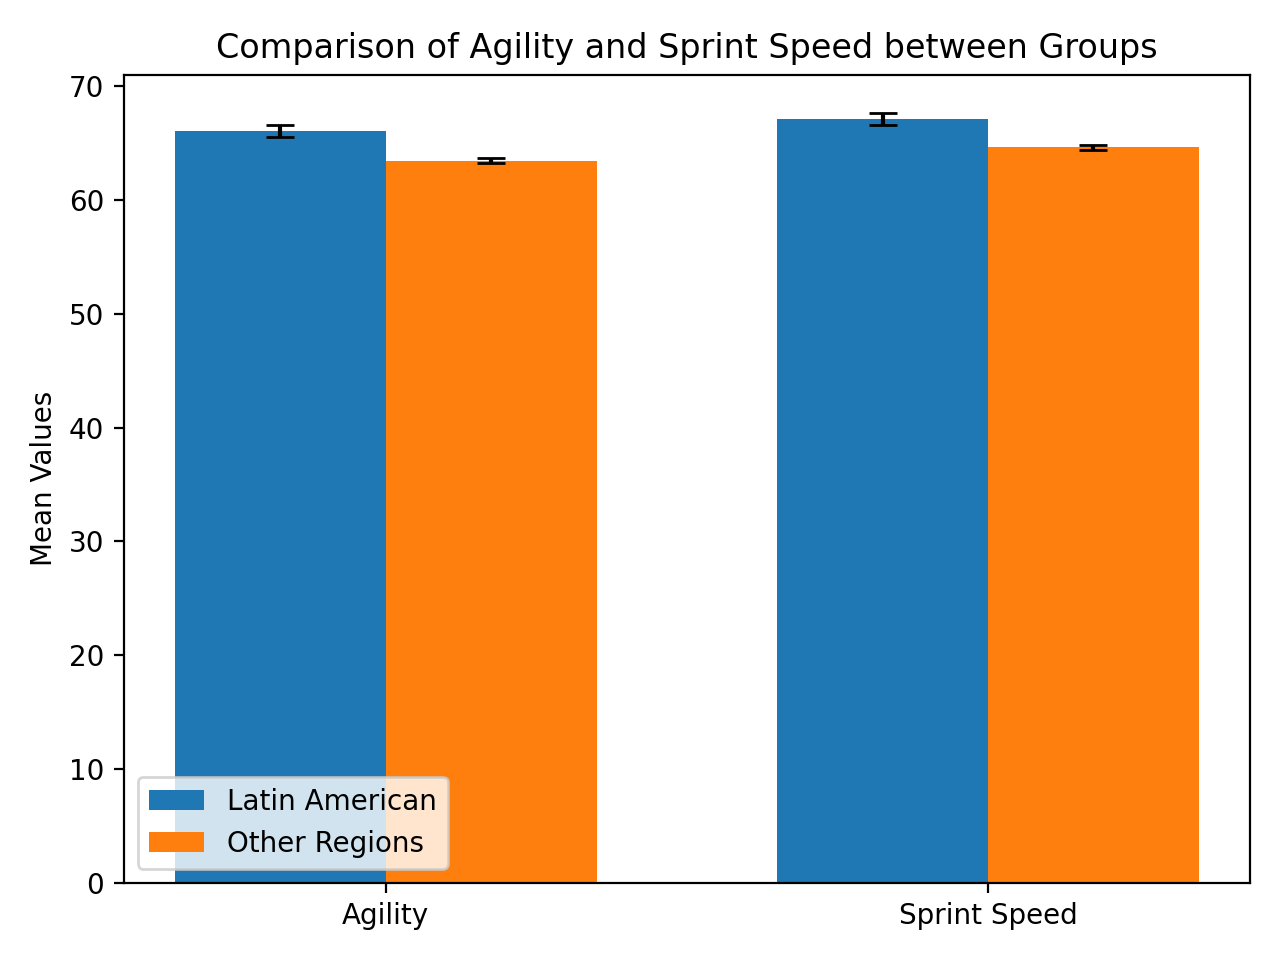

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

attributes = ['Agility', 'Sprint Speed']
means_latin = [latin_players['agility'].mean(), latin_players['sprint_speed'].mean()]
std_err_latin = [latin_players['agility'].std() / np.sqrt(len(latin_players)),
                 latin_players['sprint_speed'].std() / np.sqrt(len(latin_players))]
means_other = [other_players['agility'].mean(), other_players['sprint_speed'].mean()]
std_err_other = [other_players['agility'].std() / np.sqrt(len(other_players)),
                  other_players['sprint_speed'].std() / np.sqrt(len(other_players))]

x = np.arange(len(attributes))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, means_latin, width, label='Latin American', yerr=std_err_latin, capsize=5)
bars2 = ax.bar(x + width/2, means_other, width, label='Other Regions', yerr=std_err_other, capsize=5)

ax.set_ylabel('Mean Values')
ax.set_title('Comparison of Agility and Sprint Speed between Groups')
ax.set_xticks(x)
ax.set_xticklabels(attributes)
ax.legend()

plt.tight_layout()
plt.show()

# **•	Weight and Dribbling Skills**


*   H0= There is no significant correlation between weight and dribbling skills

*   H1= weight and dribbling skills has significant corrleation



In [ ]:
weight = datfot['weight']
dribbling_skills = datfot['dribbling']

correlation_coefficient, p_value = stats.pearsonr(weight, dribbling_skills)

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between weight and dribbling skills.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between weight and dribbling skills.")

Correlation Coefficient: -0.40530185786079026
P-value: 1.2150505073145844e-223
Reject the null hypothesis: There is a significant correlation between weight and dribbling skills.


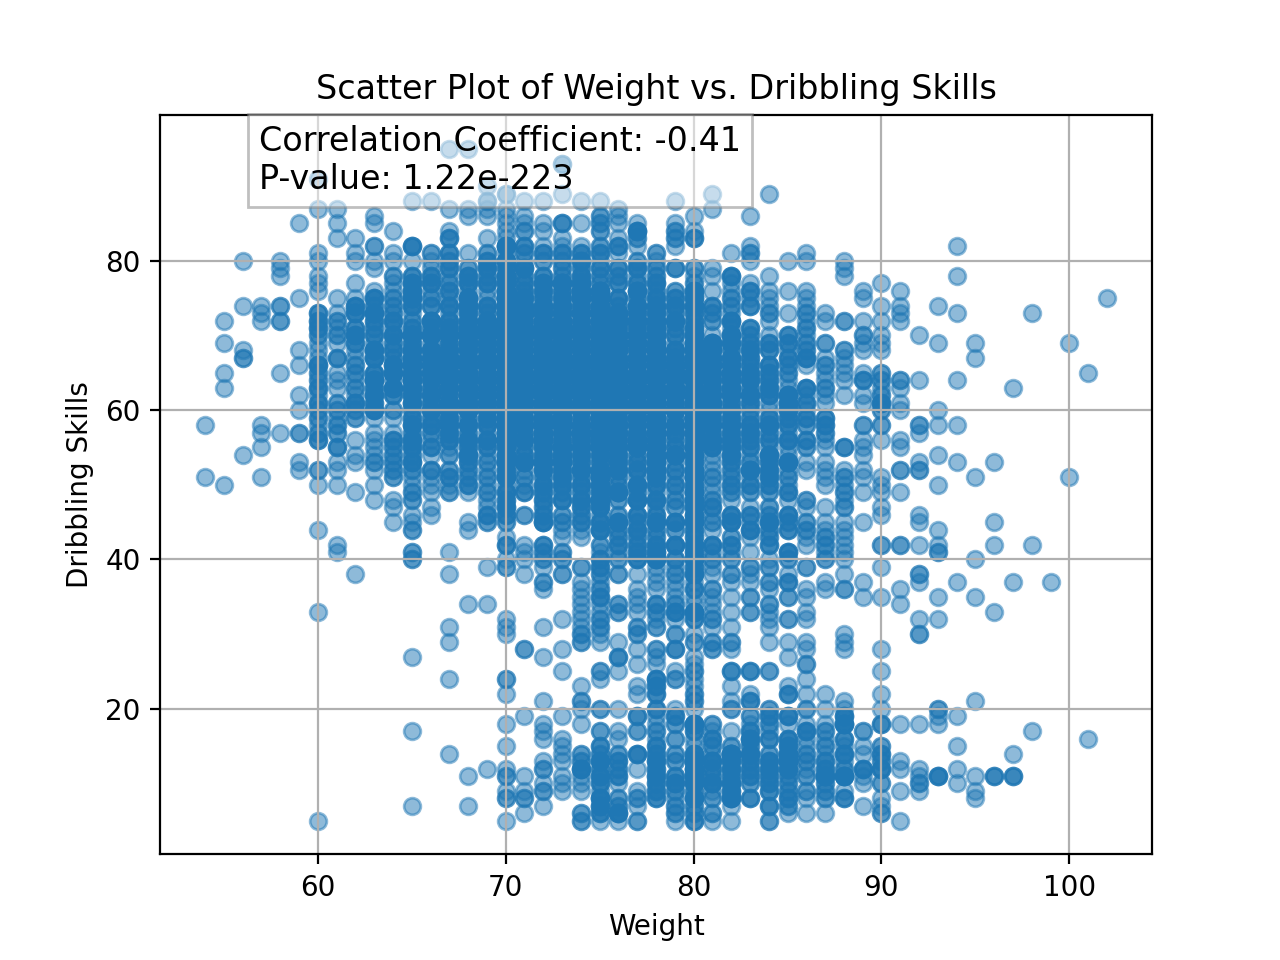

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(weight, dribbling_skills, alpha=0.5)
plt.title("Scatter Plot of Weight vs. Dribbling Skills")
plt.xlabel("Weight")
plt.ylabel("Dribbling Skills")
plt.grid(True)

correlation_info = f"Correlation Coefficient: {correlation_coefficient:.2f}\nP-value: {p_value:.2e}"

plt.text(0.1, 0.9, correlation_info, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', alpha=0.5))

plt.show()

# **Tall Players makes the Best Defendeing line**

Results for slide_tackle:
                                 OLS Regression Results                                
Dep. Variable:           slide_tackle   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                          2.847e+04
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                        0.00
Time:                        04:39:32   Log-Likelihood:                         -25311.
No. Observations:                5682   AIC:                                  5.062e+04
Df Residuals:                    5681   BIC:                                  5.063e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

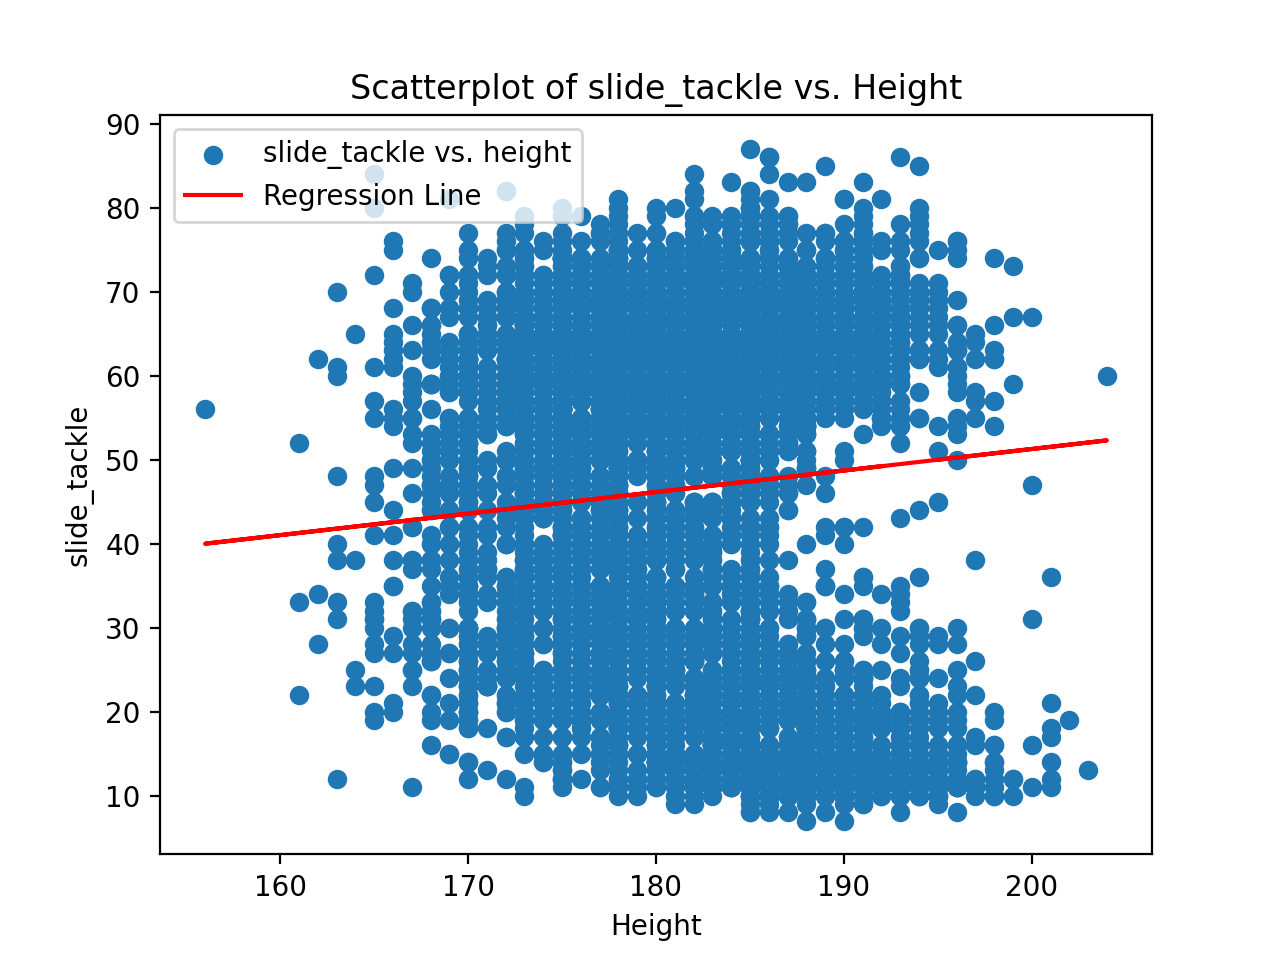

Results for stand_tackle:
                                 OLS Regression Results                                
Dep. Variable:           stand_tackle   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                          2.974e+04
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                        0.00
Time:                        04:39:33   Log-Likelihood:                         -25437.
No. Observations:                5682   AIC:                                  5.088e+04
Df Residuals:                    5681   BIC:                                  5.088e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

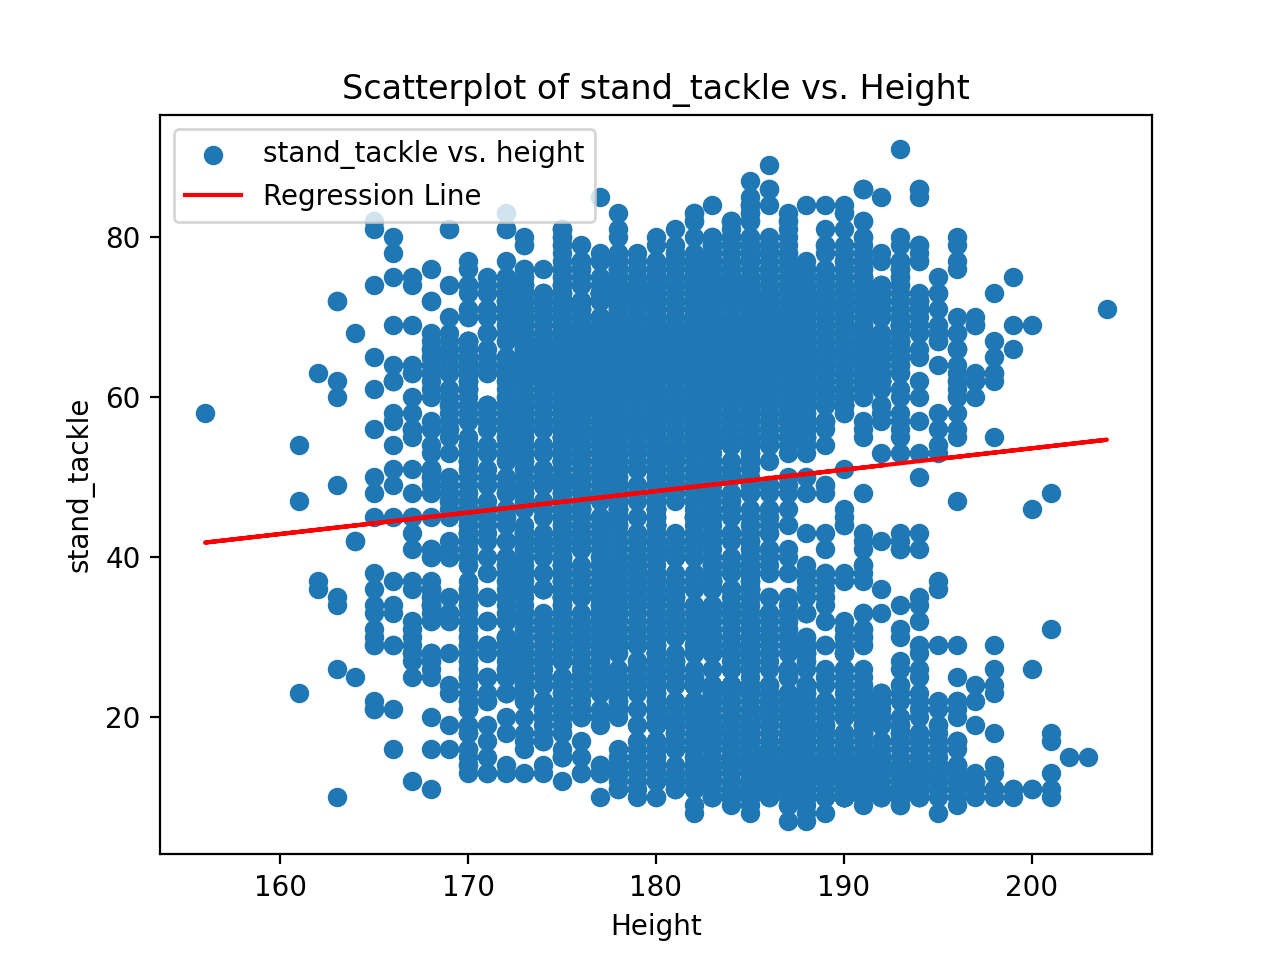

Results for aggression:
                                 OLS Regression Results                                
Dep. Variable:             aggression   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                          6.091e+04
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                        0.00
Time:                        04:39:33   Log-Likelihood:                         -24217.
No. Observations:                5682   AIC:                                  4.844e+04
Df Residuals:                    5681   BIC:                                  4.844e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

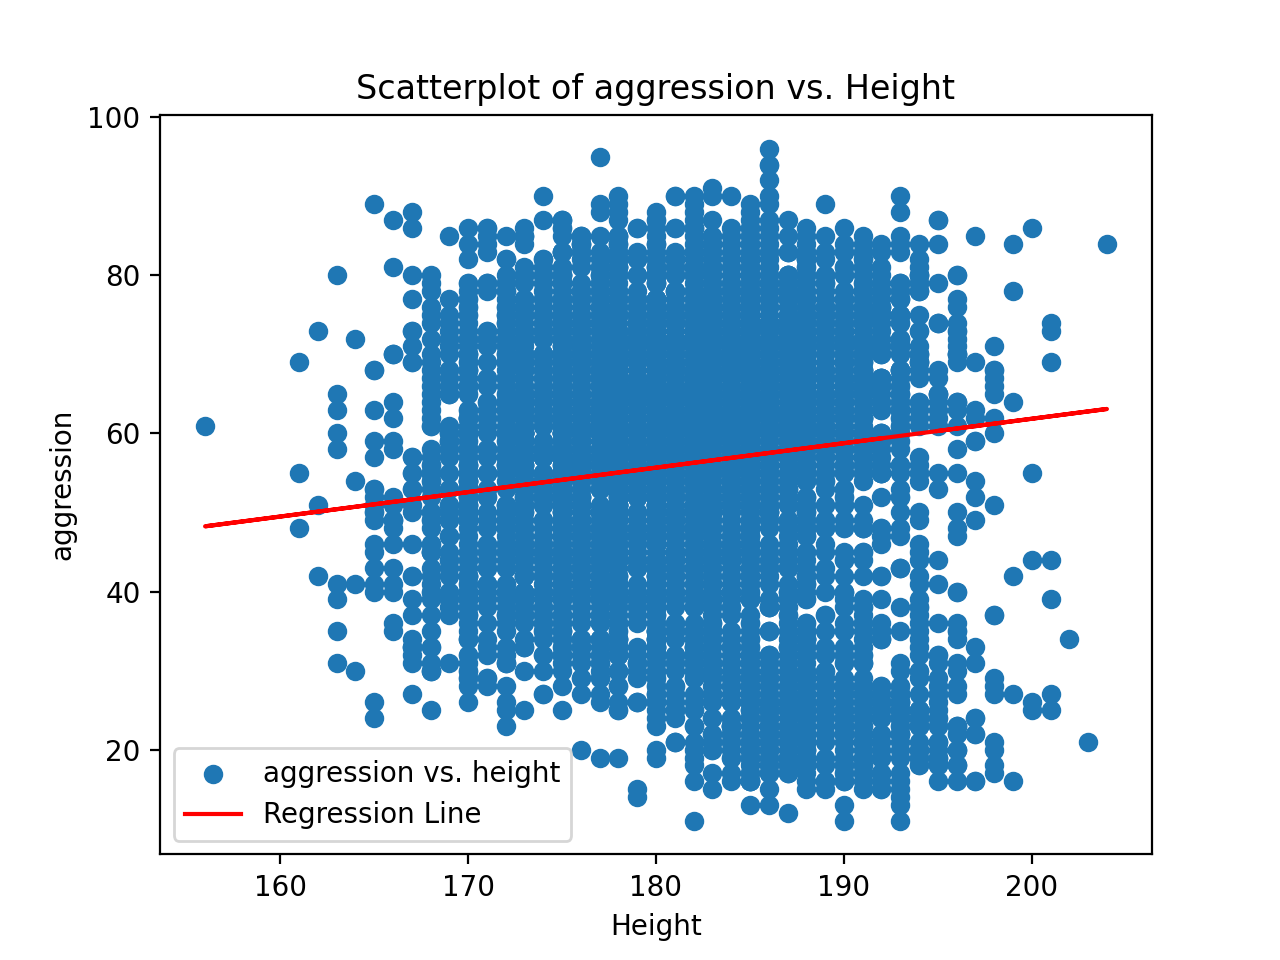

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = datfot[['height']]
Y = datfot[['slide_tackle', 'stand_tackle', 'aggression']]

for attribute in Y.columns:
    model = sm.OLS(Y[attribute], X).fit()
    print(f"Results for {attribute}:")
    print(model.summary())
    print("\n")

    plt.scatter(X['height'], Y[attribute], label=f'{attribute} vs. height')
    plt.xlabel('Height')
    plt.ylabel(attribute)
    plt.title(f'Scatterplot of {attribute} vs. Height')  # Fix the title here

    plt.plot(X['height'], model.predict(X), color='red', label='Regression Line')

    plt.legend()

    plt.show()

# **European players are better finisher**

Players from Europe ha higher 'att position', 'finishing', and 'shot power' are more likely to score goals, than Brazilian latin players.
* H0: There is no significant difference in 'att position', 'finishing', and
'shot power' between players from Europe and Brazilian Latin players, and these attributes do not differ significantly in predicting the likelihood of scoring goals.
* 	H1: Players from Europe have significantly higher 'att position', 'finishing', and 'shot power' compared to Brazilian Latin players, and these attributes are more predictive of the likelihood of scoring goals for European players.

In [ ]:
import pandas as pd
from scipy import stats

# Assuming datfot is your DataFrame
# Define the country lists
latin_american_countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia']
european_countries = ['Germany', 'Austria', 'Portugal', 'Switzerland', 'Sweden', 'England',
                      'Scotland', 'France', 'Italy', 'Norway', 'Turkey', 'Republic of Ireland',
                      'Poland', 'Ukraine', 'Romania', 'Netherlands', 'Spain', 'Denmark',
                      'Croatia', 'Russia', 'Bosnia & Herzegovina', 'Hungary', 'Finland',
                      'Kosovo', 'Slovakia', 'Czech Republic', 'Montenegro', 'Lithuania',
                      'Luxembourg', 'Moldova', 'Bulgaria', 'Latvia', 'Estonia', 'Georgia',
                      'Greece', 'Malta', 'Liechtenstein']

# Filter the DataFrame for European and Latin American players
latin_players = datfot[datfot['country'].isin(latin_american_countries)]
european_players = datfot[datfot['country'].isin(european_countries)]

# Perform the T-test for each attribute
for attribute in ['att_position', 'finishing', 'shot_power']:
    t_stat, p_value = stats.ttest_ind(european_players[attribute], latin_players[attribute], equal_var=False)

    print(f"Attribute: {attribute}")
    print(f"T-statistic: {t_stat}, P-value: {p_value}")

    # Decision based on alpha level
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: Significant difference in", attribute)
    else:
        print("Fail to reject the null hypothesis: No significant difference in", attribute)
    print("\n")


Attribute: att_position
T-statistic: -5.669659012829808, P-value: 1.831068250910295e-08
Reject the null hypothesis: Significant difference in att_position


Attribute: finishing
T-statistic: -4.903214071856643, P-value: 1.0882970757012475e-06
Reject the null hypothesis: Significant difference in finishing


Attribute: shot_power
T-statistic: -5.719713024072673, P-value: 1.3909944315557173e-08
Reject the null hypothesis: Significant difference in shot_power




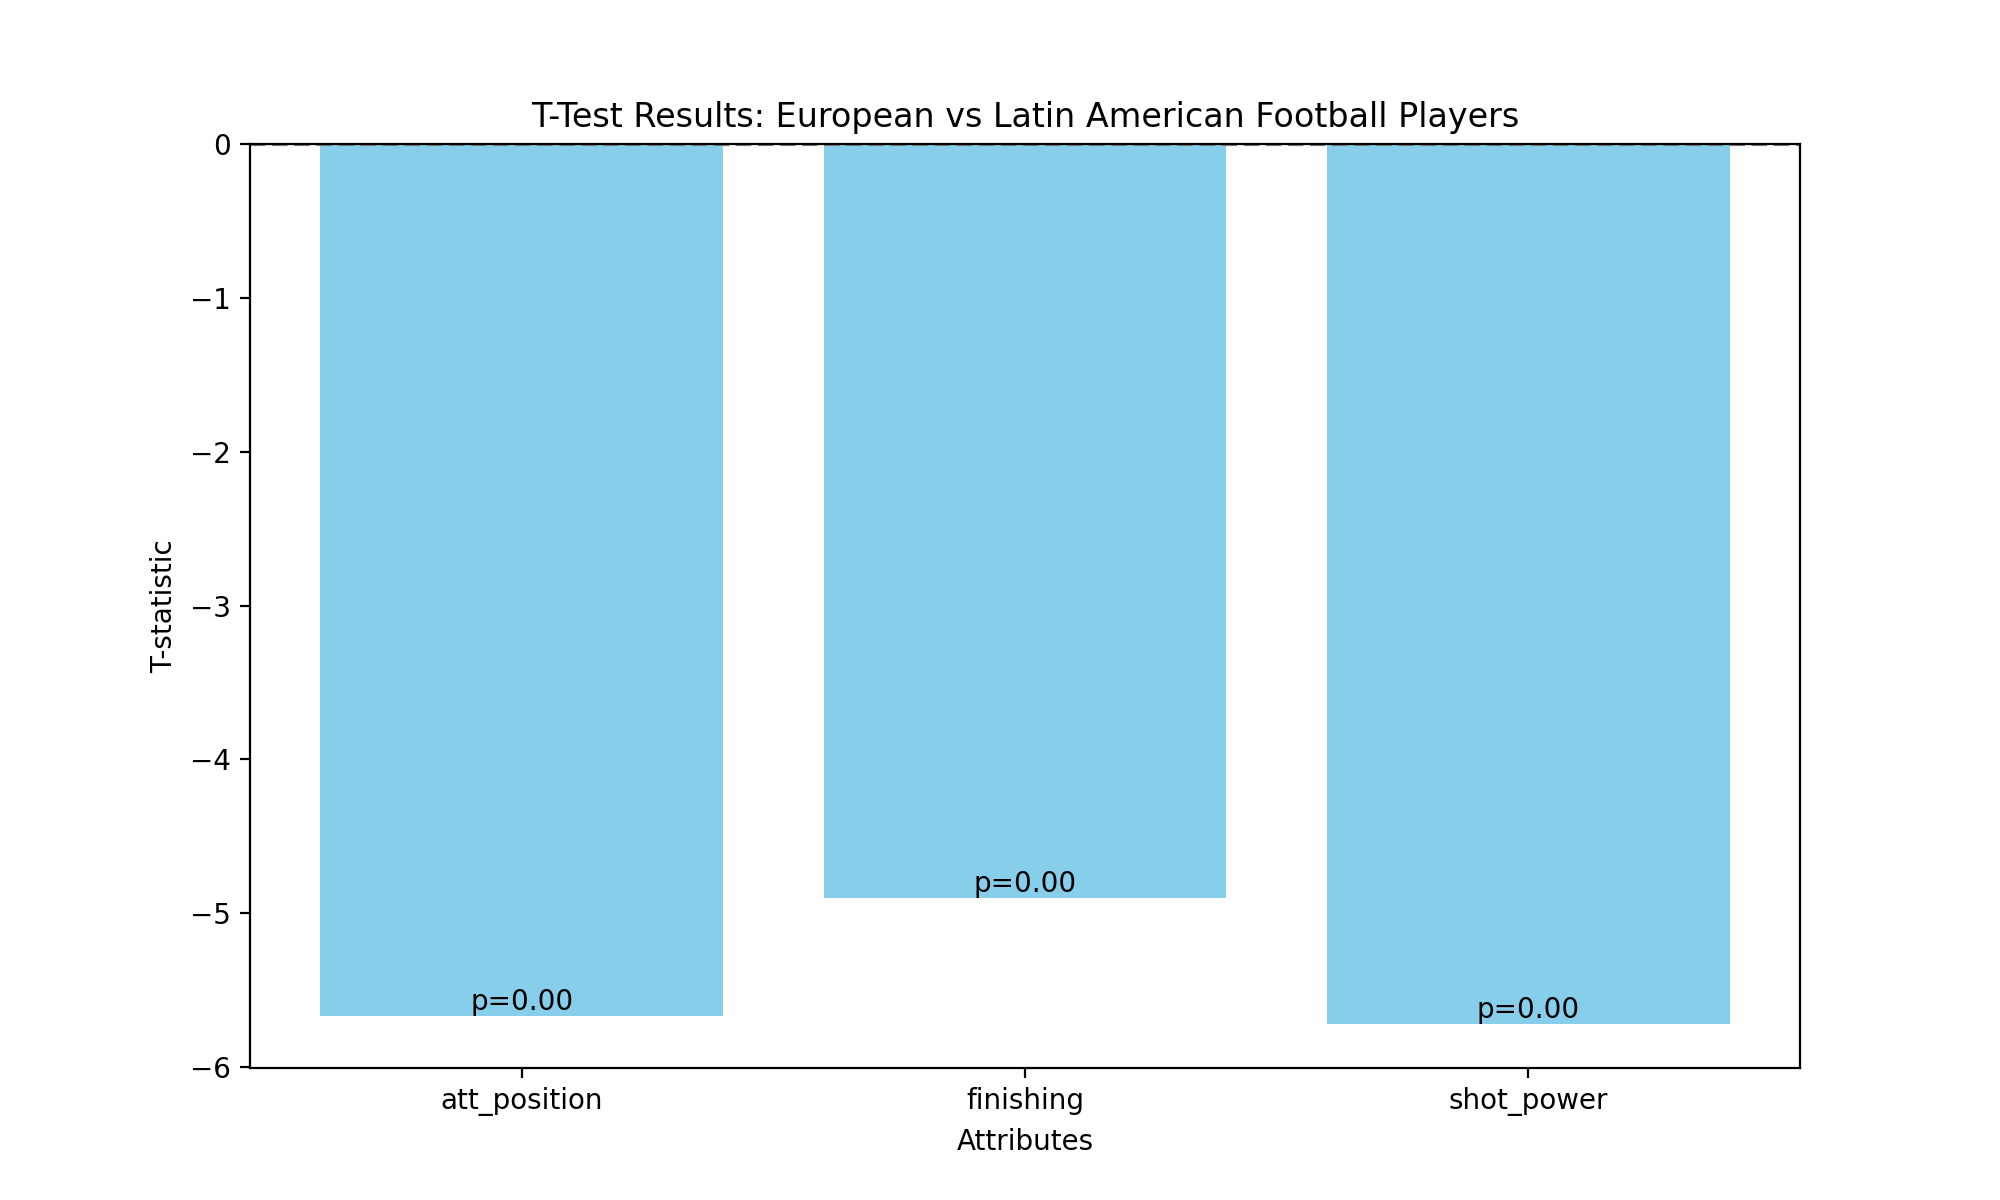

In [ ]:
attributes = ['att_position', 'finishing', 'shot_power']
t_stats = []
p_values = []

for attribute in attributes:

    t_stat, p_value = stats.ttest_ind(european_players[attribute], latin_players[attribute], equal_var=False)
    t_stats.append(t_stat)
    p_values.append(p_value)

results_df = pd.DataFrame({
    'Attribute': attributes,
    'T-statistic': t_stats,
    'P-value': p_values
})

plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Attribute'], results_df['T-statistic'], color='skyblue')

for bar, p_value in zip(bars, results_df['P-value']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'p={p_value:.2f}',
             ha='center', va='bottom')

plt.xlabel('Attributes')
plt.ylabel('T-statistic')
plt.title('T-Test Results: European vs Latin American Football Players')
plt.axhline(0, color='grey', linestyle='--')

plt.show()

The results of the hypothesis tests indicate that there are significant differences in 'att_position,' 'finishing,' and 'shot_power' between European and Brazilian Latin soccer players. European players exhibit higher values in these attributes, and these differences are statistically meaningful, as reflected in the low p-values and negative T-statistics. Moreover, these attributes are considered important predictors of goal-scoring likelihood for European players, supporting the alternative hypothesis that these skills have greater significance in determining goal-scoring potential among European players compared to their Brazilian Latin counterparts.

# **Who will be the Next Torchbearers?**

In [ ]:
aged_above_30 = datfot[datfot['age'] > 30]

relevant_columns = ['height', 'weight', 'ball_control', 'dribbling', 'aggression',
                    'reactions', 'att_position', 'vision', 'composure']

aged_above_30['average_score'] = aged_above_30[relevant_columns].mean(axis=1)

top_ten_players = aged_above_30.sort_values(by='average_score', ascending=False).head(10)

top_ten_players[['player', 'age', 'average_score'] + relevant_columns]

<ipython-input-58-2a011d1af106>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


player  age  average_score  height  weight  ball_control  \
5681  Zlatan Ibrahimovi?   41      97.666667     195     102            85   
5676       Karim Benzema   35      96.666667     185      81            91   
4849     Kevin De Bruyne   32      96.444444     181      75            90   
5680   Cristiano Ronaldo   38      94.777778     187      83            87   
5679           Neymar Jr   31      94.666667     175      68            94   
3443       RaÃºl GarcÃ­a   37      94.555556     184      83            84   
3628    Ãngel Di MarÃ­a   35      94.111111     180      69            91   
2330   Antoine Griezmann   32      93.777778     176      73            86   
3555        Lionel Messi   36      93.666667     169      67            93   
5678          Sadio Mané   31      93.444444     174      69            86   

      dribbling  aggression  reactions  att_position  vision  composure  
5681         75          84         77            88      83         90  
5676         87          63         92            92      89         90  
4849         86          75         91            88      94         88  
5680         81          62         90            93      76         94  
5679         95          63         88            86      90         93  
3443         80          86         83            85      83         83  
3628         90          73         84            82      89         89  
2330         85          74         85            89      87         89  
3555         95          44         92            93      94         96  
5678         88          75         91            90      84         84

# **The NexTGens**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


train_data = aged_above_30.dropna(subset=relevant_columns)
X_train = train_data[relevant_columns]
y_train = train_data['average_score']


model = LinearRegression()
model.fit(X_train, y_train)


players_under_30 = datfot[datfot['age'] < 30].dropna(subset=relevant_columns)
X_test = players_under_30[relevant_columns]


players_under_30['predicted_score'] = model.predict(X_test)


top_20_under_30 = players_under_30.sort_values(by='predicted_score', ascending=False).head(20)

top_20_under_30[['player', 'age', 'club', 'predicted_score'] + relevant_columns]


player  age                  club  predicted_score  \
1965          Erling Haaland   23      Manchester City         97.444444   
5675           Kylian Mbappé   24              Paris SG        95.444444   
5229          Kylian MbappÃ©   24             Paris SG         95.444444   
3416       Lautaro MartÃ­nez   26                Inter         94.222222   
5136          Joshua Kimmich   28   FC Bayern MÃ¼nchen         94.000000   
5673                   Rodri   27      Manchester City         93.666667   
567         Domenico Berardi   29             Sassuolo         93.333333   
3863       Federico Valverde   25          Real Madrid         93.222222   
3051         Bruno Fernandes   28       Manchester Utd         93.111111   
3851           JoÃ£o Cancelo   29   FC Bayern MÃ¼nchen         93.111111   
380            Tammy Abraham   25                 Roma         93.000000   
3844                Emre Can   29    Borussia Dortmund         92.666667   
2327  Franck Yannick KessiÃ©   26         FC Barcelona         92.444444   
3649            JoÃ£o FÃ©lix   23              Chelsea         92.333333   
3264       Rodrigo Bentancur   26                Spurs         92.000000   
945            Brais MÃ©ndez   26        Real Sociedad         91.777778   
698            Marko GrujiÄ   27             FC Porto         91.777778   
1481           Ãngel Correa   28  AtlÃ©tico de Madrid         91.666667   
3612         RaÃºl de TomÃ¡s   28       Rayo Vallecano         91.555556   
5188            Rafael LeÃ£o   24                Milan         91.555556   

      height  weight  ball_control  dribbling  aggression  reactions  \
1965     195      94            82         78          87         89   
5675     182      73            91         93          64         93   
5229     182      73            91         93          64         93   
3416     174      72            86         84          90         89   
5136     177      75            85         82          89         88   
5673     191      82            85         78          82         82   
567      183      72            88         85          85         84   
3863     182      78            85         81          81         87   
3051     179      69            84         79          82         91   
3851     182      74            86         85          76         84   
380      195      86            82         80          68         84   
3844     186      86            78         81          94         81   
2327     183      88            84         78          84         81   
3649     181      72            87         88          68         81   
3264     187      73            85         85          78         79   
945      187      76            82         82          74         81   
698      191      88            80         79          78         77   
1481     171      70            87         87          79         84   
3612     180      79            82         83          80         82   
5188     188      81            86         89          60         83   

      att_position  vision  composure  
1965            92      74         86  
5675            92      83         88  
5229            92      83         88  
3416            87      80         86  
5136            80      85         85  
5673            75      83         85  
567             82      83         78  
3863            80      83         82  
3051            85      90         79  
3851            81      85         85  
380             83      77         82  
3844            72      76         80  
2327            74      76         84  
3649            84      85         85  
3264            72      83         86  
945             81      83         80  
698             75      77         81  
1481            86      82         79  
3612            81      78         79  
5188            82      74         81

## **Where is the Breeding ground of the Future?**

In [ ]:
top_20_under_30['club_cleaned'] = top_20_under_30['club'].str.strip().replace({
    'FC Bayern MÃ¼nchen': 'FC Bayern München',
    'AtlÃ©tico de Madrid': 'Atlético de Madrid',
    'Paris SG': 'Paris SG'
})

club_country_map_updated = {
    'Manchester City': 'England',
    'Chelsea': 'England',
    'Milan': 'Italy',
    'Paris SG': 'France',
    'Real Madrid': 'Spain',
    'Roma': 'Italy',
    'Inter': 'Italy',
    'FC Barcelona': 'Spain',
    'Spurs': 'England',
    'Real Sociedad': 'Spain',
    'FC Porto': 'Portugal',
    'FC Bayern München': 'Germany',
    'Atlético de Madrid': 'Spain',
    'Manchester Utd': 'England',
    'Rayo Vallecano': 'Spain',
    'Borussia Dortmund': 'Germany',
    'Sassuolo': 'Italy'
}

top_20_under_30['club_country'] = top_20_under_30['club_cleaned'].map(club_country_map_updated)

grouped_by_club_country = top_20_under_30.groupby('club_country')['player'].apply(list)

grouped_by_club_country

club_country
England     [Erling Haaland, Rodri, Bruno Fernandes, JoÃ£o...
France                        [Kylian Mbappé, Kylian MbappÃ©]
Germany             [Joshua Kimmich, JoÃ£o Cancelo, Emre Can]
Italy       [Lautaro MartÃ­nez, Domenico Berardi, Tammy Ab...
Portugal                                      [Marko GrujiÄ]
Spain       [Federico Valverde, Franck Yannick KessiÃ©, Br...
Name: player, dtype: object

In [ ]:
df = (player_stats)

In [ ]:
#Most Lucrative Market for Young Players (Predicting Player Value)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Features relevant for predicting player value
features_value = ['height', 'weight', 'age', 'ball_control', 'dribbling', 'slide_tackle', 'curve', 'fk_acc', 'penalties', 'volleys',
                   'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes']

In [ ]:
# Handling missing values (filling NaN values with 0 for simplicity)
df[features_value] = df[features_value].fillna(0)

# Convert 'value' column to a numerical format
df['value'] = df['value'].replace('[\$,]', '', regex=True).replace('\.', '', regex=True).astype(float)
# Splitting the data into training and testing sets
X_train_value, X_test_value, y_train_value, y_test_value = train_test_split(df[features_value], df['value'], test_size=0.2, random_state=42)
# Training a Random Forest regression model
rf_model_value = RandomForestRegressor()
rf_model_value.fit(X_train_value, y_train_value)

RandomForestRegressor()

In [ ]:
# Making predictions on the test set
y_pred_value = rf_model_value.predict(X_test_value)
# Evaluating the model
mae_value = mean_absolute_error(y_test_value, y_pred_value)
print(f'Mean Absolute Error: {mae_value}')

Mean Absolute Error: 964798.2664907651


Too high?

In [ ]:
# Feature Importances
feature_importances_value = pd.Series(rf_model_value.feature_importances_, index=features_value)
print('Feature Importances:')
print(feature_importances_value.sort_values(ascending=False))

Feature Importances:
ball_control      0.587722
slide_tackle      0.100643
volleys           0.060022
dribbling         0.042686
gk_reflexes       0.033099
gk_diving         0.028384
penalties         0.025984
age               0.021653
gk_handling       0.016484
height            0.015996
weight            0.015083
gk_kicking        0.013755
curve             0.013482
gk_positioning    0.012614
fk_acc            0.012392
dtype: float64


1. ball_control is the most important feature, contributing significantly to the predictions.
2. slide_tackle, volleys, and dribbling are also important but to a lesser extent.
3. Features related to goalkeeping (gk_reflexes, gk_diving, gk_handling, gk_kicking, gk_positioning) have some importance as well.

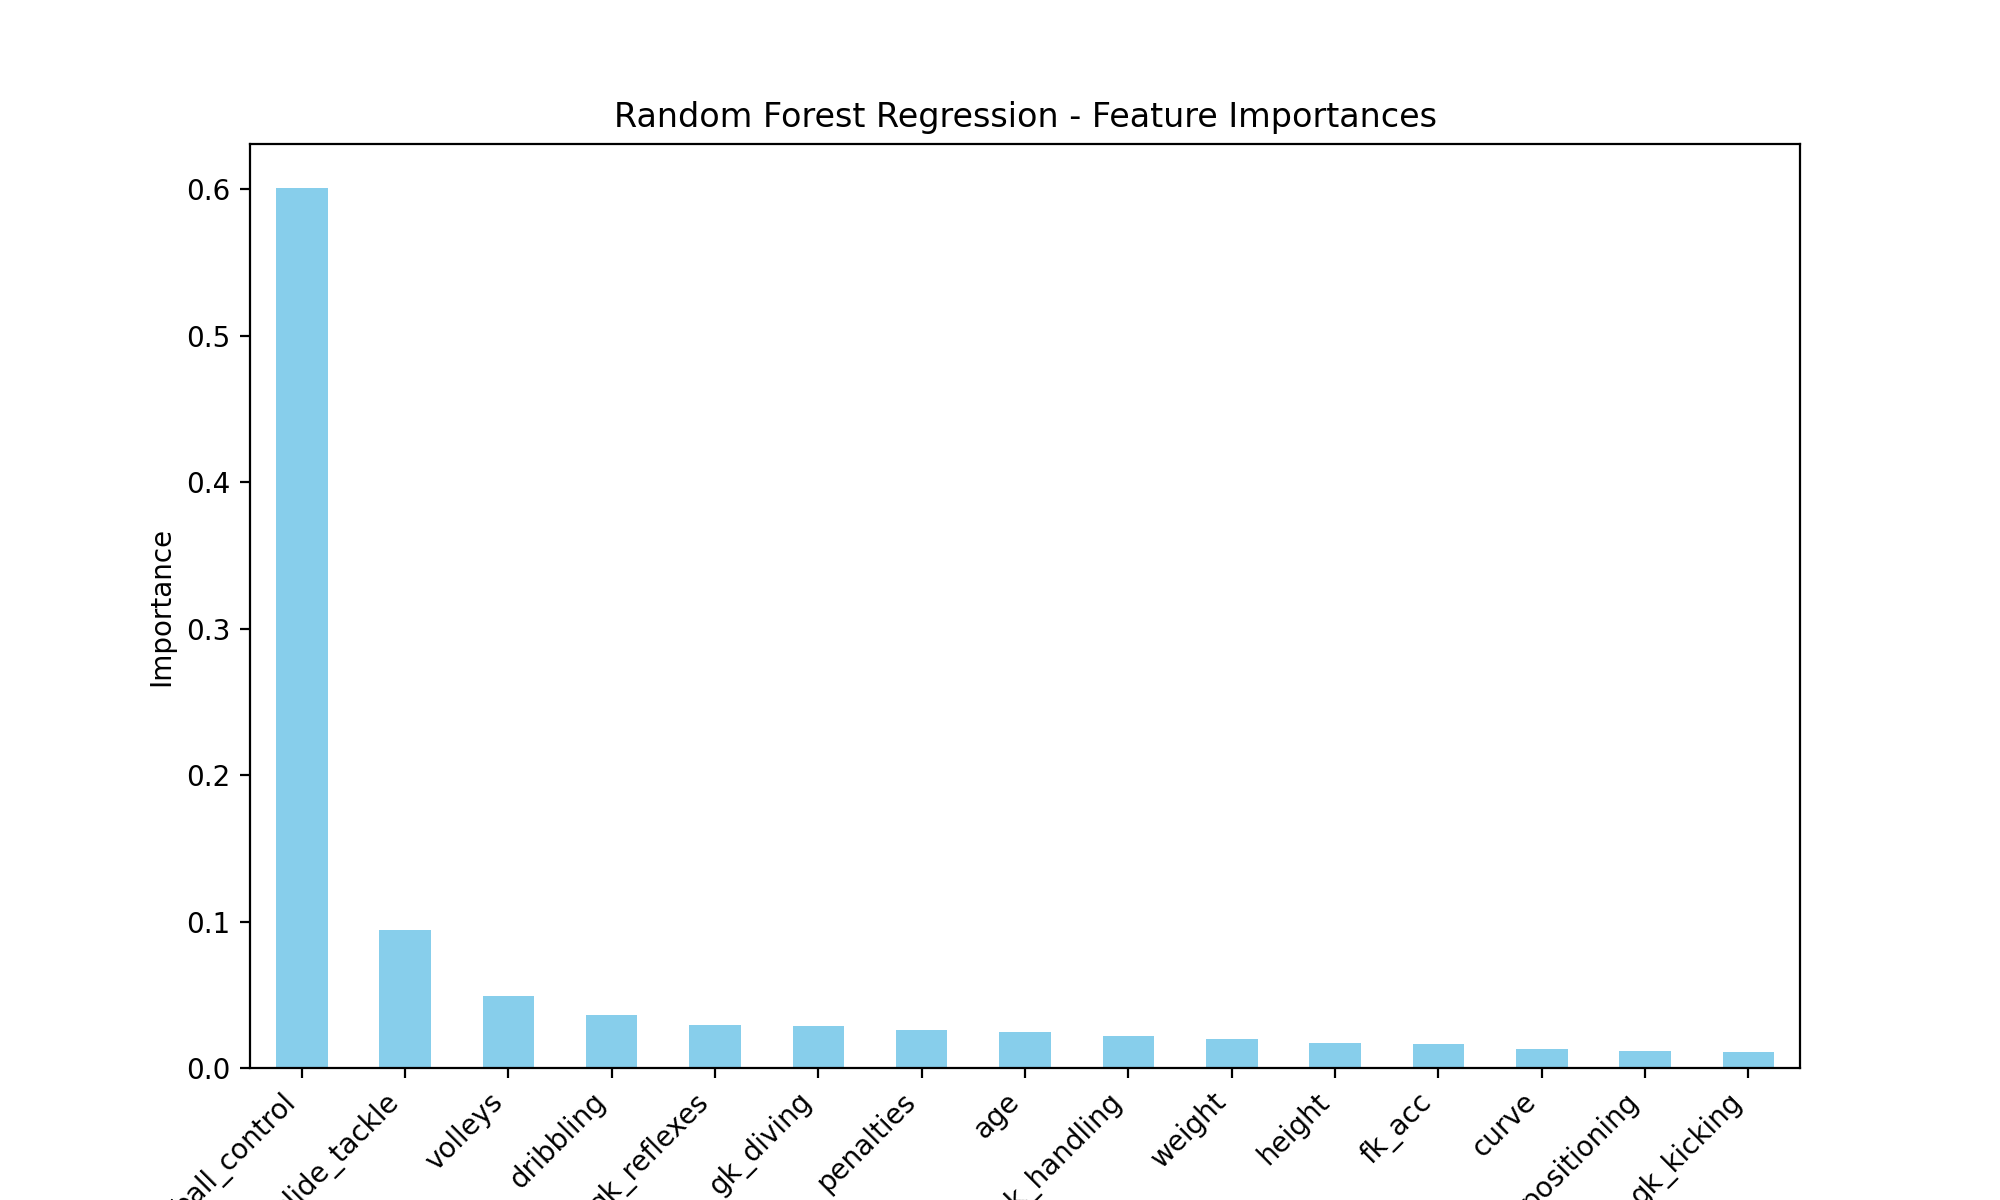

In [ ]:
import matplotlib.pyplot as plt
feature_importances_rf = pd.Series({
    'ball_control': 0.600863,
    'slide_tackle': 0.093969,
    'volleys': 0.049253,
    'dribbling': 0.036270,
    'gk_reflexes': 0.029250,
    'gk_diving': 0.028786,
    'penalties': 0.025887,
    'age': 0.024687,
    'gk_handling': 0.022114,
    'weight': 0.020014,
    'height': 0.016885,
    'fk_acc': 0.016279,
    'curve': 0.012662,
    'gk_positioning': 0.011925,
    'gk_kicking': 0.011157
})

# Sort feature importances in descending order
feature_importances_rf = feature_importances_rf.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
feature_importances_rf.plot(kind='bar', color='skyblue')
plt.title('Random Forest Regression - Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Features relevant for predicting player value
features_value = ['ball_control', 'dribbling', 'slide_tackle', 'stand_tackle', 'aggression',
                  'reactions', 'att_position', 'interceptions', 'vision', 'composure', 'crossing',
                  'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength', 'balance',
                  'sprint_speed', 'agility', 'jumping', 'heading', 'shot_power', 'finishing',
                  'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys', 'gk_positioning',
                  'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes']



In [ ]:
# Handling missing values (filling NaN values with 0 for simplicity)
df[features_value] = df[features_value].fillna(0)


In [ ]:
# Convert 'value' column to a numerical format
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Drop rows with NaN values in the target variable ('value')
df = df.dropna(subset=['value'])

# Drop rows with non-numeric values in features
df = df.dropna(subset=features_value, how='any', axis=0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features_value], df['value'], test_size=0.2, random_state=42)

# SVM Regression
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

In [ ]:
# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model
mae_svm = mean_absolute_error(y_test, y_pred_svm)
print(f'SVM Mean Absolute Error: {mae_svm}')

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f'Decision Tree Mean Absolute Error: {mae_dt}')


SVM Mean Absolute Error: 2030365.6212978875
Decision Tree Mean Absolute Error: 949708.0035180299


In [ ]:
# Feature Importances for Decision Tree
feature_importances_dt = pd.Series(dt_model.feature_importances_, index=features_value)
print('Decision Tree Feature Importances:')
print(feature_importances_dt.sort_values(ascending=False))


Decision Tree Feature Importances:
reactions         0.743292
ball_control      0.080279
sprint_speed      0.033506
aggression        0.023999
slide_tackle      0.017771
stand_tackle      0.016093
gk_reflexes       0.013847
gk_handling       0.009913
curve             0.006279
finishing         0.005718
gk_diving         0.005217
volleys           0.004353
agility           0.003422
crossing          0.003345
stamina           0.002940
balance           0.002869
shot_power        0.002868
heading           0.002664
dribbling         0.002641
interceptions     0.002385
composure         0.002352
acceleration      0.002350
short_pass        0.001996
fk_acc            0.001703
gk_positioning    0.001623
vision            0.001253
long_pass         0.001151
gk_kicking        0.001150
jumping           0.001125
penalties         0.000704
att_position      0.000497
long_shots        0.000357
strength          0.000336
dtype: float64


**Reactions (74.24%):**

Reactions are the most important feature according to the decision tree. Players with high reaction scores are more influential in determining their value.

**Ball Control (7.96%):**

Ball control is the second most important feature. This suggests that a player's ability to control the ball has a significant impact on their value.

**Composure (2.43%):**

Composure also plays a role, even though a smaller one, in determining player value.

**Sprint Speed (2.23%):**

Sprint speed contributes to the model's decision-making process.

**Stand Tackle (1.76%):**

The ability to stand tackle is another factor considered by the model.

**Finishing (1.75%):**

The ability to finish scoring opportunities contributes to a player's value.

**Slide Tackle (1.64%):**

The slide tackle skill is considered in the model.

**GK Reflexes (1.37%):**

Goalkeeper reflexes are considered, suggesting that goalkeepers may have different value determinants.

**GK Handling (0.95%):**

Goalkeeper handling is another factor for goalkeepers.

**Curve (0.57%):**

The curve of a shot contributes, although to a lesser extent.

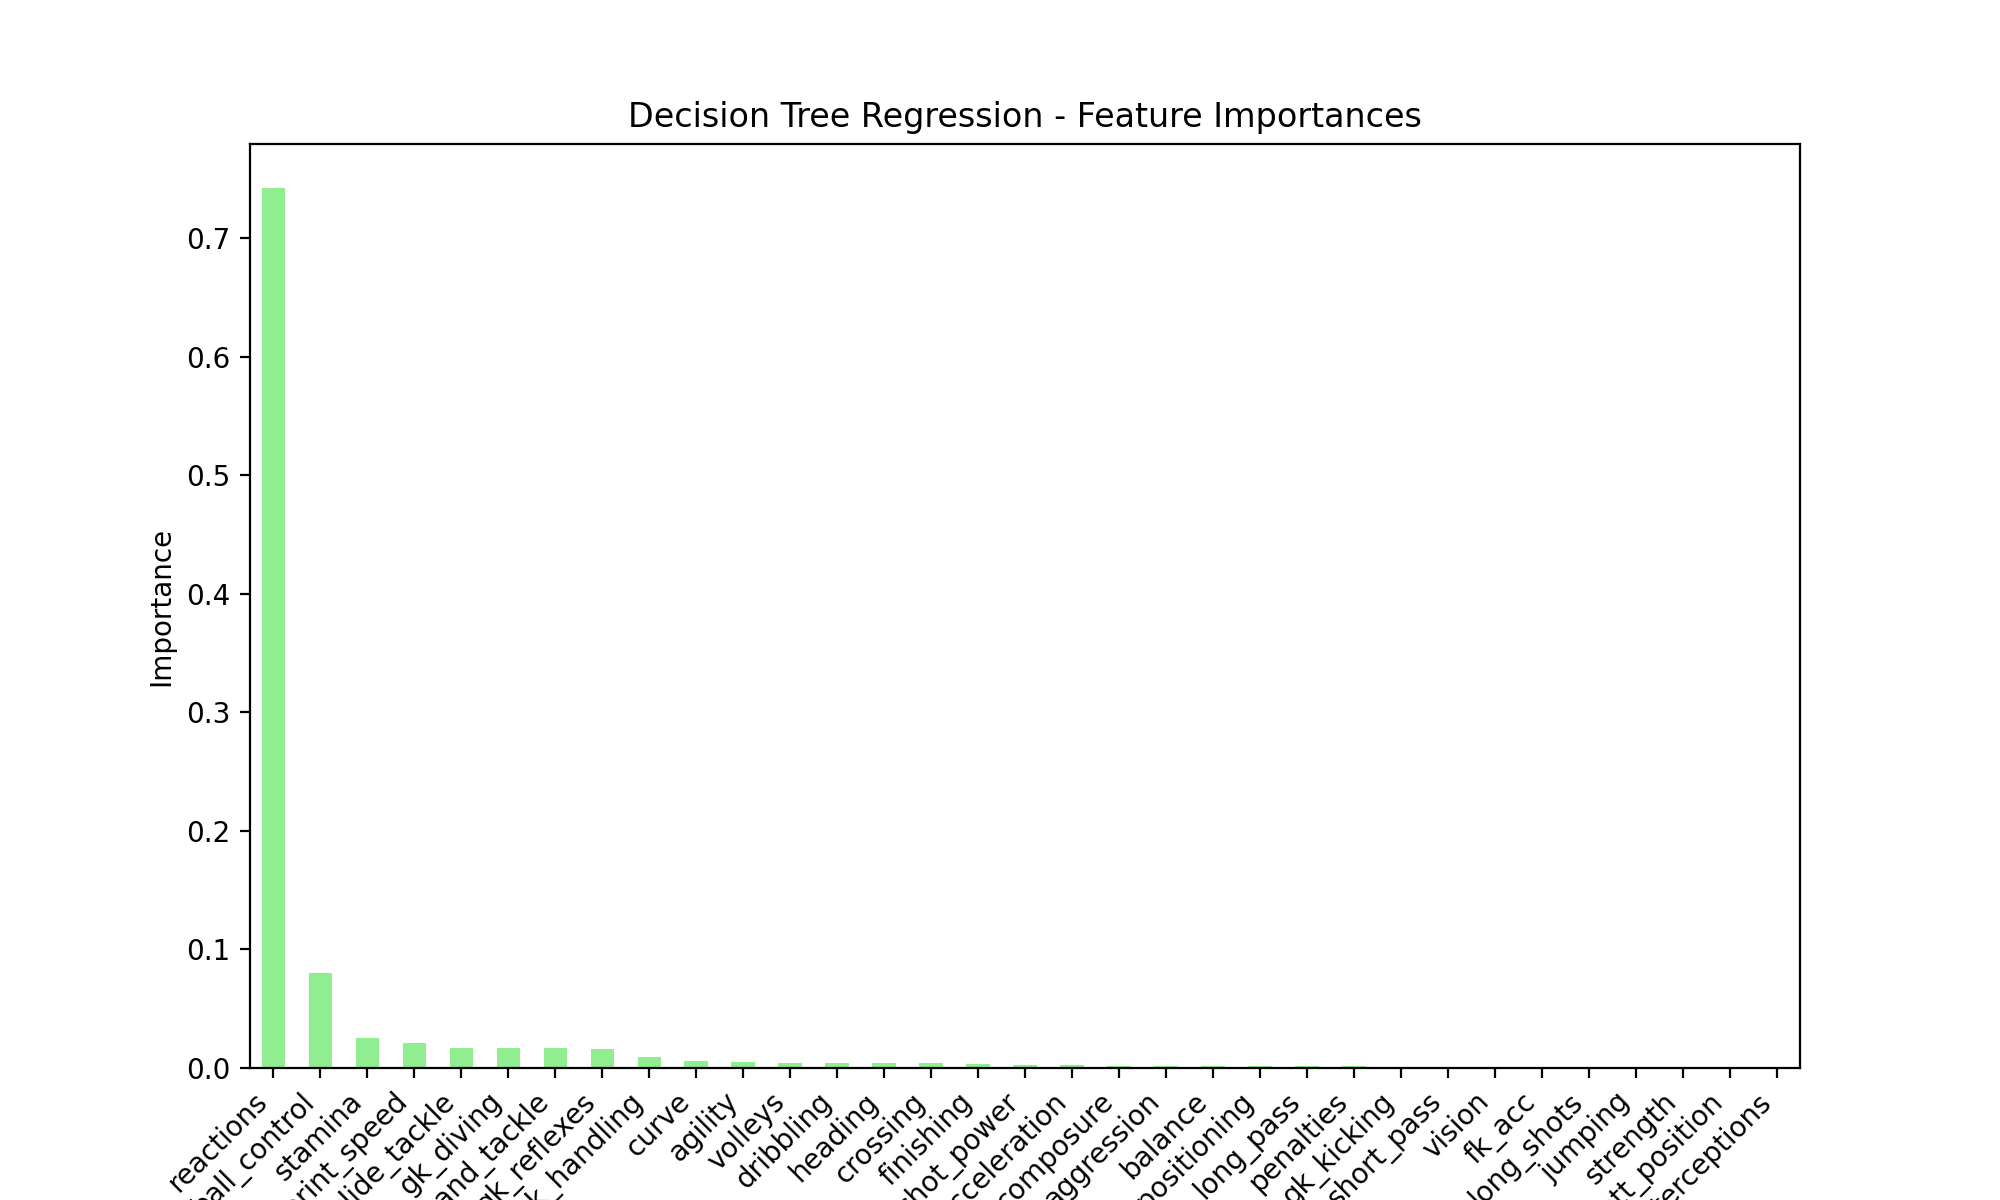

In [ ]:
import matplotlib.pyplot as plt


feature_importances_dt = pd.Series({
    'reactions': 0.742555,
    'ball_control': 0.080248,
    'stamina': 0.025079,
    'sprint_speed': 0.021506,
    'slide_tackle': 0.017262,
    'gk_diving': 0.016802,
    'stand_tackle': 0.016463,
    'gk_reflexes': 0.015667,
    'gk_handling': 0.009412,
    'curve': 0.005978,
    'agility': 0.004817,
    'volleys': 0.004585,
    'dribbling': 0.004364,
    'heading': 0.004178,
    'crossing': 0.003928,
    'finishing': 0.003542,
    'shot_power': 0.002582,
    'acceleration': 0.002200,
    'composure': 0.001836,
    'aggression': 0.001783,
    'balance': 0.001765,
    'gk_positioning': 0.001666,
    'long_pass': 0.001632,
    'penalties': 0.001601,
    'gk_kicking': 0.001253,
    'short_pass': 0.001175,
    'vision': 0.001150,
    'fk_acc': 0.001137,
    'long_shots': 0.001122,
    'jumping': 0.000994,
    'strength': 0.000712,
    'att_position': 0.000586,
    'interceptions': 0.000420
})

# Sort feature importances in descending order
feature_importances_dt = feature_importances_dt.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
feature_importances_dt.plot(kind='bar', color='lightgreen')
plt.title('Decision Tree Regression - Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
print(df.columns)

## Attempt to reduce the MAE
#Model Selection and Hyperparameter Tuning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Define the target columns for each player type
target_columns_attackers = ['ball_control', 'dribbling', 'sprint_speed', 'heading', 'shot_power', 'finishing']
target_columns_midfielders = ['ball_control', 'reactions', 'vision', 'composure', 'short_pass', 'stamina']
target_columns_defenders = ['interceptions', 'slide_tackle', 'stand_tackle', 'aggression', 'strength']
target_columns_goalkeepers = ['gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes']

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'marking', 'slide_tackle', 'stand_tackle', 'aggression',
       'reactions', 'att_position', 'interceptions', 'vision', 'composure',
       'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina',
       'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'value', 'continent', 'continent_code', 'cluster'],
      dtype='object')


In [ ]:
# Attackers

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and features_value contains the selected features
features_value = ['ball_control', 'dribbling', 'sprint_speed', 'heading', 'shot_power', 'finishing']

# Handling missing values (filling NaN values with 0 for simplicity)
df[features_value] = df[features_value].fillna(0)

# Convert 'value' column to a numerical format
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Drop rows with NaN values in the target variable ('value')
df = df.dropna(subset=['value'])

# Drop rows with non-numeric values in features
df = df.dropna(subset=features_value, how='any', axis=0)

# Specify features and target variables
X = df[features_value]
y = df['value']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Regression
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)

# Make predictions on scaled test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate SVM model with scaled features
mae_svm = mean_absolute_error(y_test, y_pred_svm)
print(f'SVM Mean Absolute Error: {mae_svm}')

SVM Mean Absolute Error: 2030335.1238871433


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on scaled test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest model with scaled features
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Random Forest Mean Absolute Error: {mae_rf}')

Random Forest Mean Absolute Error: 1149795.691292876


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions on scaled test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate Gradient Boosting model with scaled features
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f'Gradient Boosting Mean Absolute Error: {mae_gb}')

Gradient Boosting Mean Absolute Error: 1171873.0329569164


In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on scaled test data
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Linear Regression model with scaled features
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f'Linear Regression Mean Absolute Error: {mae_lr}')

Linear Regression Mean Absolute Error: 3085035.36261878


In [ ]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso_model = Lasso(alpha=0.01, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on scaled test data
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate Lasso Regression model with scaled features
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Lasso Regression Mean Absolute Error: {mae_lasso}')

Lasso Regression Mean Absolute Error: 3085035.353341382


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

# Make predictions on scaled test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate KNN model with scaled features
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f'KNN Mean Absolute Error: {mae_knn}')

KNN Mean Absolute Error: 1232573.0870712402


In [ ]:
# ONLY FOR ATTACKERS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Features relevant for predicting attacker value
features_attackers = ['ball_control', 'dribbling', 'sprint_speed', 'heading', 'shot_power', 'finishing']

# Handling missing values (filling NaN values with 0 for simplicity)
df[features_attackers] = df[features_attackers].fillna(0)

# Convert 'value' column to a numerical format
df['value'] = df['value'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with NaN values in the target variable ('value')
df = df.dropna(subset=['value'])

# Drop rows with non-numeric values in features
df = df.dropna(subset=features_attackers, how='any', axis=0)

# Filter data for attackers based on criteria
df_attackers = df[(df['ball_control'] > 70) & (df['dribbling'] > 70) & (df['finishing'] > 70)]

# Splitting the data into training and testing sets
X_train_attackers, X_test_attackers, y_train_attackers, y_test_attackers = train_test_split(
    df_attackers[features_attackers], df_attackers['value'], test_size=0.2, random_state=42)

# Training a Random Forest regression model
rf_model_attackers = RandomForestRegressor()
rf_model_attackers.fit(X_train_attackers, y_train_attackers)

# Making predictions on the test set
y_pred_attackers = rf_model_attackers.predict(X_test_attackers)

# Evaluating the model
mae_attackers = mean_absolute_error(y_test_attackers, y_pred_attackers)
print(f'Mean Absolute Error for Attackers: {mae_attackers}')

# Feature Importances
feature_importances_attackers = pd.Series(rf_model_attackers.feature_importances_, index=features_attackers)
print('Feature Importances for Attackers:')
print(feature_importances_attackers.sort_values(ascending=False))

Mean Absolute Error for Attackers: 7134309.836065574
Feature Importances for Attackers:
finishing       0.464988
ball_control    0.232832
dribbling       0.116231
sprint_speed    0.080861
shot_power      0.061783
heading         0.043305
dtype: float64


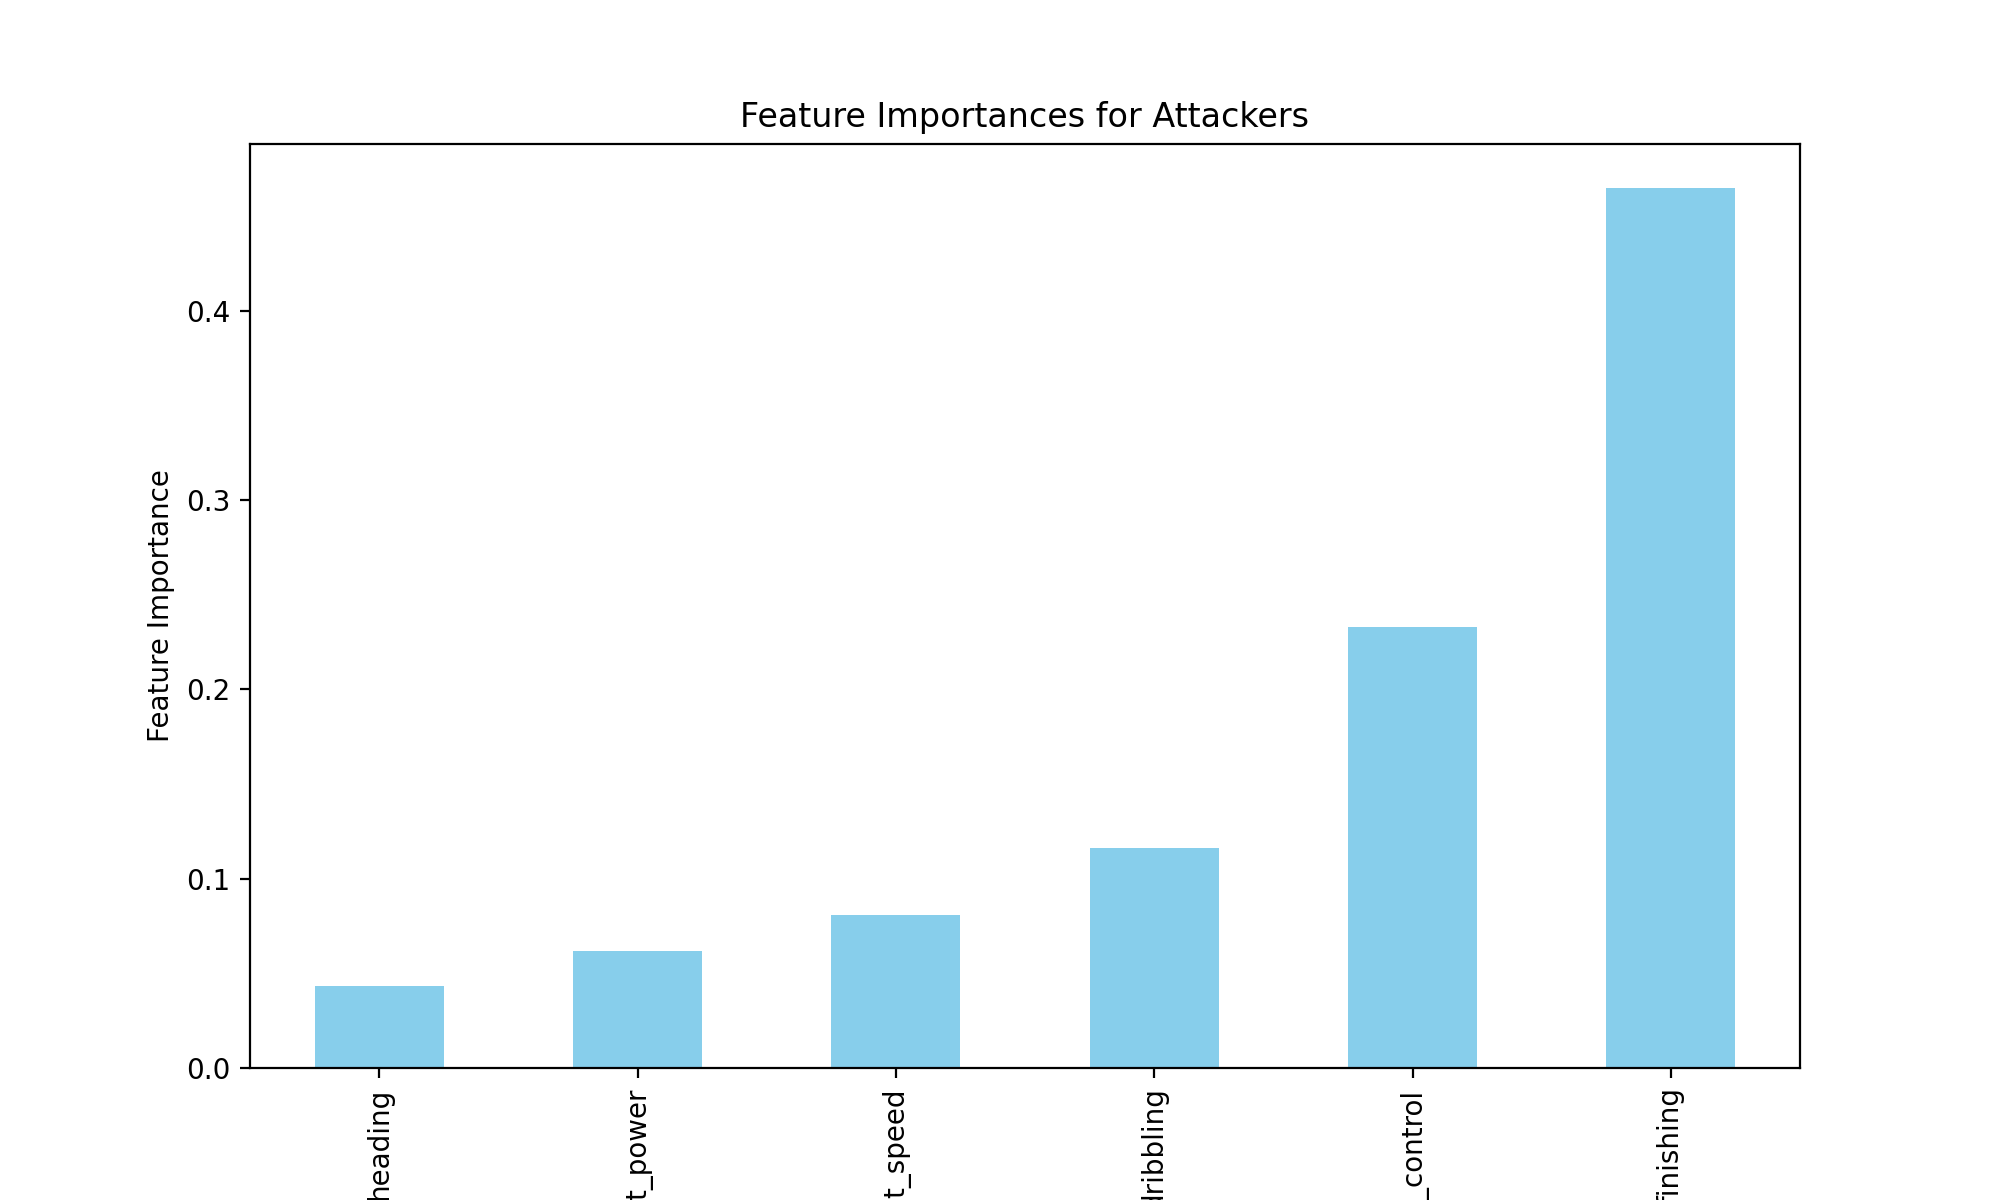

In [ ]:
import matplotlib.pyplot as plt

# Feature Importances for Attackers
feature_importances_attackers = pd.Series(rf_model_attackers.feature_importances_, index=features_attackers)

# Plotting the bar plot
feature_importances_attackers.sort_values().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.title('Feature Importances for Attackers')
plt.show()

In [ ]:
# ONLY FOR MIDFIELDERS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Features relevant for predicting midfielder value
features_midfielders = ['ball_control', 'reactions', 'vision', 'composure', 'short_pass', 'stamina']

# Handling missing values (filling NaN values with 0 for simplicity)
df[features_midfielders] = df[features_midfielders].fillna(0)

# Convert 'value' column to a numerical format
df['value'] = df['value'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with NaN values in the target variable ('value')
df = df.dropna(subset=['value'])

# Drop rows with non-numeric values in features
df = df.dropna(subset=features_midfielders, how='any', axis=0)

# Filter data for midfielders based on criteria
df_midfielders = df[(df['ball_control'] > 60) & (df['reactions'] > 60) & (df['vision'] > 60)]

# Splitting the data into training and testing sets
X_train_midfielders, X_test_midfielders, y_train_midfielders, y_test_midfielders = train_test_split(
    df_midfielders[features_midfielders], df_midfielders['value'], test_size=0.2, random_state=42)

# Training a Random Forest regression model
rf_model_midfielders = RandomForestRegressor()
rf_model_midfielders.fit(X_train_midfielders, y_train_midfielders)

# Making predictions on the test set
y_pred_midfielders = rf_model_midfielders.predict(X_test_midfielders)

# Evaluating the model
mae_midfielders = mean_absolute_error(y_test_midfielders, y_pred_midfielders)
print(f'Mean Absolute Error for Midfielders: {mae_midfielders}')

# Feature Importances
feature_importances_midfielders = pd.Series(rf_model_midfielders.feature_importances_, index=features_midfielders)
print('Feature Importances for Midfielders:')
print(feature_importances_midfielders.sort_values(ascending=False))

Mean Absolute Error for Midfielders: 2179393.869047619
Feature Importances for Midfielders:
reactions       0.665789
ball_control    0.188491
stamina         0.057807
short_pass      0.044679
composure       0.026768
vision          0.016466
dtype: float64


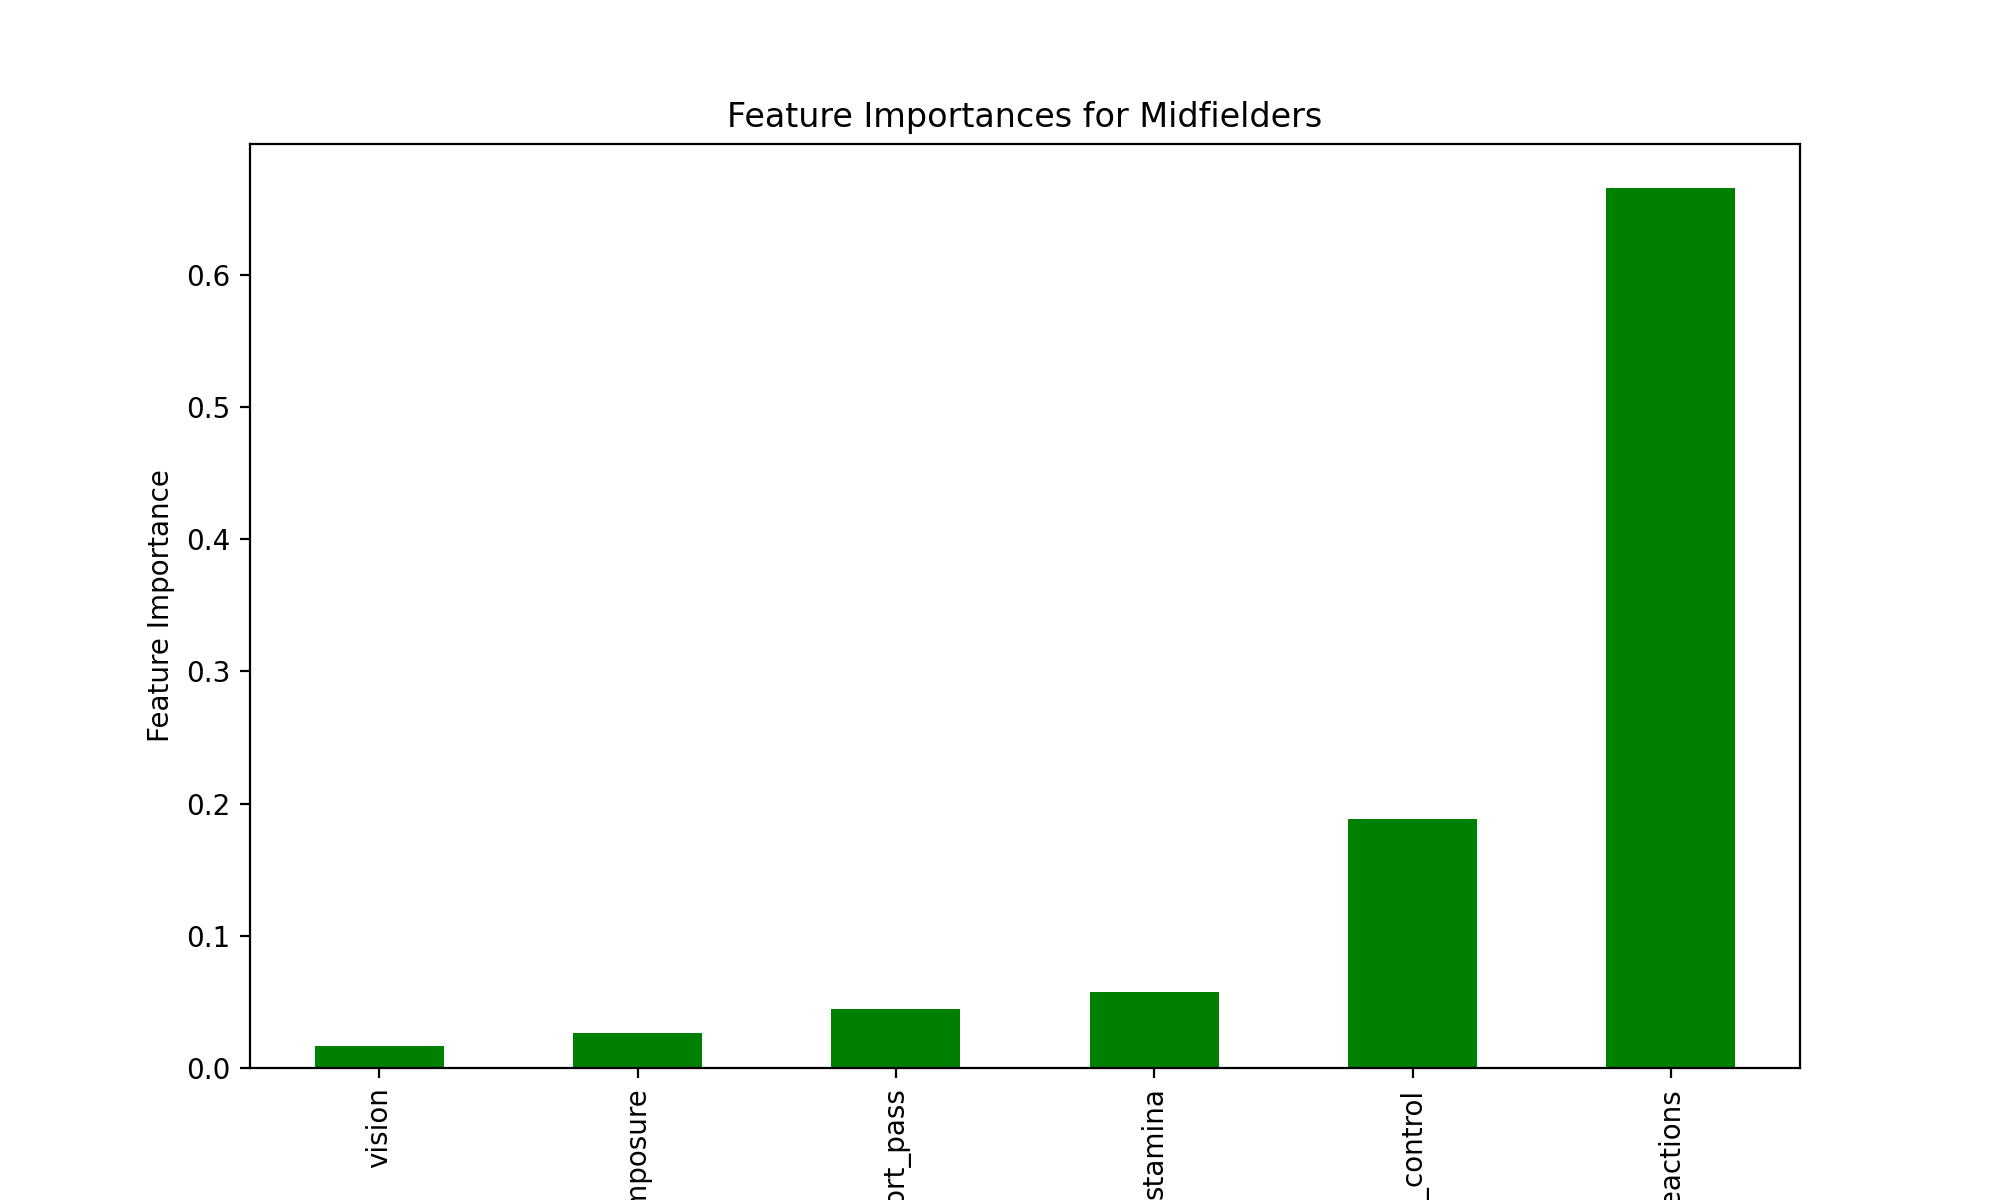

In [ ]:
import matplotlib.pyplot as plt

# Feature Importances for Midfielders
feature_importances_midfielders = pd.Series(rf_model_midfielders.feature_importances_, index=features_midfielders)

# Plotting the bar plot
feature_importances_midfielders.sort_values().plot(kind='bar', color='green', figsize=(10, 6))
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.title('Feature Importances for Midfielders')
plt.show()

In [ ]:
# ONLY FOR DEFENDERS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Features relevant for predicting defender value
features_defenders = ['interceptions', 'slide_tackle', 'stand_tackle', 'aggression', 'strength']

# Handling missing values (filling NaN values with 0 for simplicity)
df[features_defenders] = df[features_defenders].fillna(0)

# Convert 'value' column to a numerical format
df['value'] = df['value'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with NaN values in the target variable ('value')
df = df.dropna(subset=['value'])

# Drop rows with non-numeric values in features
df = df.dropna(subset=features_defenders, how='any', axis=0)

# Filter data for defenders based on criteria
df_defenders = df[(df['slide_tackle'] > 70) & (df['stand_tackle'] > 70) & (df['strength'] > 70)]

# Splitting the data into training and testing sets
X_train_defenders, X_test_defenders, y_train_defenders, y_test_defenders = train_test_split(
    df_defenders[features_defenders], df_defenders['value'], test_size=0.2, random_state=42)

# Training a Random Forest regression model
rf_model_defenders = RandomForestRegressor()
rf_model_defenders.fit(X_train_defenders, y_train_defenders)

# Making predictions on the test set
y_pred_defenders = rf_model_defenders.predict(X_test_defenders)

# Evaluating the model
mae_defenders = mean_absolute_error(y_test_defenders, y_pred_defenders)
print(f'Mean Absolute Error for Defenders: {mae_defenders}')

# Feature Importances
feature_importances_defenders = pd.Series(rf_model_defenders.feature_importances_, index=features_defenders)
print('Feature Importances for Defenders:')
print(feature_importances_defenders.sort_values(ascending=False))

Mean Absolute Error for Defenders: 4035552.966101695
Feature Importances for Defenders:
stand_tackle     0.528583
slide_tackle     0.186276
interceptions    0.120995
strength         0.093021
aggression       0.071125
dtype: float64


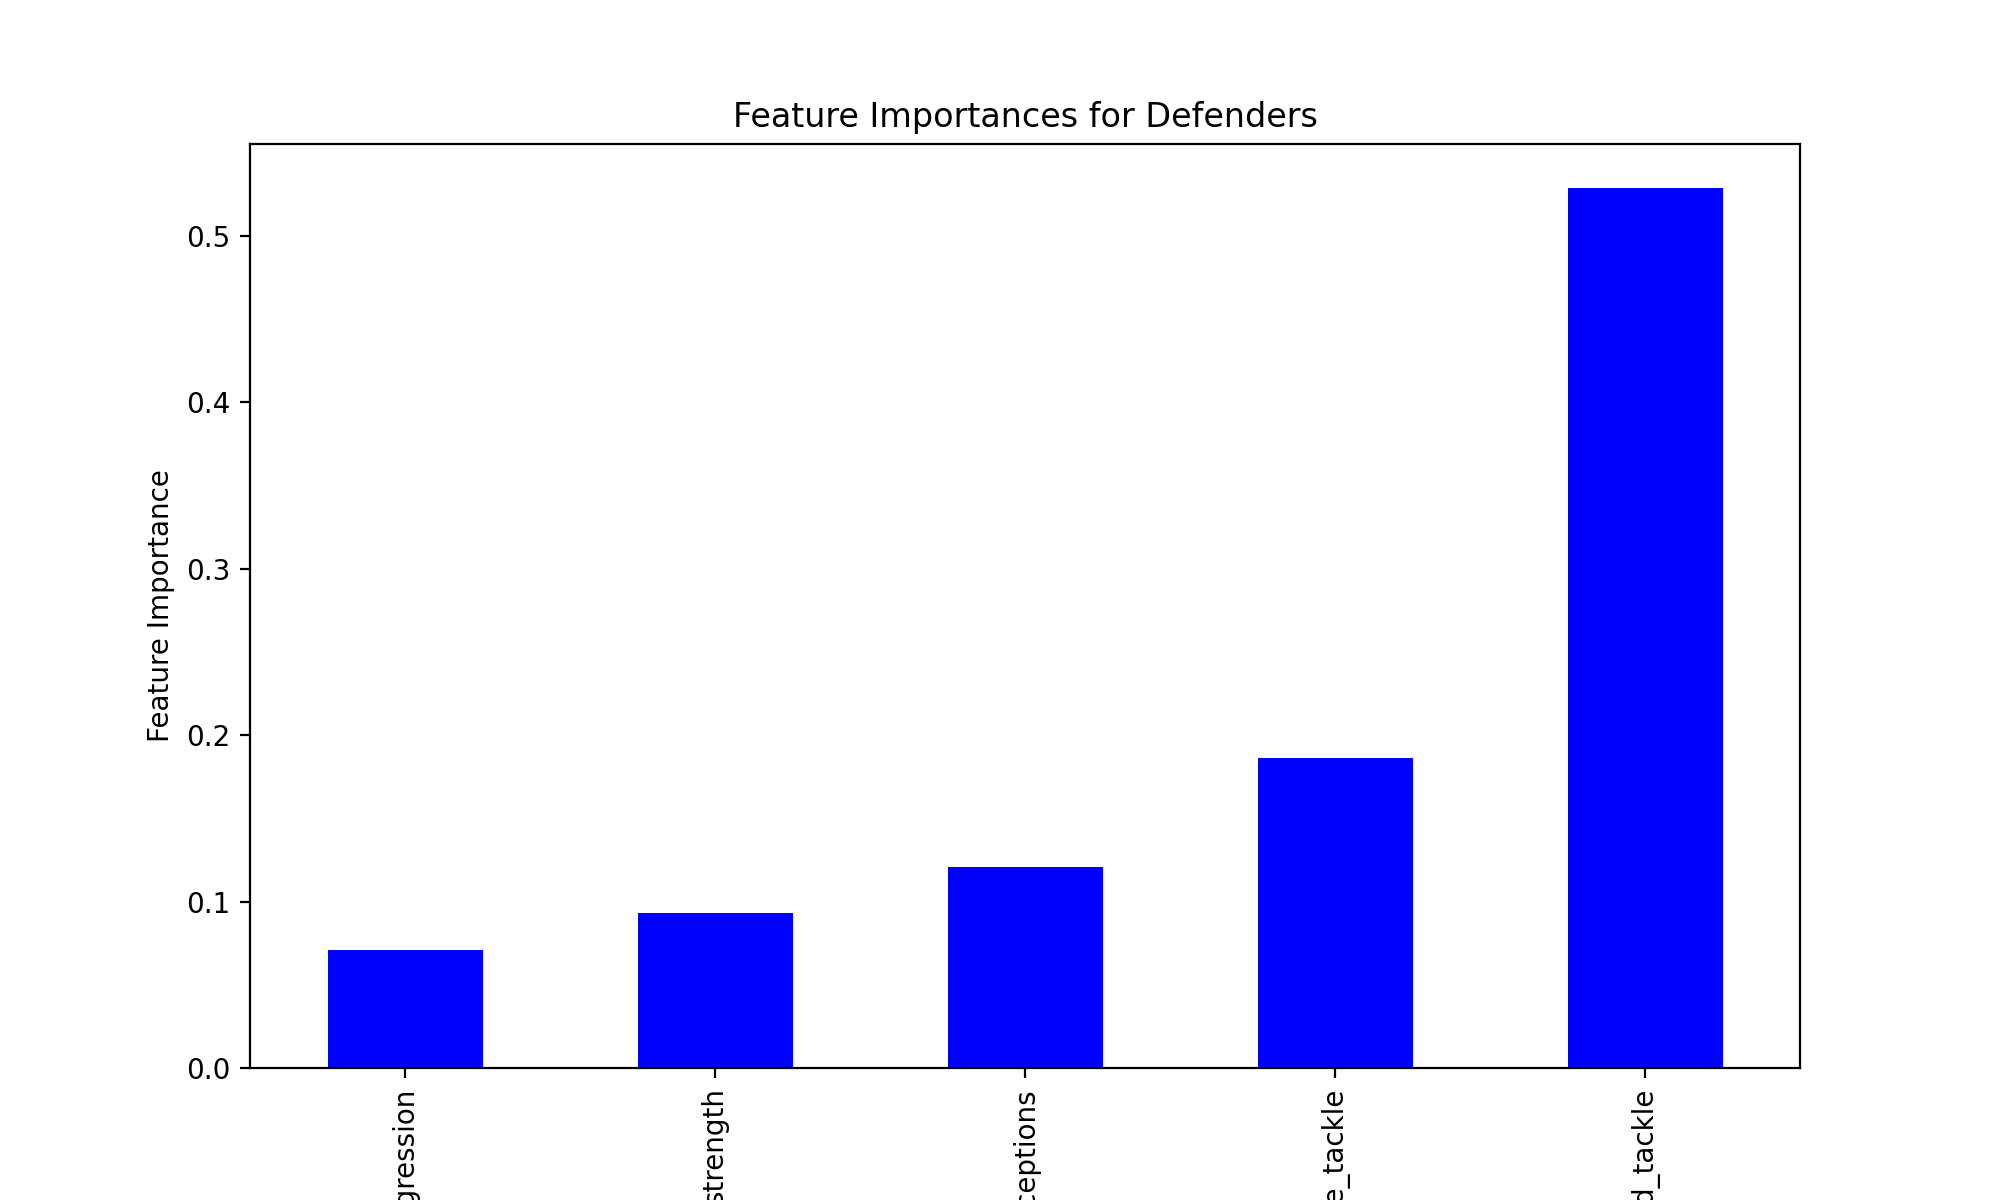

In [ ]:
import matplotlib.pyplot as plt

# Feature Importances for Defenders
feature_importances_defenders = pd.Series(rf_model_defenders.feature_importances_, index=features_defenders)

# Plotting the bar plot
feature_importances_defenders.sort_values().plot(kind='bar', color='blue', figsize=(10, 6))
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.title('Feature Importances for Defenders')
plt.show()

In [ ]:
# ONLY FOR GOALKEEPERS

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Features relevant for predicting goalkeeper value
features_goalkeepers = ['gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes']

# Handling missing values (filling NaN values with 0 for simplicity)
df[features_goalkeepers] = df[features_goalkeepers].fillna(0)

# Convert 'value' column to a numerical format
df['value'] = df['value'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with NaN values in the target variable ('value')
df = df.dropna(subset=['value'])

# Drop rows with non-numeric values in features
df = df.dropna(subset=features_goalkeepers, how='any', axis=0)

# Filter data for goalkeepers based on criteria
df_goalkeepers = df[(df['gk_positioning'] > 70) & (df['gk_diving'] > 70) & (df['gk_handling'] > 70)]

# Splitting the data into training and testing sets
X_train_goalkeepers, X_test_goalkeepers, y_train_goalkeepers, y_test_goalkeepers = train_test_split(
    df_goalkeepers[features_goalkeepers], df_goalkeepers['value'], test_size=0.2, random_state=42)

# Training a Random Forest regression model
rf_model_goalkeepers = RandomForestRegressor()
rf_model_goalkeepers.fit(X_train_goalkeepers, y_train_goalkeepers)

# Making predictions on the test set
y_pred_goalkeepers = rf_model_goalkeepers.predict(X_test_goalkeepers)

# Evaluating the model
mae_goalkeepers = mean_absolute_error(y_test_goalkeepers, y_pred_goalkeepers)
print(f'Mean Absolute Error for Goalkeepers: {mae_goalkeepers}')

# Feature Importances
feature_importances_goalkeepers = pd.Series(rf_model_goalkeepers.feature_importances_, index=features_goalkeepers)
print('Feature Importances for Goalkeepers:')
print(feature_importances_goalkeepers.sort_values(ascending=False))

Mean Absolute Error for Goalkeepers: 3029422.0588235296
Feature Importances for Goalkeepers:
gk_diving         0.547787
gk_reflexes       0.270375
gk_kicking        0.100775
gk_handling       0.067183
gk_positioning    0.013880
dtype: float64
